# Problem Statement

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

* If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company

* If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of default.

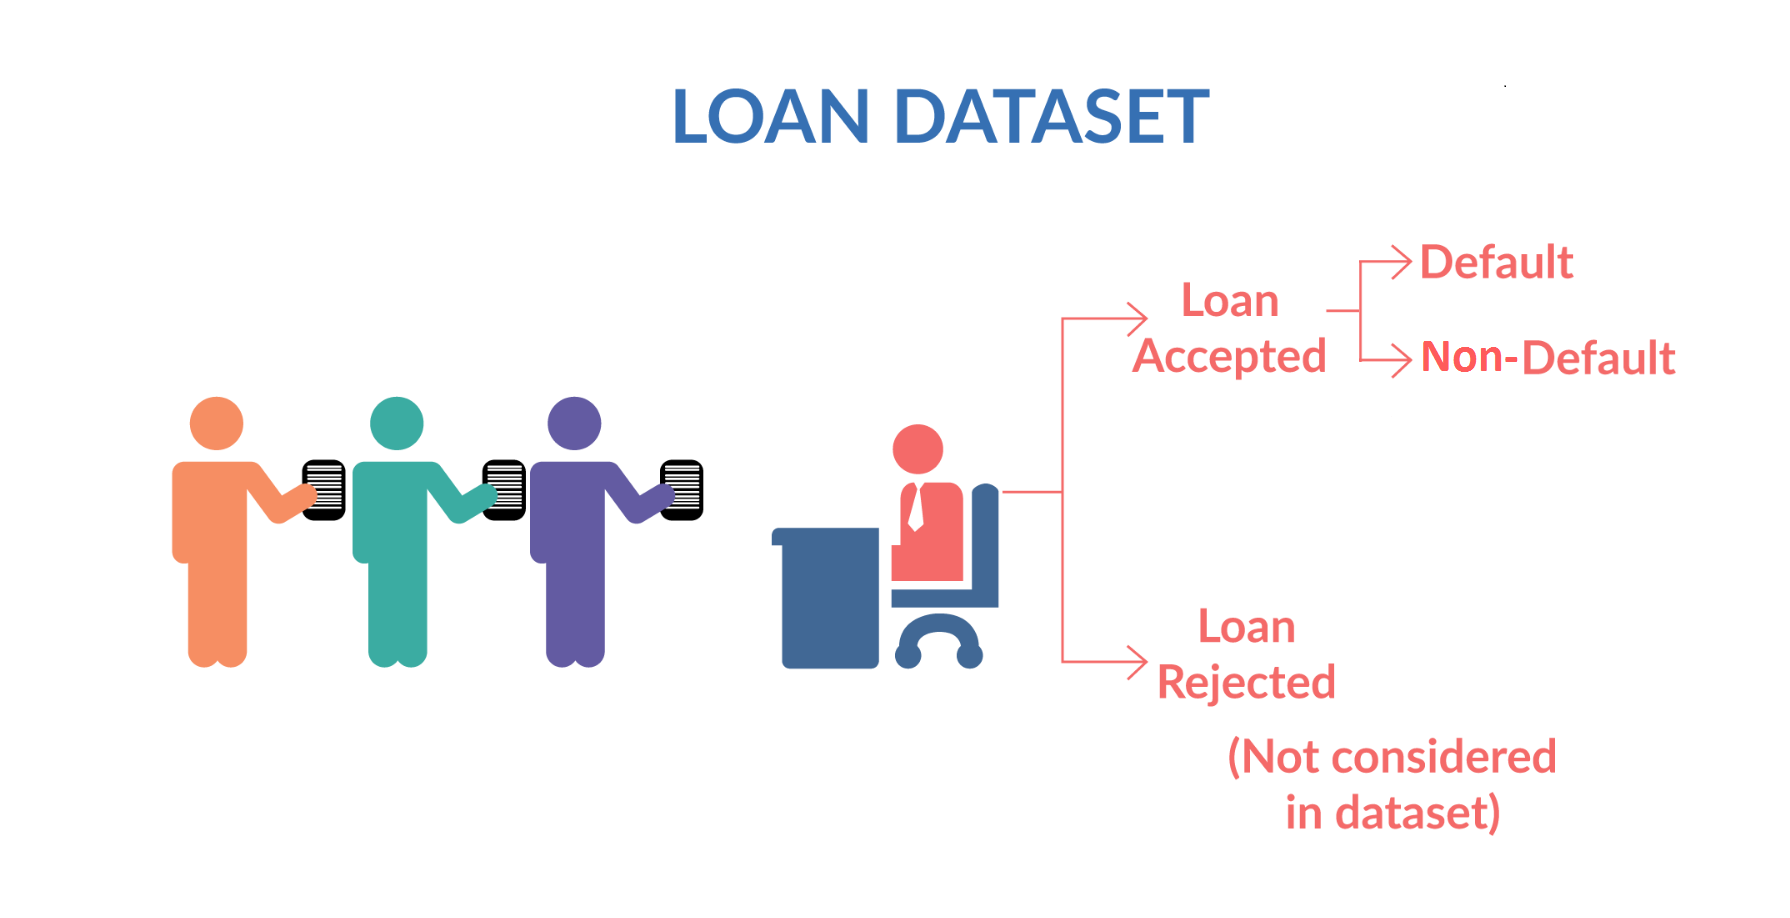
Figure Loan Data Set can also refer to link: [Upgrad Lending Club Case Study](https://learn.upgrad.com/course/4617/segment/27462/164543/505323/2600603)

When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

1. **Loan accepted**: If the company approves the loan, there are 3 possible scenarios described below:

    * **Fully paid**: Applicant has fully paid the loan (the principal and the interest rate)

    * **Current**: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These  candidates are not labelled as 'defaulted'.

    * **Charged-off**: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has **defaulted** on the loan 

2. **Loan rejected**: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

# Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

### Note: Evaluation Rubric For reference
1. Data understanding  (10%)
2. Data Cleaning and Manipulation (20%)
3. Data analysis (40%)
4. Presentation and Recommendations (20%)
5. Conciseness and readability of the code (10%)

## Thought Process 

1. Exporing Data 
    For understanding or to explore data set, first step is to load the data and and analyse using 
      * df.info
      * df.shape
      * df[listofcols].describe().T T : to transpose the data for easy visualization

2. Cleaning the data, manipulation (or impute the data) Data cleaning and imputation includes :
    - look for null data, using df.isnull().sum() : gives number of null values in all columns in df
    - use data.isnull().mean()*100 to get the feel of missing values in every column
    - Check for duplicate values using : data.duplicated.sum() / data.duplicated.any(): duplicate values will influence the final result / outcome and will add bias to the data. 
    - So its very much critical to find duplicates and drop them as required. drop data using : data.drop_duplicates(subset=None, inplace=True)
    - **Note**: alternatively find unique values in each column using df.nunique() to count the number of unique values in a given axis and drop the duplicates using df.drop(same_value_cols, axis=1)
    - drop all columns which has not valid values (i.e. all null values) such columns does not add to any value for analysis.
    
3. Data analysis includes:
    - Check for mean, median, mode , and std deviations, which gives us insights into the data and distribution of data.
    - Check for outliers : can be checked using visualization boxplot, the boxplot clearly shows the outliers , whiskers of the box plot indicate the outliers.
    - Based on above analysis, we can have outlier threshold of interquartile ranges q1 as 0.05 and q4 as 0.95 (5% percentile to 95% percentile) and remove the outliers.
    - Outliers can impact analysis as the analysis will be hearvily biased towards outliers, so the outliers needs to be identfied and replaced with threshold values (need to rephrase these)
    
    **NOTE** : check EDA session by Aditya B : on replacing data using threadsholds  time frame for the same in the video : 1:56:13 
    link : [EDA session by Aditya B](https://live.upgrad.com/summary/oa1QB1mFMoFniNGUDjsreNfCZ3NTAse7)
    
    - Correlation function : this is similar to redundant / duplicate data, adds biases to the model and we need to give importance to correlated features and its recommended to drop highly correlated features to avoid biases to the outcome / model.
    - Heat map can help in indentifying highly correlated features.
    
    **TODO** : add more details on data analysis and cleaning and path we want to take for case study.
    
  

## Data import and exploration, import loan.csv and dict in different data frames and do initial clean up like stripping space, null/nan values and dropping columns with all nan values 

In [4357]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from datetime import datetime
%matplotlib inline

df = pd.read_csv("loan.csv", low_memory=False)
df.columns = df.columns.str.replace(' ', '')

data_dict = pd.read_excel("Data_Dictionary.xlsx")
data_dict.columns = data_dict.columns.str.replace(' ', '')
data_dict.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [4358]:
data_dict.isnull().sum()

LoanStatNew    2
Description    1
dtype: int64

In [4359]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>Check for NaN values in rows and remove them from dict, from visual inspectation of dictionary excel sheet last 2 rows has&nbsp;empty values which is removed using dropna()
</strong>
</h3>

In [4360]:
data_dict = data_dict.dropna()
data_dict.tail(5)

LoanStatNew                                        Description
110     total_rev_hi_lim             Total revolving high credit/credit limit
111                    url             URL for the LC page with listing data.
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...

<h3><strong>Find any duplicate values and if present drop them, not necessary for dict but lets have it&nbsp;</strong></h3>

In [4361]:
if data_dict.duplicated().any():
    data_dict.drop_duplicates(subset=None, inplace=True)
data_dict.shape

(115, 2)

In [4362]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4363]:
data_dict

LoanStatNew                                        Description
0           acc_now_delinq  The number of accounts on which the borrower i...
1     acc_open_past_24mths         Number of trades opened in past 24 months.
2               addr_state  The state provided by the borrower in the loan...
3                 all_util              Balance to credit limit on all trades
4               annual_inc  The self-reported annual income provided by th...
..                     ...                                                ...
110     total_rev_hi_lim             Total revolving high credit/credit limit
111                    url             URL for the LC page with listing data.
112    verification_status  Indicates if income was verified by LC, not ve...
113  verified_status_joint  Indicates if the co-borrowers' joint income wa...
114               zip_code  The first 3 numbers of the zip code provided b...

[115 rows x 2 columns]

<h3><p><strong>Few columns have extra spaces as the end in the data dictionary. </strong></p>
<p><strong>Lets trim these spaces&nbsp;</strong></p>
    </h3>

In [4364]:
data_dict.LoanStatNew = data_dict.LoanStatNew.apply(lambda col : col.strip())
data_dict.LoanStatNew

0             acc_now_delinq
1       acc_open_past_24mths
2                 addr_state
3                   all_util
4                 annual_inc
               ...          
110         total_rev_hi_lim
111                      url
112      verification_status
113    verified_status_joint
114                 zip_code
Name: LoanStatNew, Length: 115, dtype: object

<h3><strong>Now compare column names from df and dictionary to be sure both matches and modify any mismatching columns</strong></h3>

In [4365]:
df_columns = df.columns

dict_cols = list(data_dict.LoanStatNew.apply(lambda x : x))
print(len(dict_cols))
mismatch_cols = [col for col in df_columns if col not in dict_cols]

mismatch_dict = {}

for col in mismatch_cols:
    try:
        index = df.columns.get_loc(col)
        mismatch_dict[col] = index
    except :
        pass
 
print(mismatch_dict)
print("Num of columns in DataFrame and Dict Match ?:", len(dict_cols) == len(df_columns))

115
{'verification_status_joint': 55}
Num of columns in DataFrame and Dict Match ?: False


<h3>From above results, since df columns len and dict col len does not match, <br />Manually inspect the dictionary with closest matching name and <br />Rename all the mismatching column names in DataFrame</h3>
<p>&nbsp;</p>

In [4366]:
df.rename(columns = {'verification_status_joint':'verified_status_joint'},inplace = True)


In [4367]:
# Loop through each column to analyze the dtype and null values using mean() function / sum() function
# TODO dump these in file no need to print
for col in df.columns:
    if df[col].isnull().mean()*100 == 0 :
        print("Column Name          : ",col)
        print("Data Type            : ",df[col].dtype)
        print("Number of NnN Values : ",df[col].isnull().mean()*100,"%")
        print("Description          : ",data_dict[data_dict.LoanStatNew == col].iloc[0,1])

        print(" ##############  ##############  ##############  ############## ")

Column Name          :  id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned ID for the loan listing.
 ##############  ##############  ##############  ############## 
Column Name          :  member_id
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  A unique LC assigned Id for the borrower member.
 ##############  ##############  ##############  ############## 
Column Name          :  loan_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
 ##############  ##############  ##############  ############## 
Column Name          :  funded_amnt
Data Type            :  int64
Number of NnN Values :  0.0 %
Description          :  The total amount committed to that loan at that point in time.
 ######

In [4368]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [4369]:
df.shape

(39717, 111)

In [4370]:
df.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  

[3 rows x 111 columns]

In [4371]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [4372]:
# Parsing through all columns with a aim to find all totally NULL/NaN columns
columns = data_dict.LoanStatNew

#Last two entries of data_dict are NaN, so removing it 
columns = columns.dropna()

# Creating an empty array for null columns
null_columns = []

#Parsing all the columns
for col in columns:
    try:
        if df[col].isnull().all() == True:
            null_columns.append(col)
    except :
        pass

#Checking the count of null columns found
print(len(null_columns))

# Printing the null columns
print(null_columns)

54
['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_major_derog', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'total_il_high_credit_limit', 'total_rev_hi_lim', 'verified_status_j

In [4373]:
df.shape

(39717, 111)

In [4374]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [4375]:
# Droping all the newly found null/nan columns in single command
df = df.drop(null_columns, axis=1)

In [4376]:
df.shape

(39717, 57)

In [4377]:
# df.duplicated().any() returns : True if there is at least one duplicate row in the DataFrame, and False otherwise
if df.duplicated().any():
    df.drop_duplicates(subset=None, inplace=True)

print(df.shape)

# df.duplicated().all() returns True if all rows in the DataFrame are duplicates, and False otherwise
if df.duplicated().all():
    df.drop_duplicates(subset=None, inplace=True)

print(df.shape)

(39717, 57)
(39717, 57)


In [4378]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [4379]:
#Finding columns where all entries are exactly same
same_value_cols = df.columns[df.nunique() == 1]
print(same_value_cols)

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


In [4380]:
# Dropping the columns where all entries are exactly same
df = df.drop(same_value_cols, axis=1)

In [4381]:
df.shape

(39717, 48)

In [4382]:
# Drop columns if the % of missing values in col is greater than or equal to 90%
for col in df.columns:
    if df[col].isnull().mean()*100 >= 90:
        print("Droping ",col)
        df.drop(col,axis=1,inplace=True)

Droping  mths_since_last_record
Droping  next_pymnt_d


In [4383]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [4384]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [4385]:
df.shape

(39717, 46)

In [4386]:
# Sort and print top 10 NULL values column names
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

mths_since_last_delinq    25682
desc                      12940
emp_title                  2459
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
dtype: int64


In [4387]:
# Date Column that can be candidate for derived matrix
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
# 15  issue_d                  39717 non-null  object 
# 24  earliest_cr_line         39717 non-null  object 
#  40  last_pymnt_d             39646 non-null  object 
#  42  last_credit_pull_d       39715 non-null  object 

# df['issue_d_month'] = df.issue_d.apply(lambda x : datetime.strptime(x[:3], '%b').month)
# df['issue_d_year'] = df.issue_d.apply(lambda x : int(x[-2:]))

# df_dict.loc[len(df_dict.index)] = ['issue_d_month',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]
# df_dict.loc[len(df_dict.index)] = ['issue_d_year',df_dict[df_dict.LoanStatNew == "issue_d"].iloc[0,1]]

# df.drop('issue_d',axis=1,inplace=True)

<h3 style="color:blue; font-style: italic;"> 
The column (mths_since_last_delinq) is an import column:
    <ul>
        <li>Its showing history of borrowers who have not paid amount.</li> 
        <li>Its showing list of lawbreaking offenders </li> 
        <li>A total of 25682 rows in mths_since_last_delinq have NaN, but other columns have.</li> 
        <li>Dropping this may lead to a decision where bank may end up giving offenders also a loan.</li> 
        <li>So we have to impute those with a value as 0.</li> </ul>
</h3>

In [4388]:
df.mths_since_last_delinq.fillna(0, inplace = True)

In [4389]:
def get_mode_and_impute(col):
    mode = df[col].mode().values[0]
    df[col].fillna(mode, inplace = True)


# emp_mode = df.emp_title.mode().values[0]
# print(emp_mode)
# df.emp_title.fillna(emp_mode, inplace = True)

get_mode_and_impute('emp_title')


In [4390]:
df.emp_title

0                           US Army
1                             Ryder
2                           US Army
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                       US Army
39715                       US Army
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [4391]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:10])

desc                      12940
emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
out_prncp                     0
mths_since_last_delinq        0
open_acc                      0
dtype: int64


In [4392]:
get_mode_and_impute('emp_length')

In [4393]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

In [4394]:
df.delinq_2yrs.fillna(0, inplace = True)

In [4395]:
df.delinq_2yrs.describe()

count    39717.000000
mean         0.146512
std          0.491812
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

<h3><strong>pub_rec_bankruptcies is again a special case, not everyone will have a record in this column.</strong><br /><strong>But those borrowers whose have a pub_rec_bankruptcies record have to be considered.</strong><br /><br /><strong>Hence this cant be dropped. Instead it can be imputed by 0</strong></h3>

In [4396]:
df.pub_rec_bankruptcies.fillna(0, inplace = True)



In [4397]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])

desc                  12940
last_pymnt_d             71
revol_util               50
title                    11
last_credit_pull_d        2
dtype: int64


In [4398]:
df.last_pymnt_d.fillna(0, inplace = True)


In [4399]:
df.revol_util.fillna(0, inplace = True)


In [4400]:
null_rows = df.isnull().sum()
sorted_columns = null_rows.sort_values(ascending=False)
print(sorted_columns[:5])


desc                  12940
title                    11
last_credit_pull_d        2
id                        0
out_prncp                 0
dtype: int64


In [4401]:
len(df.term.value_counts()) == len(df.term)

False

In [4402]:
# Columns that should be int/float
# Data columns (total 44 columns):
#  #   Column                   Non-Null Count  Dtype  
# ---  ------                   --------------  -----  
#  5   term                     39717 non-null  object 
#  6   int_rate                 39717 non-null  object 
#  11  emp_length               38642 non-null  object 
#  29  revol_util               39667 non-null  object 

df['term'] = df['term'].apply(lambda x:x.replace(" months", "").replace(" ", ""))
df['int_rate'] = df['int_rate'].apply(lambda x:x.replace("%", ""))
df['revol_util'] = df['revol_util'].astype(str).apply(lambda x:x.replace("%", ""))


In [4403]:
# Change from object to int/float

df['term'] = df['term'].astype(int)
df['int_rate'] = df['int_rate'].astype(float)
df['revol_util'] = df['revol_util'].astype(float)

In [4404]:
df[~(df.emp_length.isnull())].T

0      \
id                                                                 1077501   
member_id                                                          1296599   
loan_amnt                                                             5000   
funded_amnt                                                           5000   
funded_amnt_inv                                                     4975.0   
term                                                                    36   
int_rate                                                             10.65   
installment                                                         162.87   
grade                                                                    B   
sub_grade                                                               B2   
emp_title                                                          US Army   
emp_length                                                       10+ years   
home_ownership                                                        RENT   
annual_inc                                                         24000.0   
verification_status                                               Verified   
issue_d                                                             Dec-11   
loan_status                                                     Fully Paid   
url                      https://lendingclub.com/browse/loanDetail.acti...   
desc                       Borrower added on 12/22/11 > I need to upgra...   
purpose                                                        credit_card   
title                                                             Computer   
zip_code                                                             860xx   
addr_state                                                              AZ   
dti                                                                  27.65   
delinq_2yrs                                                              0   
earliest_cr_line                                                    Jan-85   
inq_last_6mths                                                           1   
mths_since_last_delinq                                                 0.0   
open_acc                                                                 3   
pub_rec                                                                  0   
revol_bal                                                            13648   
revol_util                                                            83.7   
total_acc                                                                9   
out_prncp                                                              0.0   
out_prncp_inv                                                          0.0   
total_pymnt                                                    5863.155187   
total_pymnt_inv                                                    5833.84   
total_rec_prncp                                                     5000.0   
total_rec_int                                                       863.16   
total_rec_late_fee                                                     0.0   
recoveries                                                             0.0   
collection_recovery_fee                                                0.0   
last_pymnt_d                                                        Jan-15   
last_pymnt_amnt                                                     171.62   
last_credit_pull_d                                                  May-16   
pub_rec_bankruptcies                                                   0.0   

                                                                     1      \
id                                                                 1077430   
member_id                                                          1314167   
loan_amnt                                                             2500   
funded_amnt                                                           2500   
funded_amnt_

In [4405]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int32  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                39717 non-null  object 
 11  emp_length               39717 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [4406]:
df.shape

(39717, 46)

In [4407]:
df.describe().T

count           mean            std       min  \
id                       39717.0  683131.913060  210694.132915  54734.00   
member_id                39717.0  850463.559408  265678.307421  70699.00   
loan_amnt                39717.0   11219.443815    7456.670694    500.00   
funded_amnt              39717.0   10947.713196    7187.238670    500.00   
funded_amnt_inv          39717.0   10397.448868    7128.450439      0.00   
term                     39717.0      42.418007      10.622815     36.00   
int_rate                 39717.0      12.021177       3.724825      5.42   
installment              39717.0     324.561922     208.874874     15.69   
annual_inc               39717.0   68968.926377   63793.765790   4000.00   
dti                      39717.0      13.315130       6.678594      0.00   
delinq_2yrs              39717.0       0.146512       0.491812      0.00   
inq_last_6mths           39717.0       0.869200       1.070219      0.00   
mths_since_last_delinq   39717.0      12.686507      21.583685      0.00   
open_acc                 39717.0       9.294408       4.400282      2.00   
pub_rec                  39717.0       0.055065       0.237200      0.00   
revol_bal                39717.0   13382.528086   15885.016641      0.00   
revol_util               39717.0      48.770677      28.367689      0.00   
total_acc                39717.0      22.088828      11.401709      2.00   
out_prncp                39717.0      51.227887     375.172839      0.00   
out_prncp_inv            39717.0      50.989768     373.824457      0.00   
total_pymnt              39717.0   12153.596544    9042.040766      0.00   
total_pymnt_inv          39717.0   11567.149118    8942.672613      0.00   
total_rec_prncp          39717.0    9793.348813    7065.522127      0.00   
total_rec_int            39717.0    2263.663172    2608.111964      0.00   
total_rec_late_fee       39717.0       1.363015       7.289979      0.00   
recoveries               39717.0      95.221624     688.744771      0.00   
collection_recovery_fee  39717.0      12.406112     148.671593      0.00   
last_pymnt_amnt          39717.0    2678.826162    4447.136012      0.00   
pub_rec_bankruptcies     39717.0       0.042501       0.202603      0.00   

                               25%            50%           75%           max  
id                       516221.00  665665.000000  8.377550e+05  1.077501e+06  
member_id                666780.00  850812.000000  1.047339e+06  1.314167e+06  
loan_amnt                  5500.00   10000.000000  1.500000e+04  3.500000e+04  
funded_amnt                5400.00    9600.000000  1.500000e+04  3.500000e+04  
funded_amnt_inv            5000.00    8975.000000  1.440000e+04  3.500000e+04  
term                         36.00      36.000000  6.000000e+01  6.000000e+01  
int_rate                      9.25      11.860000  1.459000e+01  2.459000e+01  
installment                 167.02     280.220000  4.307800e+02  1.305190e+03  
annual_inc                40404.00   59000.000000  8.230000e+04  6.000000e+06  
dti                           8.17      13.400000  1.860000e+01  2.999000e+01  
delinq_2yrs                   0.00       0.000000  0.000000e+00  1.100000e+01  
inq_last_6mths                0.00       1.000000  1.000000e+00  8.000000e+00  
mths_since_last_delinq        0.00       0.000000  2.100000e+01  1.200000e+02  
open_acc                      6.00       9.000000  1.200000e+01  4.400000e+01  
pub_rec                       0.00       0.000000  0.000000e+00  4.000000e+00  
revol_bal                  3703.00    8850.000000  1.705800e+04  1.495880e+05  
revol_util                   25.30      49.200000  7.230000e+01  9.990000e+01  
total_acc                    13.00      20.000000  2.900000e+01  9.000000e+01  
out_prncp                     0.00       0.000000  0.000000e+00  6.311470e+03  
out_prncp_inv                 0.00       0.000000  0.000000e+00  6.307370e+03  
total_pymnt                5576.93    9899.640319  1.653443e+04  5

In [4408]:
len(df.id)

39717

In [4409]:
len(df.member_id)

39717

In [4410]:
df.id.value_counts()

1077501    1
568534     1
568659     1
567165     1
568531     1
          ..
785667     1
785659     1
785630     1
785626     1
87023      1
Name: id, Length: 39717, dtype: int64

In [4411]:
df.member_id.value_counts()

1296599    1
731393     1
731544     1
729629     1
731390     1
          ..
989001     1
988993     1
988959     1
988954     1
86999      1
Name: member_id, Length: 39717, dtype: int64

### dropping columns id, member_id, desc  as they do not impact analysis

In [4412]:
df.drop(['id', 'member_id', 'desc', 'title'], axis=1, inplace=True)

In [4413]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Now looking at the loan_status, for analysis we are interested in either Fully Paid as he could be a potential customer and Charged Off [defaulted as per problem statement] so drop off rows with Current loan_status

In [4414]:
df = df[df.loan_status!="Current"]

In [4415]:
df['offender'] = df.loan_status.apply(lambda x : 1 if x == "Charged Off" else 0)
df.offender.value_counts()

0    32950
1     5627
Name: offender, dtype: int64

### check the default rate using the defaulted column

In [4416]:
df.offender.mean()*100

14.586411592399617

In [4417]:
df.shape

(38577, 43)

In [4418]:
df.columns    

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'offender'],
      dtype='object')

<p><span style="color: #0000ff;">Using dictionary description we found that we have few columns which denote date information and in year and month format and they are type object in the dataframe which cannot be used for analysis so cleaning up all these columns to change the dtype to datetime. <br />Data time columns :</span></p>
<p><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>

In [4419]:

list_date = ['issue_d', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d']

for date in list_date:
    mean = (df[date].isnull().mean()*100)
    print ("Checking for column {0}, does not contain any null {1}, percentage {2}%".format(date, mean == 0, mean))

Checking for column issue_d, does not contain any null True, percentage 0.0%
Checking for column earliest_cr_line, does not contain any null True, percentage 0.0%
Checking for column last_credit_pull_d, does not contain any null False, percentage 0.005184436322160873%
Checking for column last_pymnt_d, does not contain any null True, percentage 0.0%


Can confirm the same from info function

In [4420]:
df[list_date].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             38577 non-null  object
 1   earliest_cr_line    38577 non-null  object
 2   last_credit_pull_d  38575 non-null  object
 3   last_pymnt_d        38577 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


<p><span style="color: #0000ff;">So all these below columns does not contain any null values<br /></span><span style="color: #0000ff;"><strong>issue_d</strong><br /><strong>earliest_cr_line</strong><br /><strong>last_pymnt_d</strong><br /><strong>last_credit_pull_d</strong><br /></span></p>
<p><span style="color: #0000ff;"></p>


### lets start from issue_d : check the distribution of month which the loan was funded
### as part of problem statetment : the loan data given : for all loans issued through the time period 2007 to 2011, so check the value counts split the issue data into month issued and year loan was issued


In [4421]:
df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['issue_d'])
df['issue_d_month'] = df['issue_d'].dt.month
df['issue_d_year'] = df['issue_d'].dt.year
df.issue_d.value_counts()

2011-11-01    2062
2011-12-01    2042
2011-10-01    1941
2011-09-01    1913
2011-08-01    1798
2011-07-01    1745
2011-06-01    1728
2011-05-01    1609
2011-04-01    1559
2011-03-01    1442
2011-01-01    1380
2011-02-01    1297
2010-12-01    1267
2010-10-01    1132
2010-11-01    1121
2010-07-01    1119
2010-09-01    1086
2010-08-01    1078
2010-06-01    1029
2010-05-01     920
2010-04-01     827
2010-03-01     737
2010-02-01     627
2009-11-01     602
2009-12-01     598
2010-01-01     589
2009-10-01     545
2009-09-01     449
2009-08-01     408
2009-07-01     374
2009-06-01     356
2009-05-01     319
2009-04-01     290
2009-03-01     276
2009-02-01     260
2009-01-01     239
2008-03-01     236
2008-12-01     223
2008-11-01     184
2008-02-01     174
2008-01-01     171
2008-04-01     155
2008-10-01      96
2007-12-01      85
2008-07-01      83
2008-05-01      71
2008-08-01      71
2008-06-01      66
2007-10-01      47
2007-11-01      37
2007-08-01      33
2008-09-01      32
2007-07-01  

### earliest_cr_line : check the distribution , month the borrower's earliest reported credit line was opened



In [4422]:
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y', errors='coerce')
df = df.dropna(subset=['earliest_cr_line'])
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df.earliest_cr_line.value_counts()

1999-10-01    360
1998-11-01    357
2000-10-01    341
1998-12-01    340
1997-12-01    318
             ... 
2065-11-01      1
1973-02-01      1
2008-10-01      1
2061-12-01      1
1974-10-01      1
Name: earliest_cr_line, Length: 524, dtype: int64

In [4423]:
## Axe the rows which has invalid data , loan issue is between 2007 and 2011

df = df[ (df.issue_d_year >= 2007) &(df.issue_d_year <= 2011)]
df.shape

(38577, 47)

### last_credit_pull_d : check the distribution , most recent month LC pulled credit for this loan

In [4424]:
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_credit_pull_d'])
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.month
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df.last_credit_pull_d.value_counts()

2016-05-01    9333
2016-04-01    2393
2016-03-01    1122
2013-02-01     843
2016-02-01     733
              ... 
2008-05-01       1
2008-06-01       1
2008-07-01       1
2007-05-01       1
2007-07-01       1
Name: last_credit_pull_d, Length: 106, dtype: int64

### last_pymnt_d : check the distribution , Last month payment was received



In [4425]:
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d, format='%b-%y', errors='coerce')
df = df.dropna(subset=['last_pymnt_d'])
df['last_pymnt_dmonth'] = df['last_pymnt_d'].dt.month
df['last_pymnt_dyear'] = df['last_pymnt_d'].dt.year
df.last_pymnt_d.value_counts()

2013-03-01    1026
2014-12-01     945
2013-05-01     907
2013-02-01     869
2013-04-01     851
              ... 
2008-06-01      10
2008-11-01      10
2008-03-01       5
2008-01-01       4
2008-02-01       1
Name: last_pymnt_d, Length: 101, dtype: int64

# Univariant Analysis 

In [4426]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from pandas.api.types import is_object_dtype

#### There are different methods to remove outliers from a dataframe, but one of the most common ones is to use the Interquartile Range (IQR) method. 

#### The IQR is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. Any value that is below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier. 

#### To remove these outliers, filter the dataframe using a boolean condition based on the IQR, if IQR > 0

In [4427]:
def drop_outliers_from_series(colname):
    # calculate the Q1 and Q3
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)

    # calculate the IQR
    IQR = Q3 - Q1
    
    print("{0} name IQR {1}".format(colname, IQR))
    # filter out the outliers
    df_no_outliers = df[(df[colname] > Q1 - 1.5 * IQR) & (df[colname] < Q3 + 1.5 * IQR)]
    
    return df_no_outliers
        
def drop_outliers_from_dataframe(df):
    for column in df.columns:
        df = drop_outliers_from_series(df[column])
    return df

In [4428]:
def create_boxplot_and_distplot(col, boxplot_orientation="v"):
    fig, ax = plt.subplots(figsize=(20, 5))
    #Box plot
    sns.boxplot(df[col], ax=ax, orient=boxplot_orientation)
    plt.title("Boxplot for "+col)
    plt.show()

    #Distribution plot
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.distplot(df[col], ax=ax, color="red")
    plt.title("Density Histogram for "+col)
    plt.show()
    print(df[col].describe())

In [4429]:
def create_countplot(col):
    if is_object_dtype(df[col]) :
        plt.figure(figsize=(10,5))
        sns.countplot(df[col], order=sorted(df[col].unique()))
        plt.title("Countplot for "+col)
        plt.xticks(rotation=90)
        plt.show()


In [4430]:
#All numeric columns:
#  2   loan_amnt                39717 non-null  int64  
#  3   funded_amnt              39717 non-null  int64  
#  4   funded_amnt_inv          39717 non-null  float64
#  5   term                     39717 non-null  int64  
#  6   int_rate                 39717 non-null  float64
#  7   installment              39717 non-null  float64
#  13  annual_inc               39717 non-null  float64
#  22  dti                      39717 non-null  float64
#  23  delinq_2yrs              39717 non-null  int64  
#  25  inq_last_6mths           39717 non-null  int64  
#  26  open_acc                 39717 non-null  int64  
#  27  pub_rec                  39717 non-null  int64  
#  28  revol_bal                39717 non-null  int64  
#  29  revol_util               39667 non-null  float64
#  30  total_acc                39717 non-null  int64  
#  31  out_prncp                39717 non-null  float64
#  32  out_prncp_inv            39717 non-null  float64
#  33  total_pymnt              39717 non-null  float64
#  34  total_pymnt_inv          39717 non-null  float64
#  35  total_rec_prncp          39717 non-null  float64
#  36  total_rec_int            39717 non-null  float64
#  37  total_rec_late_fee       39717 non-null  float64
#  38  recoveries               39717 non-null  float64
#  39  collection_recovery_fee  39717 non-null  float64
#  41  last_pymnt_amnt          39717 non-null  float64
#  43  pub_rec_bankruptcies     39020 non-null  float64
    

#### Analysis for the offerder column, shows that approx 14% of the loans have defaulted / offended.

In [4493]:
offernderValueCount = df.offender.value_counts(normalize=True)*100
offernderValueCount

0    85.812989
1    14.187011
Name: offender, dtype: float64

In [4500]:
offenderPercentage = offernderValueCount[1]
offenderPercentage

14.187010594196222

In [4432]:
df.offender.describe()

count    38504.000000
mean         0.144271
std          0.351369
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: offender, dtype: float64

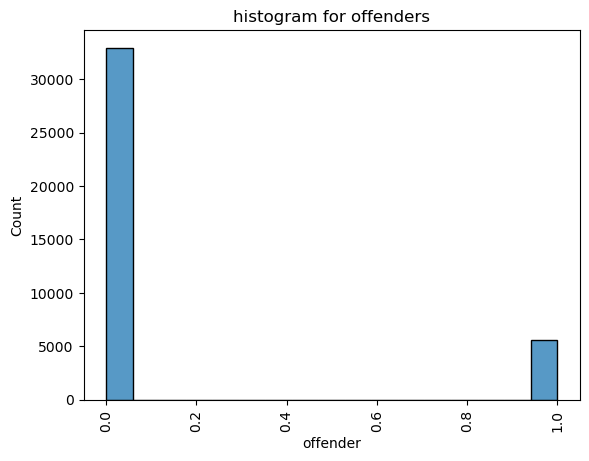

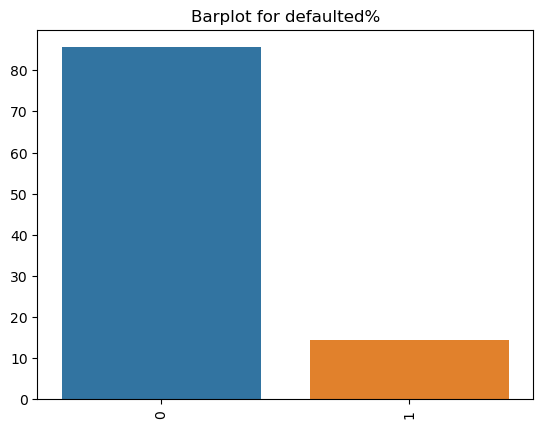

In [4434]:

sns.histplot(df.offender) #hue -> TODO
plt.title("histogram for offenders")
plt.xticks(rotation=90)
plt.show()

OffenderPercentage=df[df.offender == True].offender.count()/df.offender.count()*100
NonOfferderPercentage=df[df.offender == False].offender.count()/df.offender.count()*100

sns.barplot(y = [OffenderPercentage,NonOfferderPercentage],orient="v",x=[1,0])
plt.title("Barplot for defaulted%")
plt.xticks(rotation=90)
plt.show()


Text(0, 0.5, '% loan recovered')

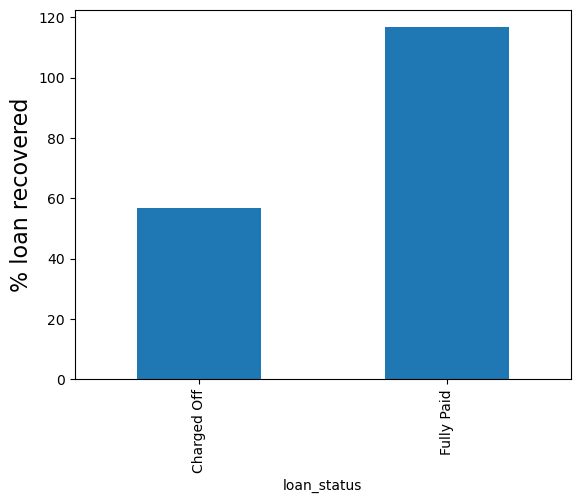

In [4496]:
grouped_by_total_payment = df.groupby('loan_status').total_pymnt.sum()
grouped_by_loan_amount =  df.groupby('loan_status').loan_amnt.sum()
profit_loss_rec = ((grouped_by_total_payment/grouped_by_loan_amount)*100).round(2)
ax = profit_loss_rec.plot(kind="bar")
ax.set_ylabel('% loan recovered', fontsize=16)

In [4508]:
#So Max offender % bisuness can afford with out loss
print(profit_loss_rec) 
maxOffenderPerBusinessCanAfford = offenderPercentage + (offenderPercentage * (profit_loss_rec[1] - 100)/100)
maxOffenderPerBusinessCanAfford = maxOffenderPerBusinessCanAfford.round(2)
print("Max offenders business can afford {0}".format(maxOffenderPerBusinessCanAfford))

loan_status
Charged Off     56.97
Fully Paid     116.62
dtype: float64
Max offenders business can afford 16.54


#### From Above its clear that business can afford 16.5% of offernders any variable which increases % of offenders would lead to loss of business

### So , only 57% of loans are recovered and out of fully recovered loans 17% is the profit from above plot

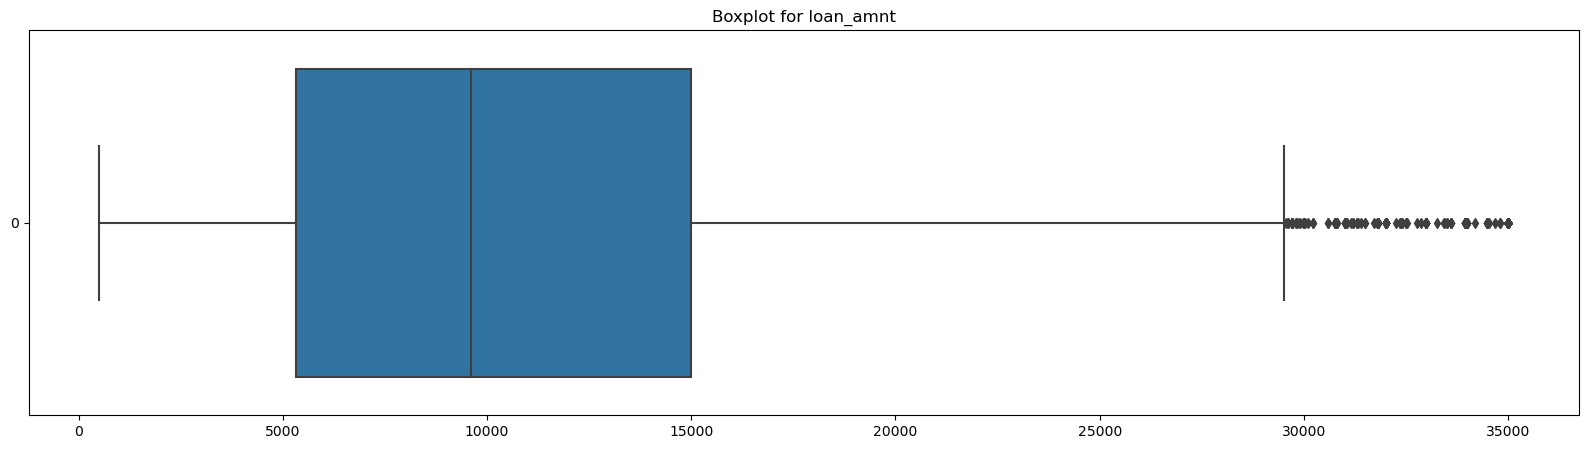

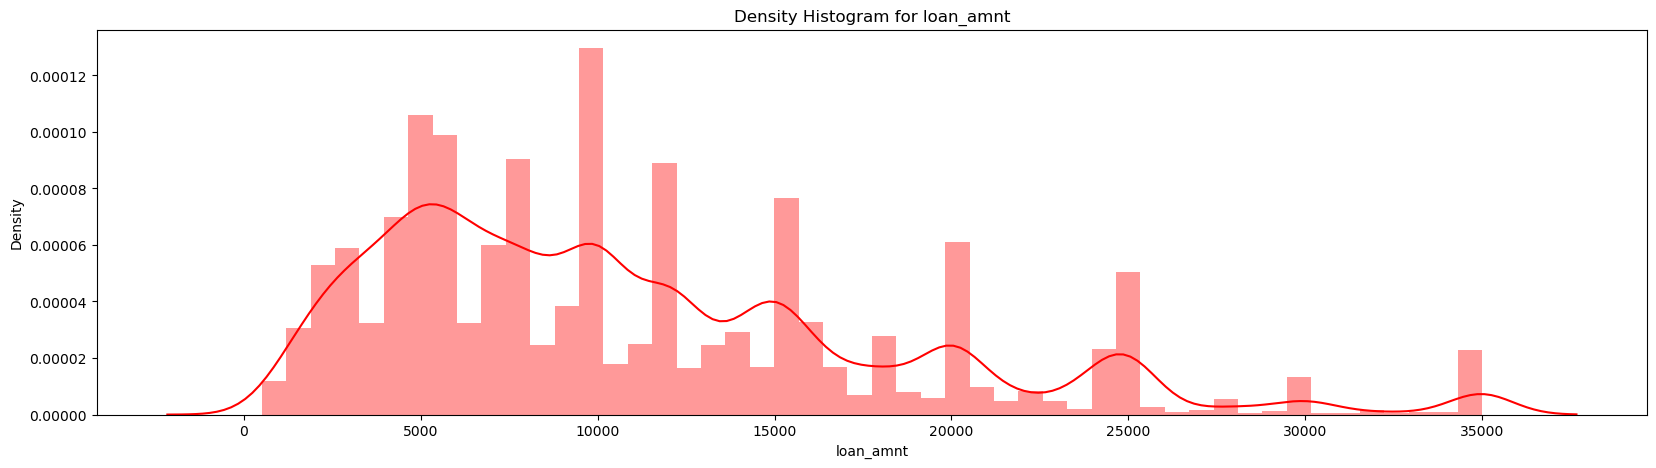

count    38504.000000
mean     11052.494546
std       7346.828612
min        500.000000
25%       5318.750000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [4436]:
create_boxplot_and_distplot('loan_amnt', "h")


loan_amnt name IQR 9681.25


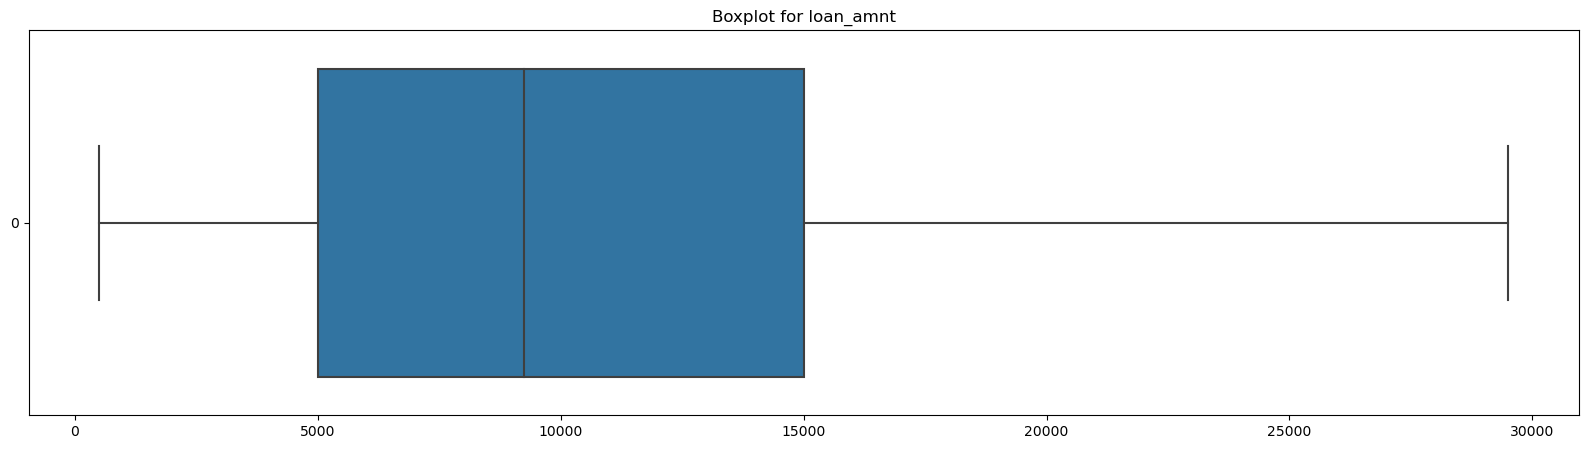

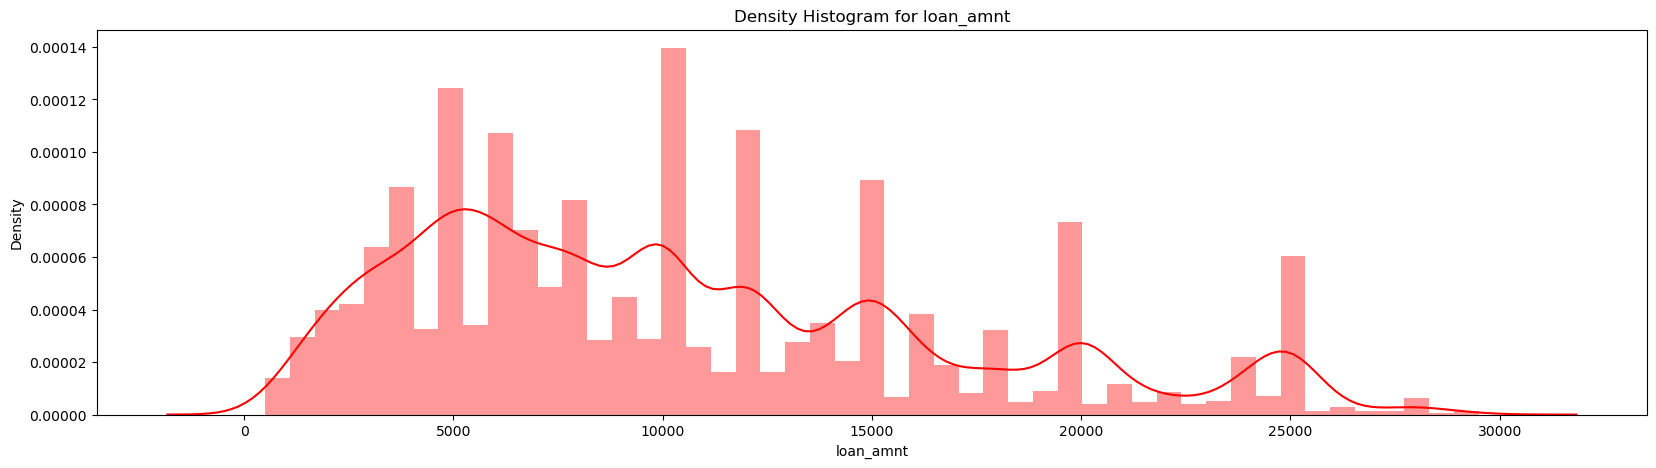

count    37417.000000
mean     10413.151776
std       6395.978456
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      29500.000000
Name: loan_amnt, dtype: float64


In [4437]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('loan_amnt')

create_boxplot_and_distplot('loan_amnt', "h")

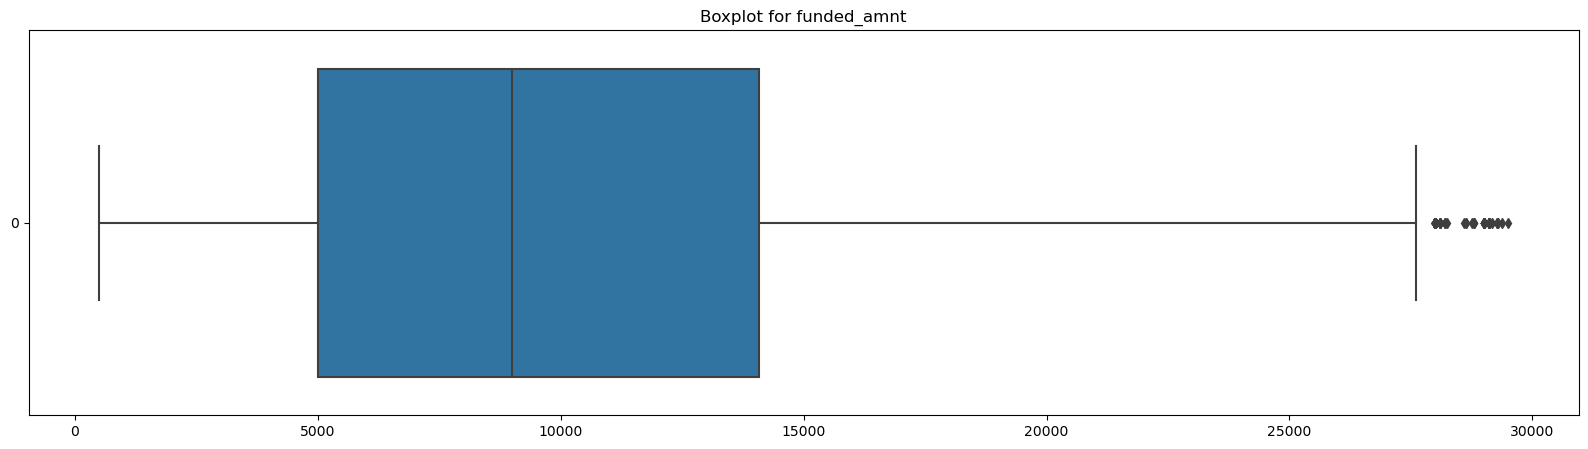

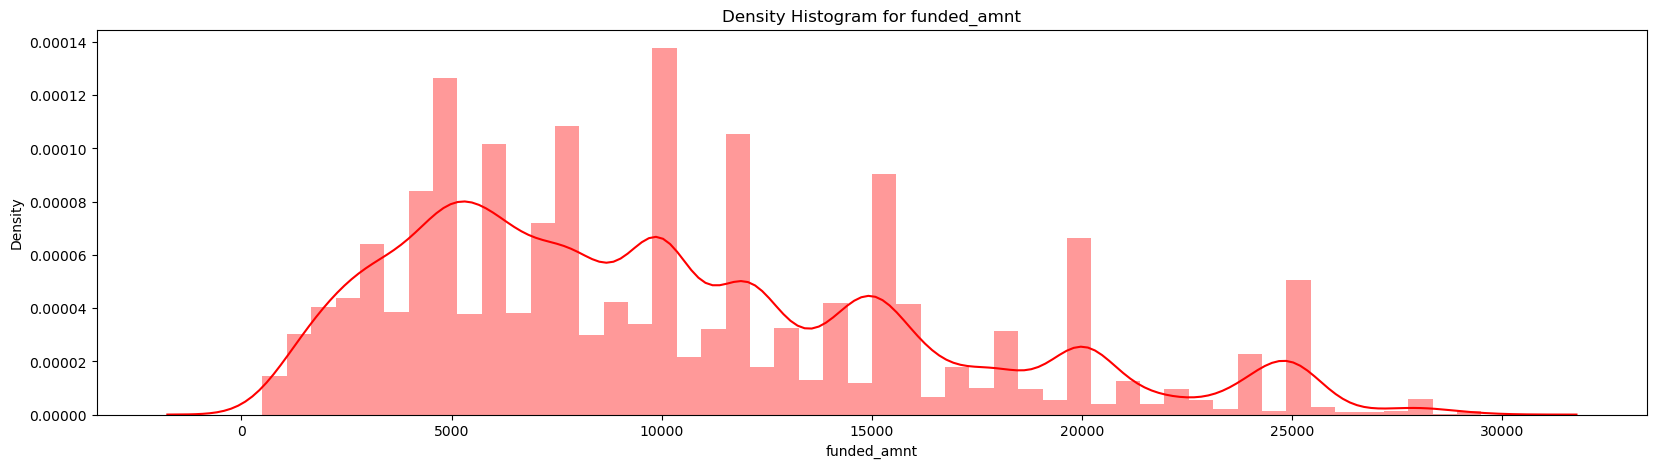

count    37417.000000
mean     10186.550231
std       6190.263034
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14075.000000
max      29500.000000
Name: funded_amnt, dtype: float64


In [4438]:
create_boxplot_and_distplot('funded_amnt', "h")


funded_amnt name IQR 9075.0


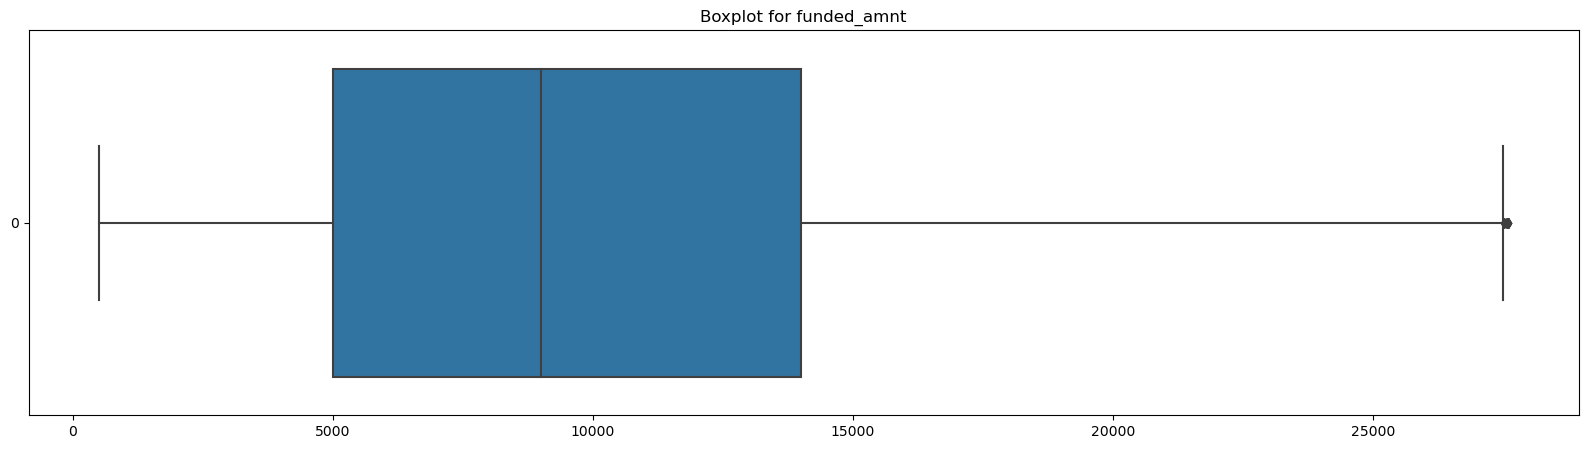

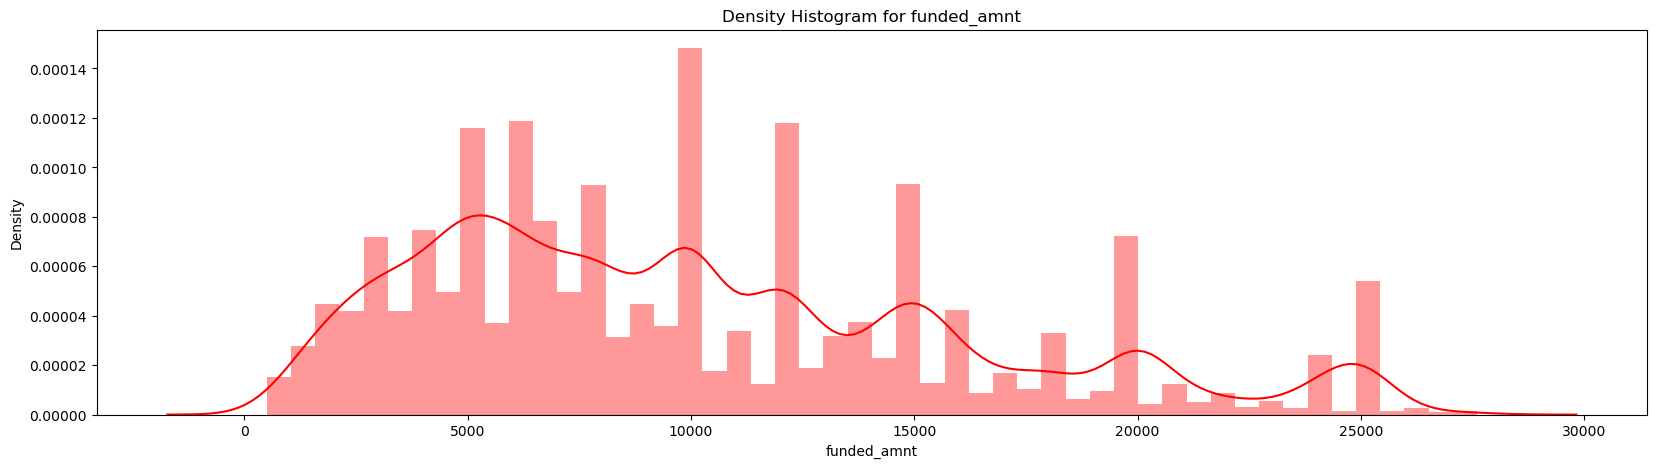

count    37256.000000
mean     10108.575800
std       6088.604902
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27600.000000
Name: funded_amnt, dtype: float64


In [4439]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('funded_amnt')

create_boxplot_and_distplot('funded_amnt', "h")

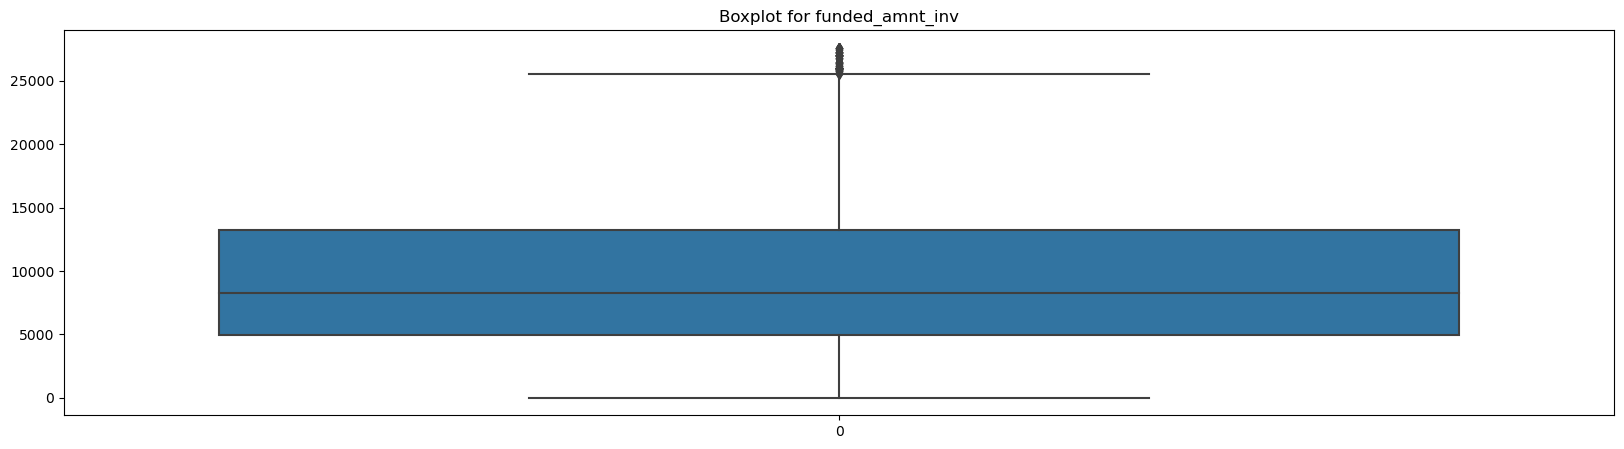

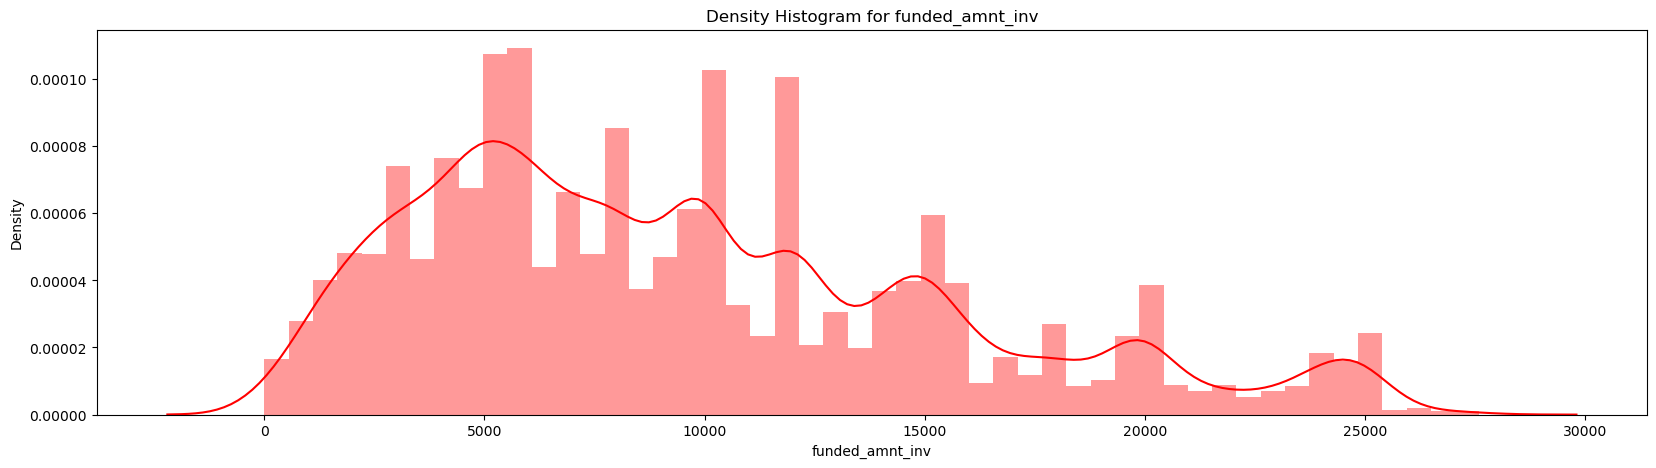

count    37256.000000
mean      9562.379733
std       6029.945034
min          0.000000
25%       4983.459319
50%       8300.000000
75%      13200.000000
max      27600.000000
Name: funded_amnt_inv, dtype: float64


In [4440]:
create_boxplot_and_distplot('funded_amnt_inv')


funded_amnt_inv name IQR 8216.54068075


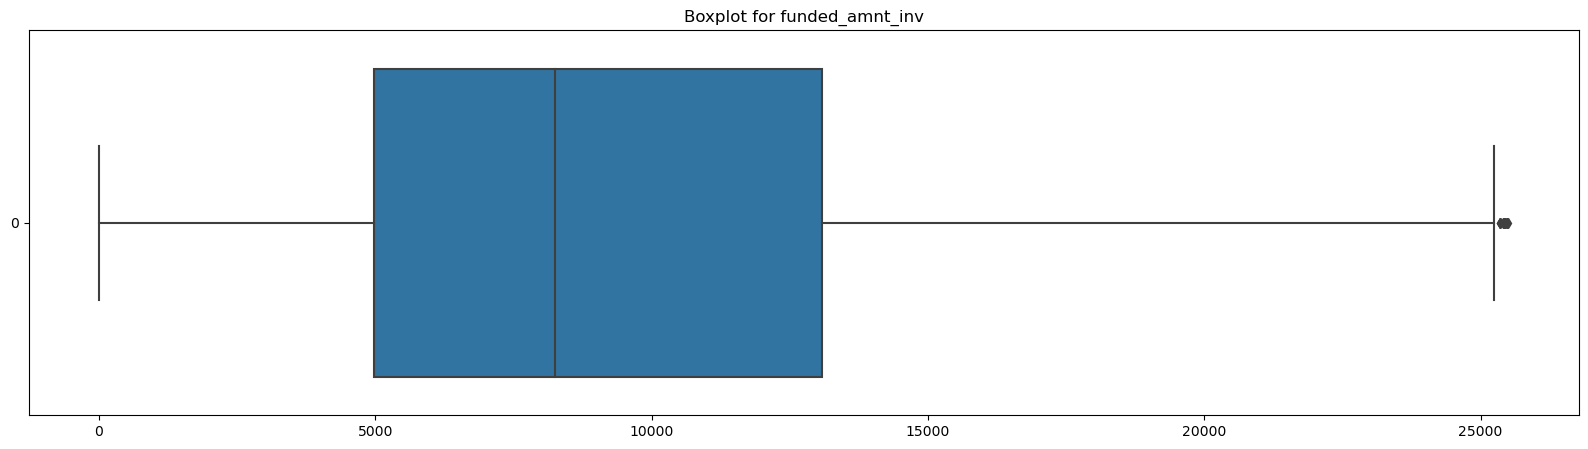

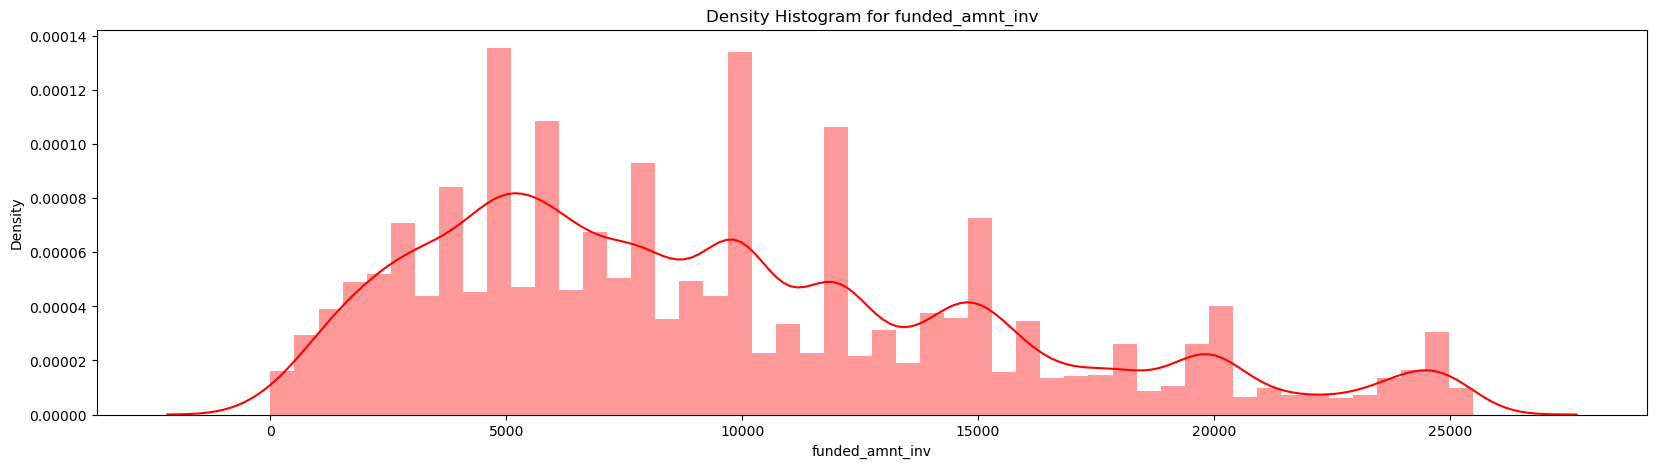

count    37154.000000
mean      9515.906488
std       5972.448517
min          0.000000
25%       4975.000000
50%       8250.000000
75%      13090.600235
max      25500.000000
Name: funded_amnt_inv, dtype: float64


In [4441]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('funded_amnt_inv')

create_boxplot_and_distplot('funded_amnt_inv', "h")

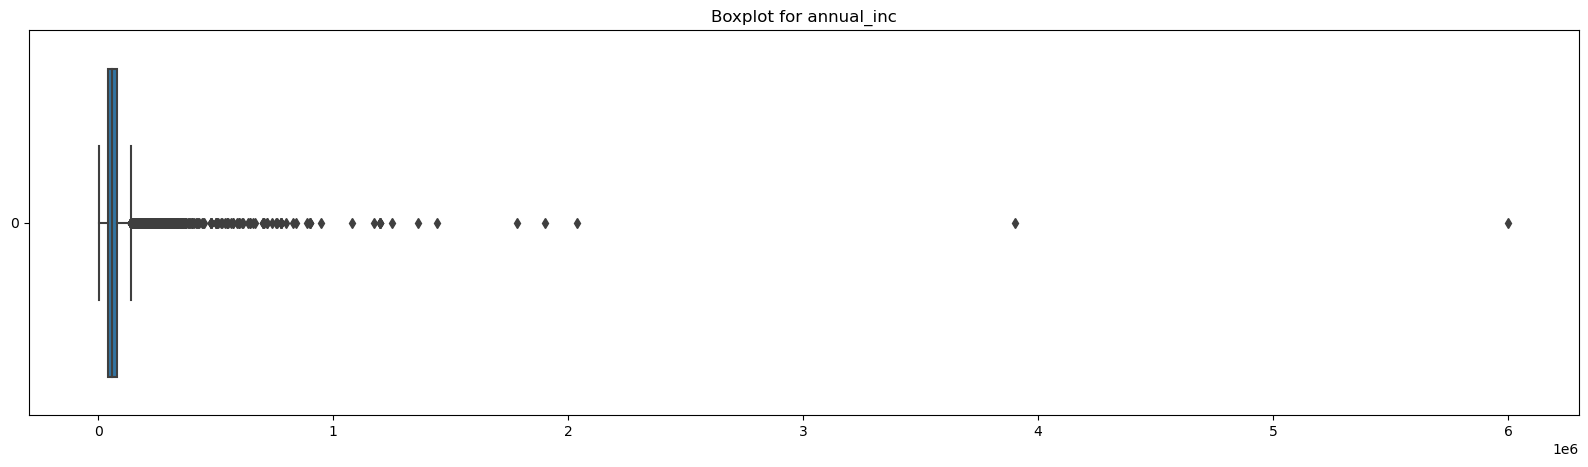

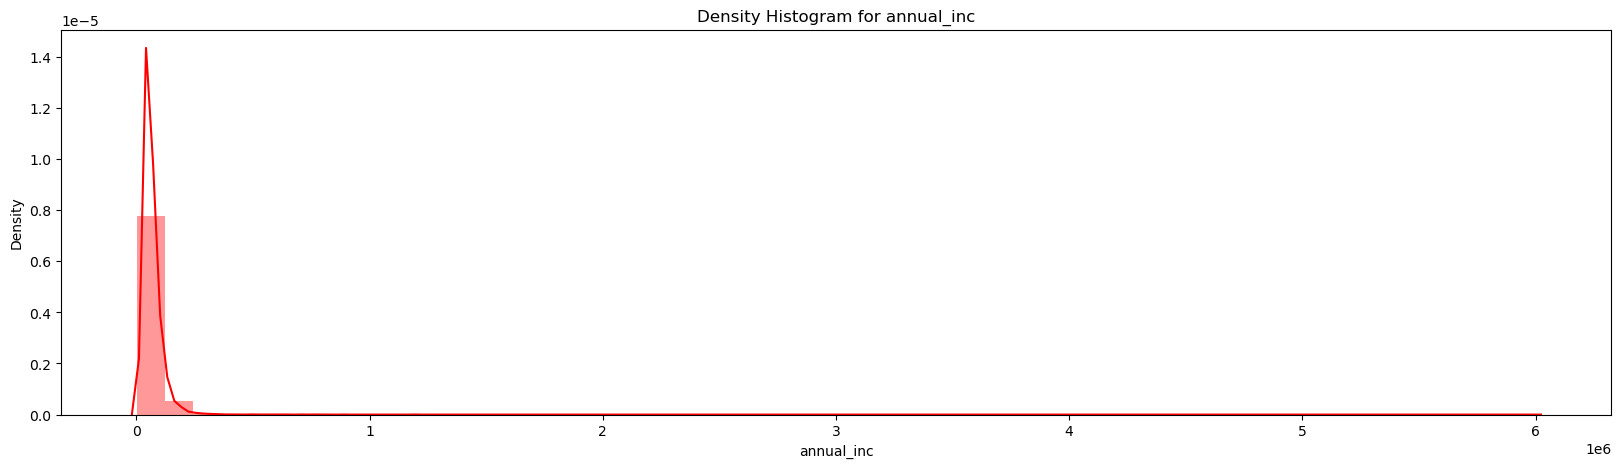

count    3.715400e+04
mean     6.693421e+04
std      6.297516e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.700000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [4442]:
create_boxplot_and_distplot('annual_inc', 'h') #vertical boxplot does not look good for analysis


annual_inc name IQR 40000.0


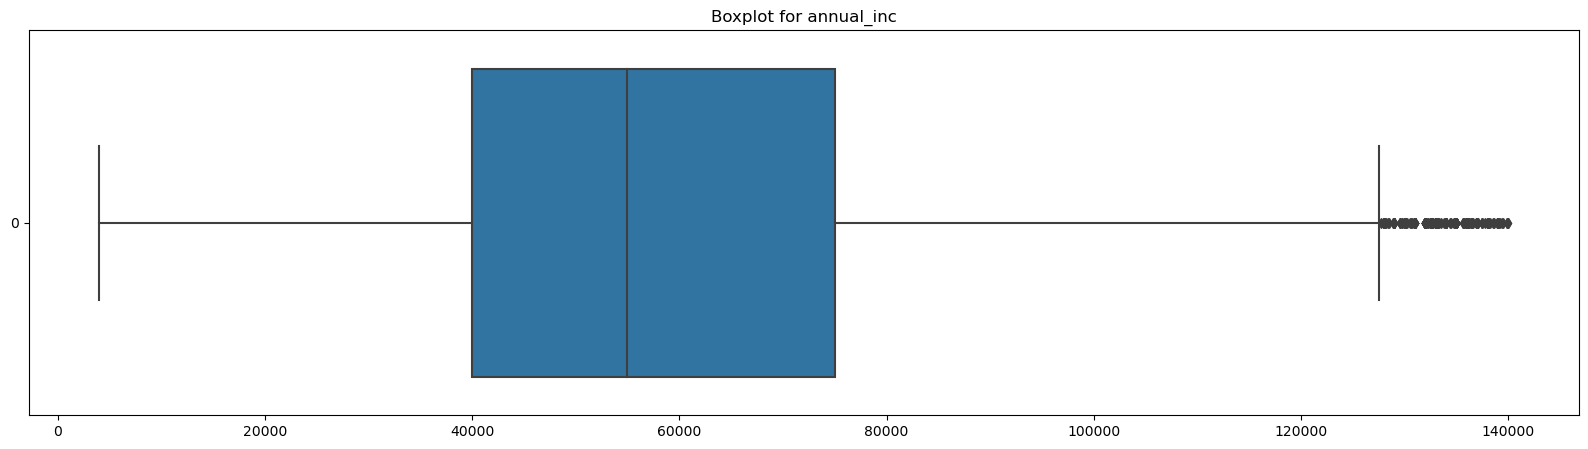

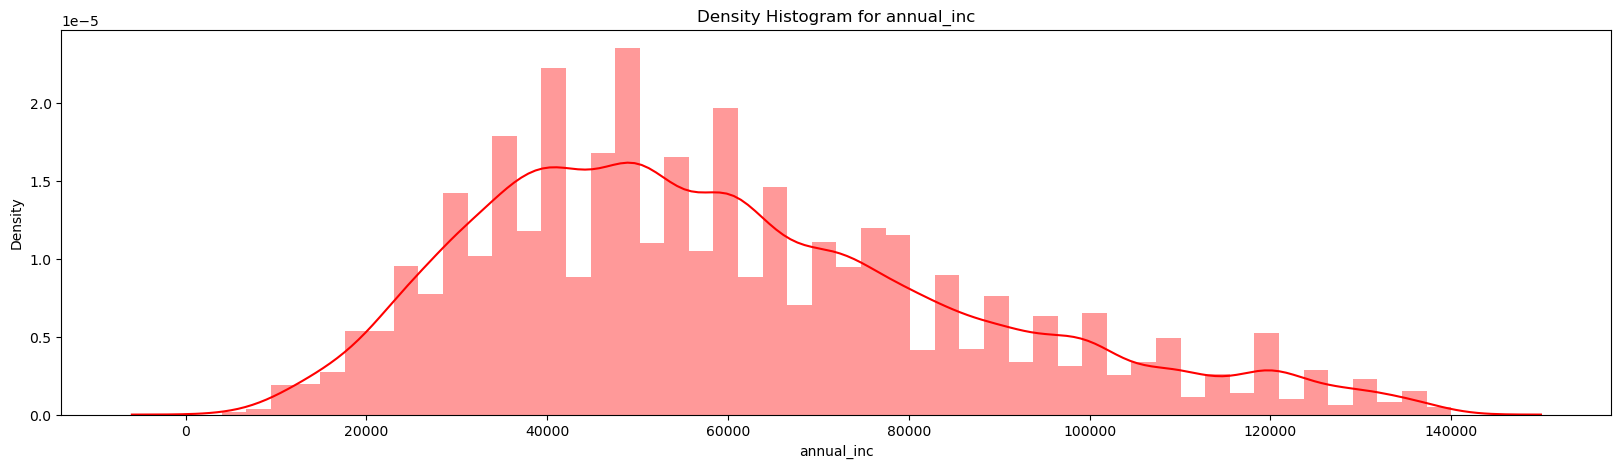

count     35386.000000
mean      59655.590183
std       26901.743018
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      139992.000000
Name: annual_inc, dtype: float64


In [4443]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('annual_inc')

create_boxplot_and_distplot('annual_inc', "h")

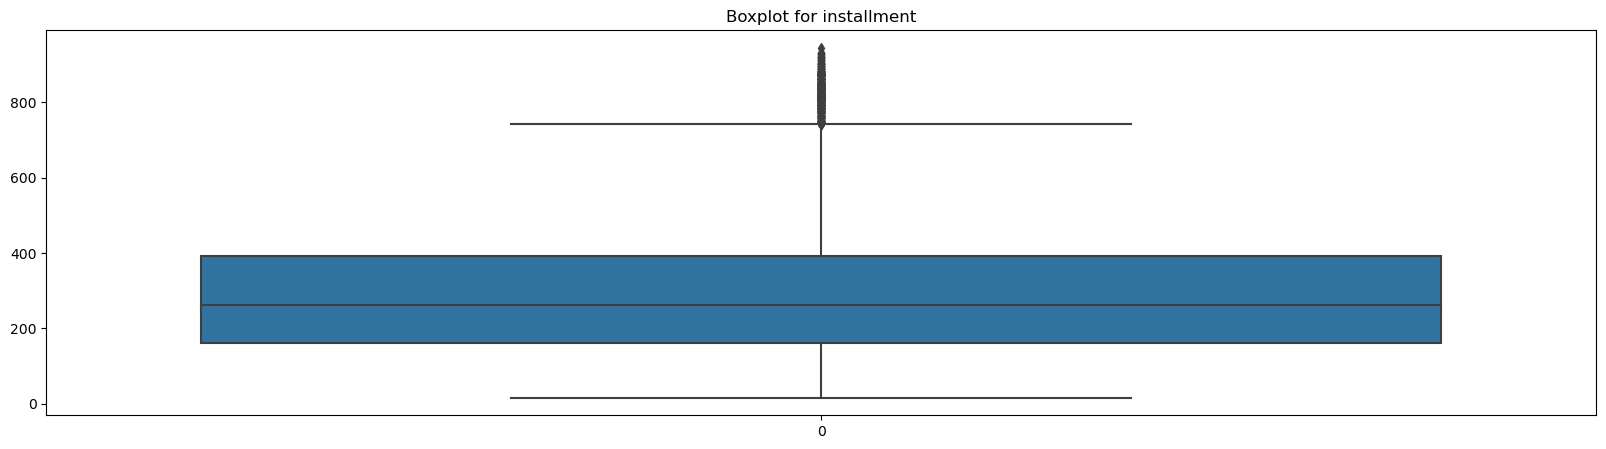

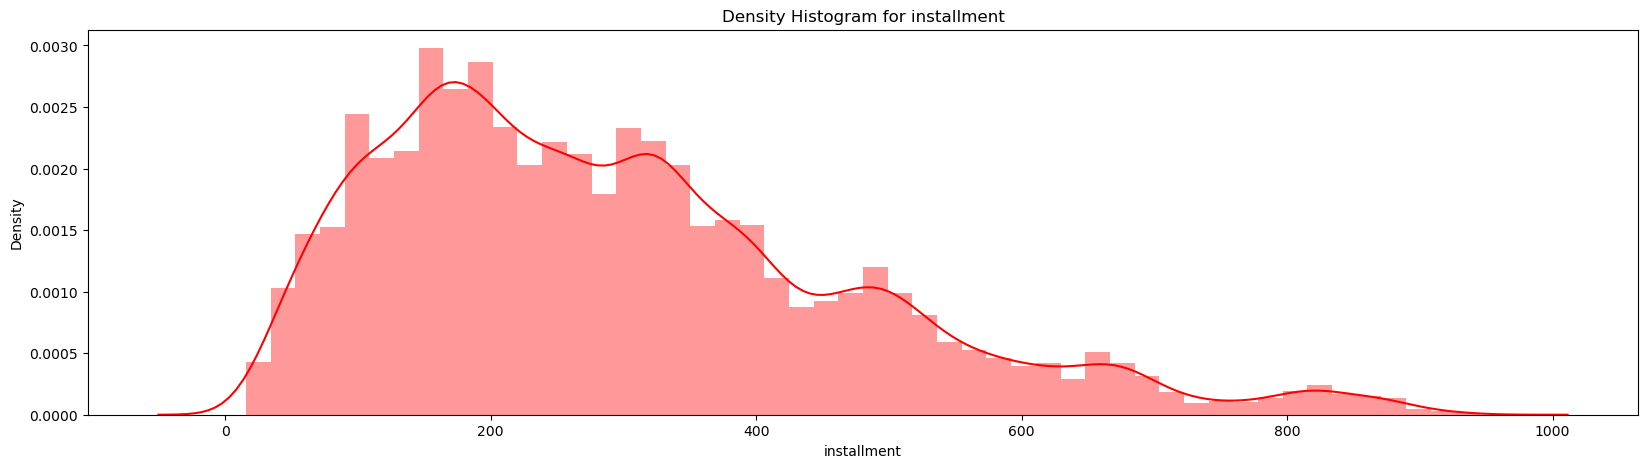

count    35386.000000
mean       296.414935
std        178.362378
min         15.690000
25%        161.130000
50%        262.430000
75%        393.500000
max        945.350000
Name: installment, dtype: float64


In [4444]:
create_boxplot_and_distplot('installment')


installment name IQR 232.37


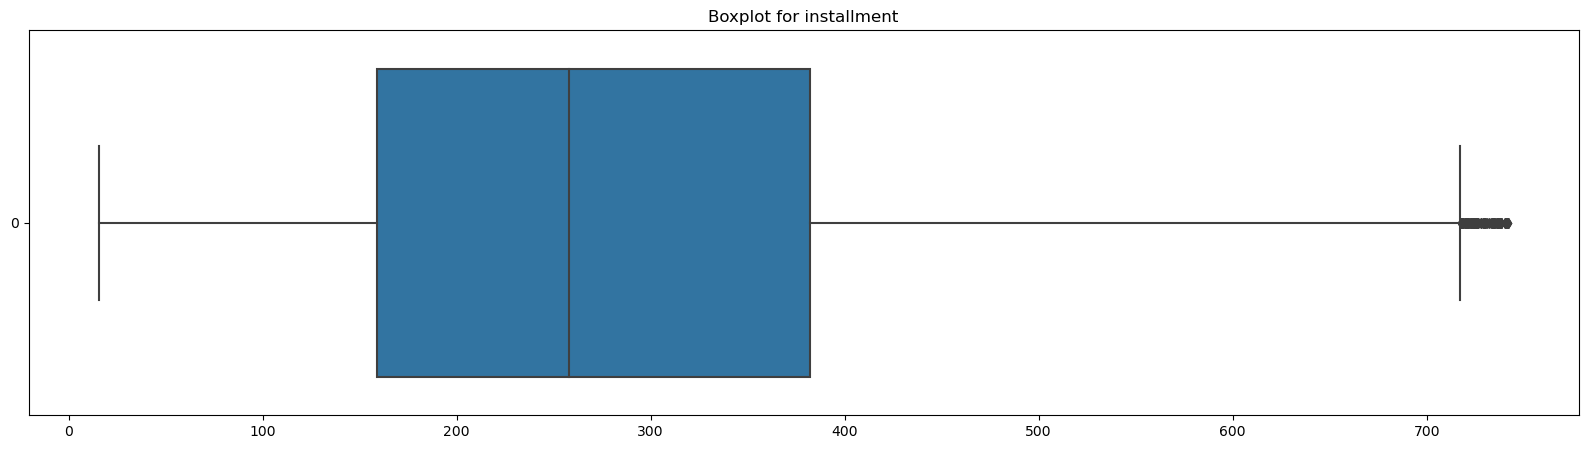

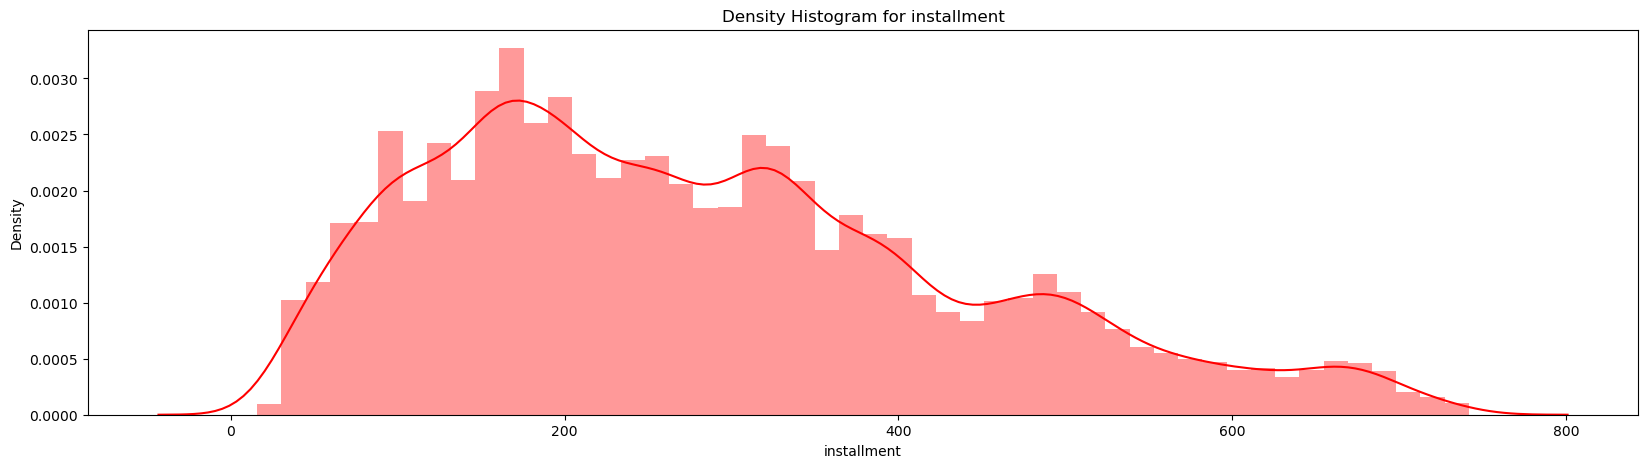

count    34520.000000
mean       283.132566
std        159.233885
min         15.690000
25%        158.860000
50%        257.795000
75%        382.300000
max        741.920000
Name: installment, dtype: float64


In [4445]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('installment')

create_boxplot_and_distplot('installment', "h")

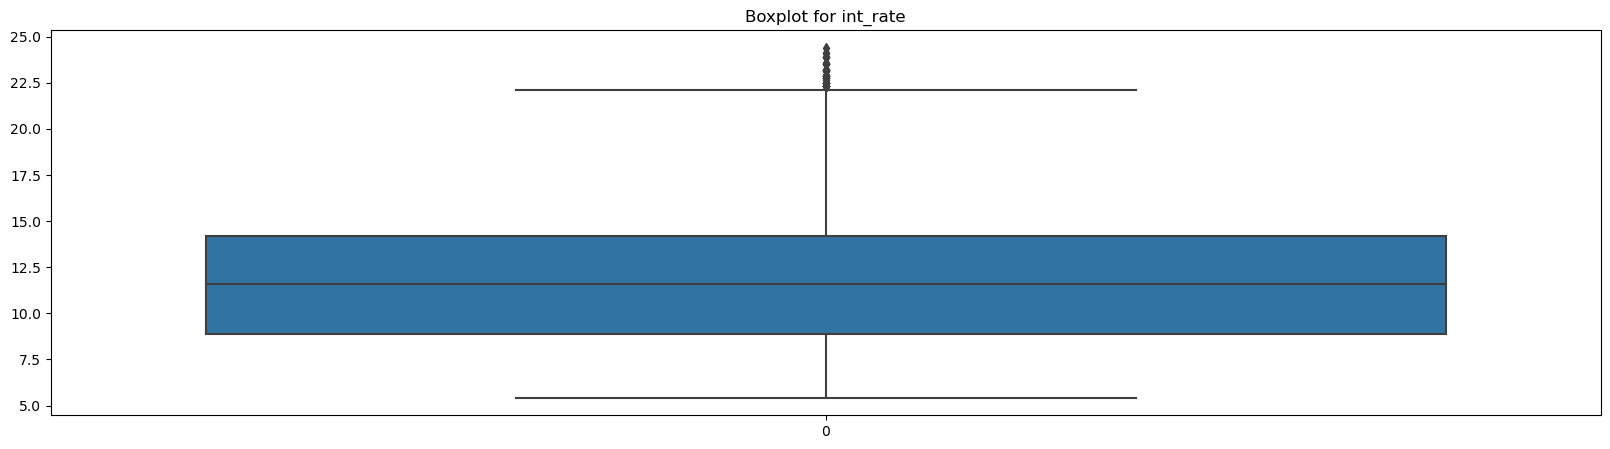

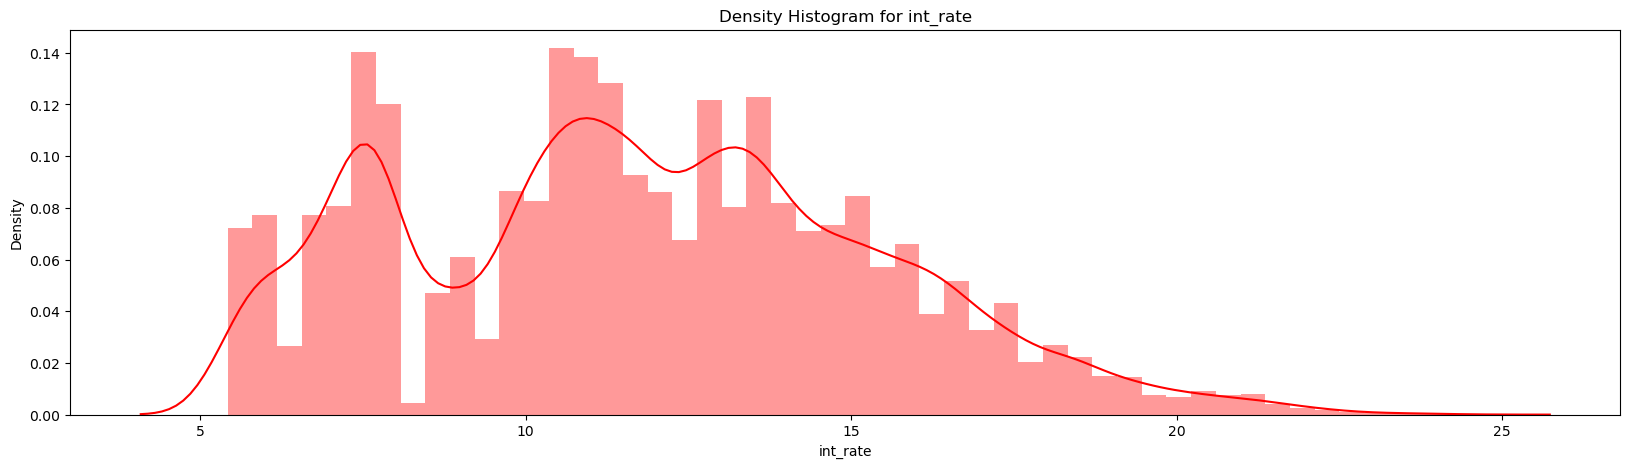

count    34520.000000
mean        11.735093
std          3.599947
min          5.420000
25%          8.900000
50%         11.580000
75%         14.220000
max         24.400000
Name: int_rate, dtype: float64


In [4446]:
create_boxplot_and_distplot('int_rate') 


int_rate name IQR 5.32


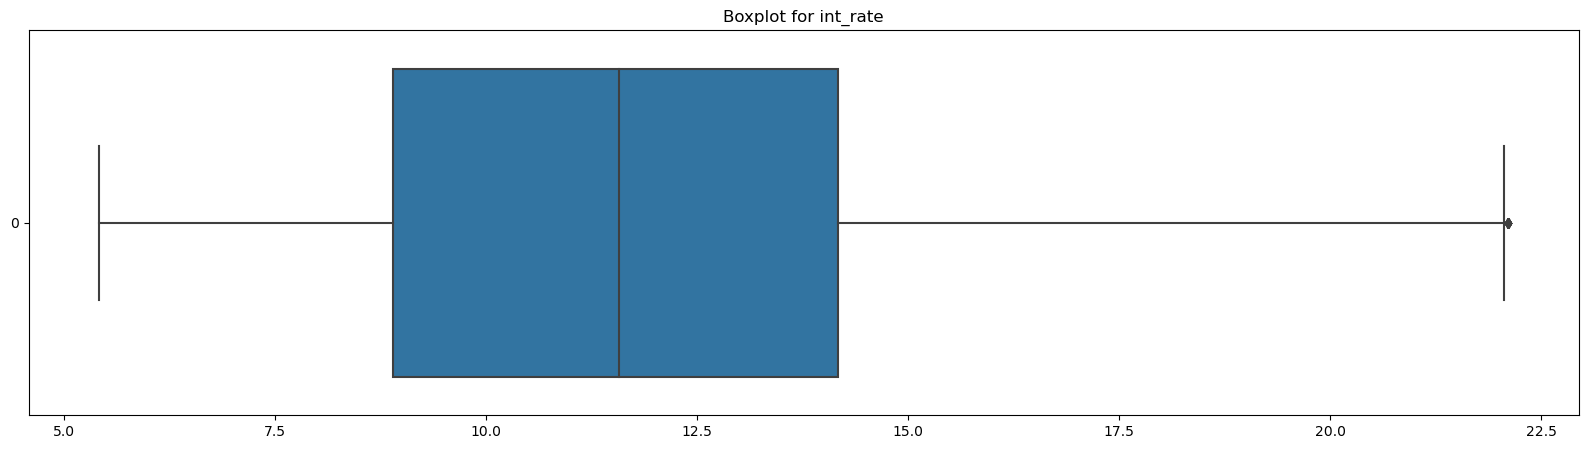

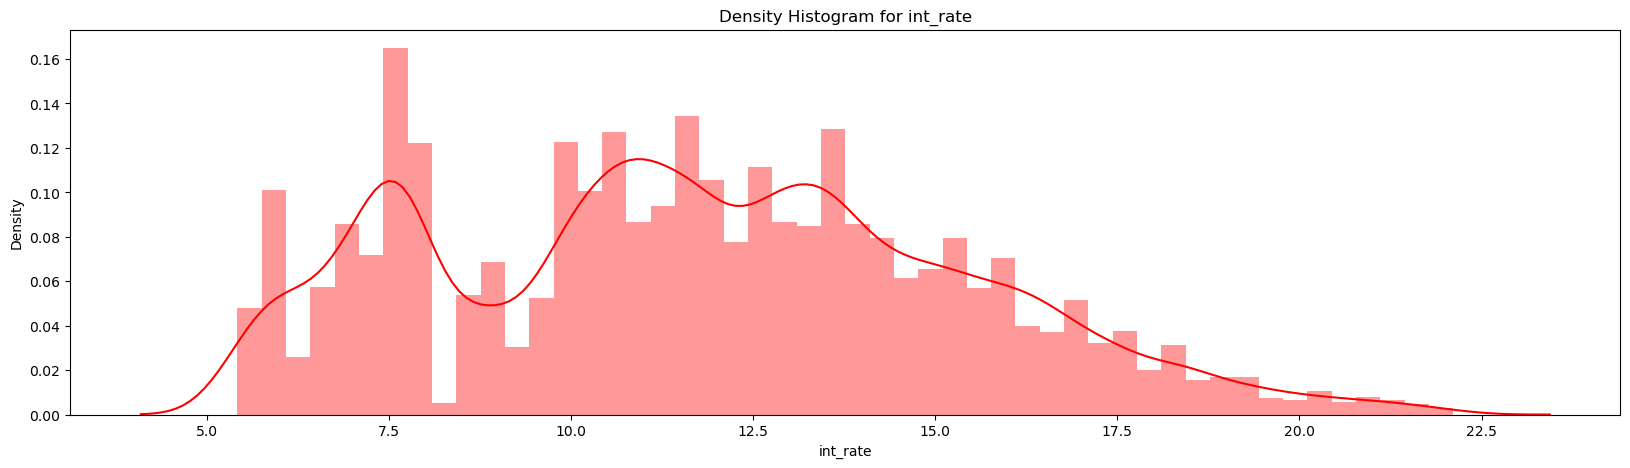

count    34466.000000
mean        11.717522
std          3.575199
min          5.420000
25%          8.900000
50%         11.580000
75%         14.170000
max         22.110000
Name: int_rate, dtype: float64


In [4447]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('int_rate')

create_boxplot_and_distplot('int_rate', "h")

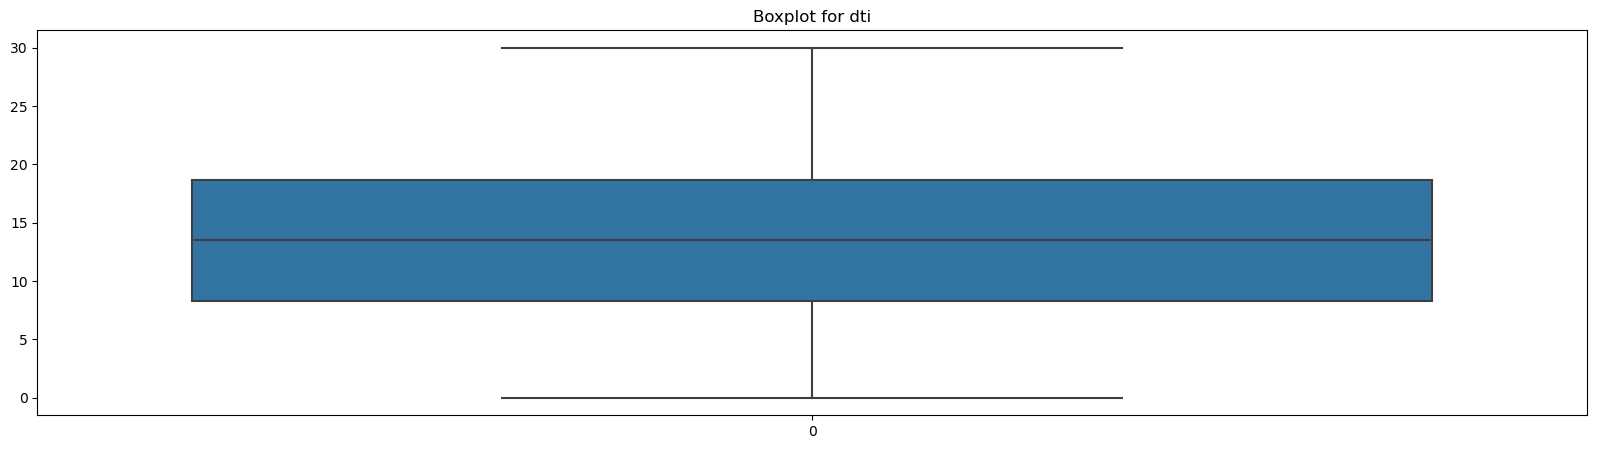

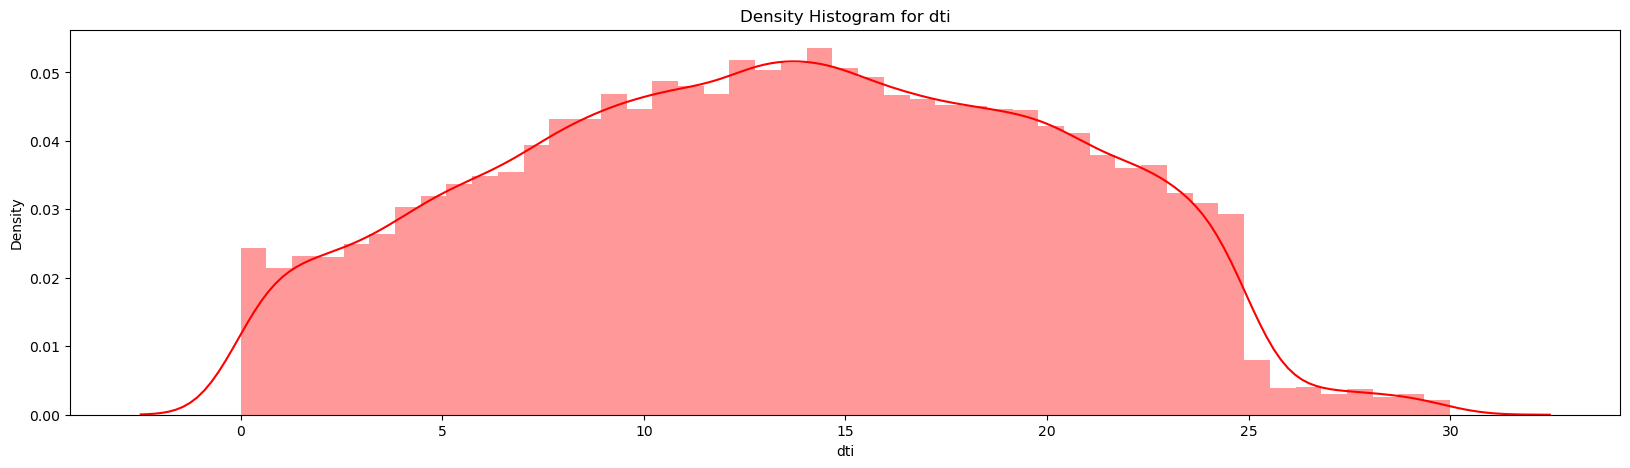

count    34466.000000
mean        13.410028
std          6.672639
min          0.000000
25%          8.290000
50%         13.510000
75%         18.700000
max         29.990000
Name: dti, dtype: float64


In [4448]:
create_boxplot_and_distplot('dti')

dti name IQR 10.41


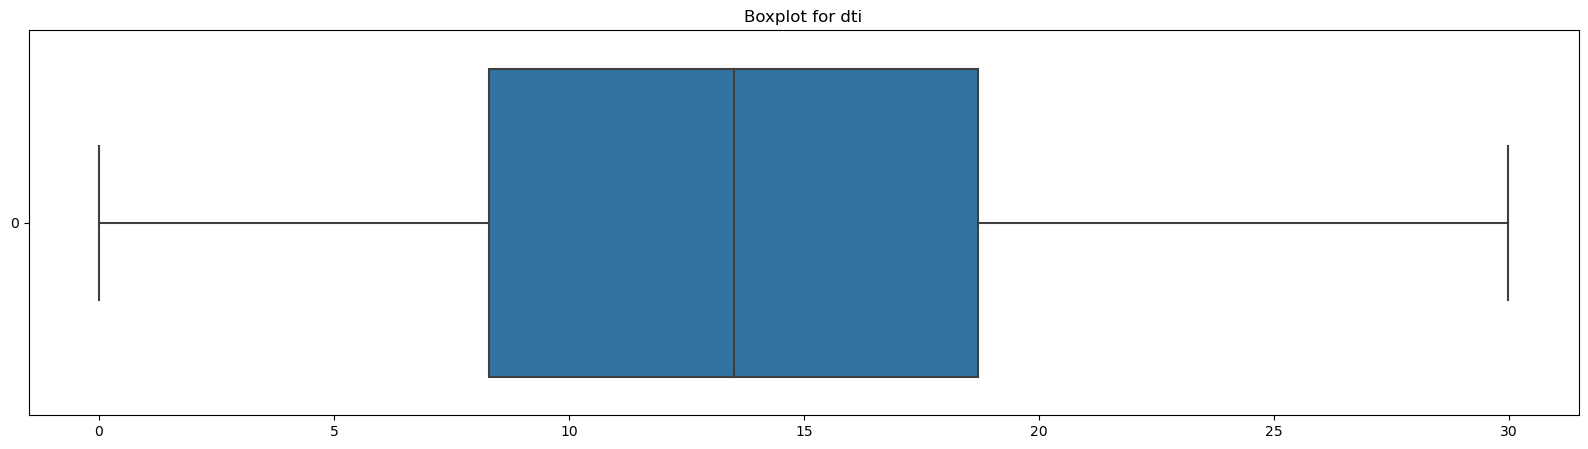

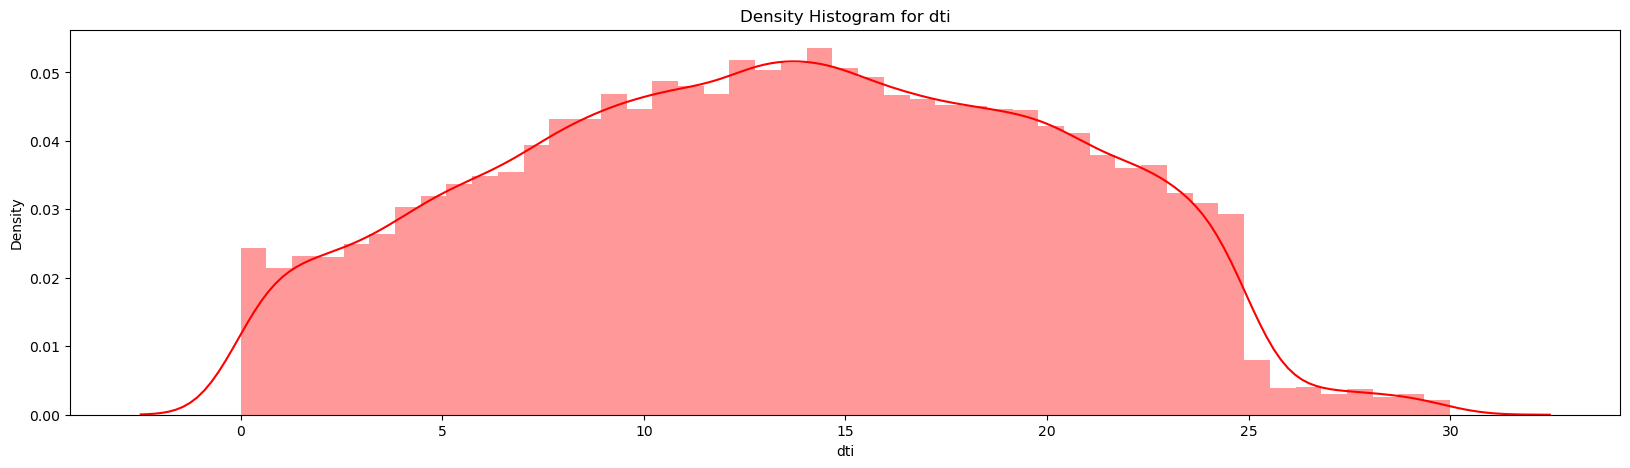

count    34466.000000
mean        13.410028
std          6.672639
min          0.000000
25%          8.290000
50%         13.510000
75%         18.700000
max         29.990000
Name: dti, dtype: float64


In [4449]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('dti')

create_boxplot_and_distplot('dti', "h")

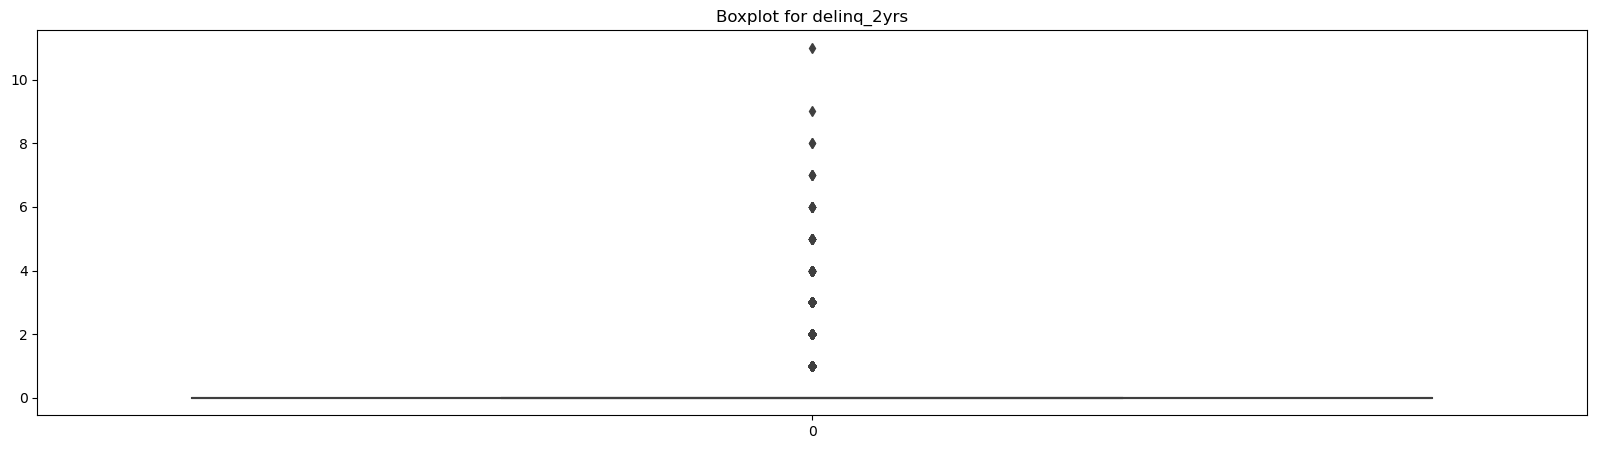

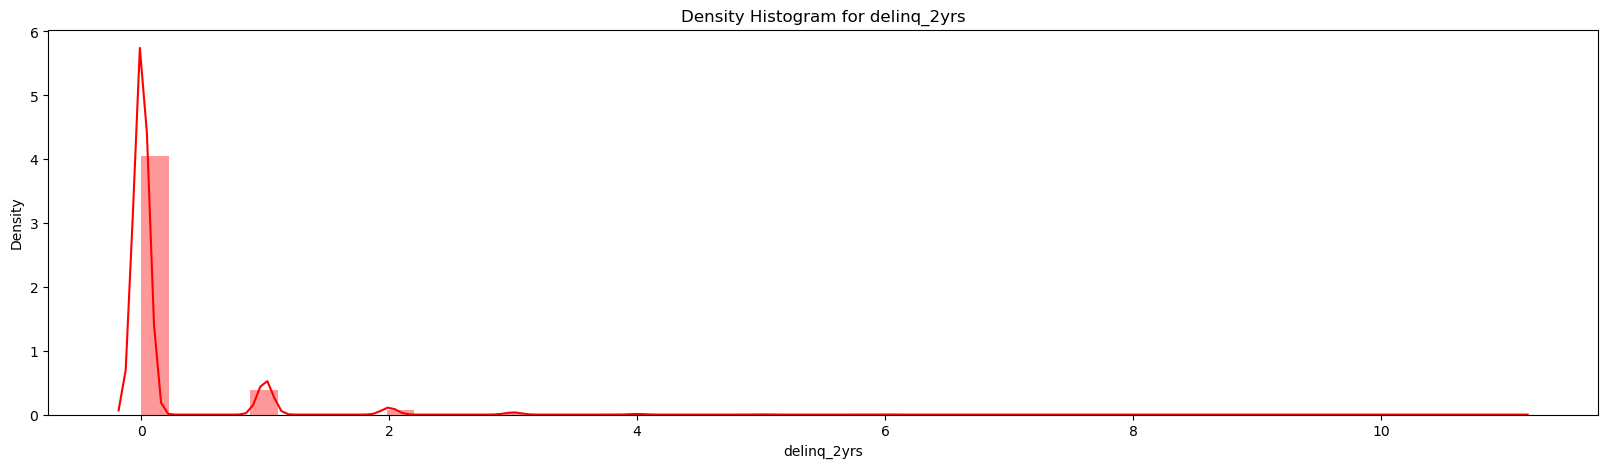

count    34466.000000
mean         0.145651
std          0.492121
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64


In [4450]:
create_boxplot_and_distplot('delinq_2yrs')
create_countplot('delinq_2yrs')

In [4451]:
#Now drop outliers from the col series and check the plots
#df = drop_outliers_from_series('delinq_2yrs')
#create_boxplot_and_distplot('delinq_2yrs', "h")

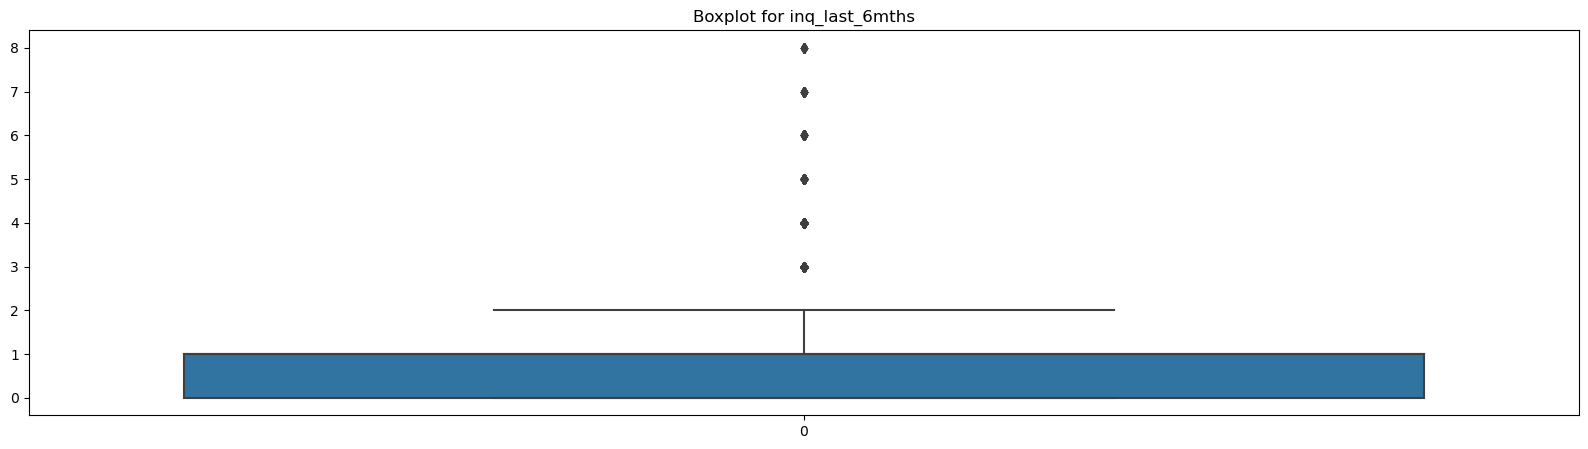

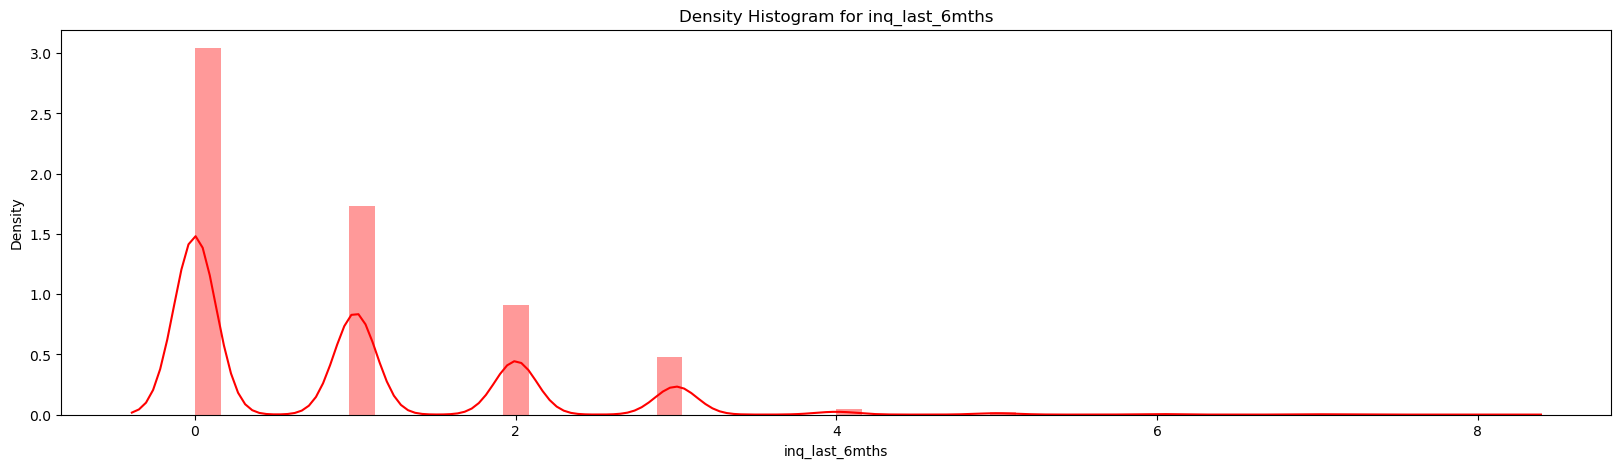

count    34466.000000
mean         0.862647
std          1.059903
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64


In [4452]:

create_boxplot_and_distplot('inq_last_6mths') 
create_countplot('inq_last_6mths') 

In [4453]:
#Now drop outliers from the col series and check the plots
#df = drop_outliers_from_series('inq_last_6mths')

#create_boxplot_and_distplot('inq_last_6mths', "h")

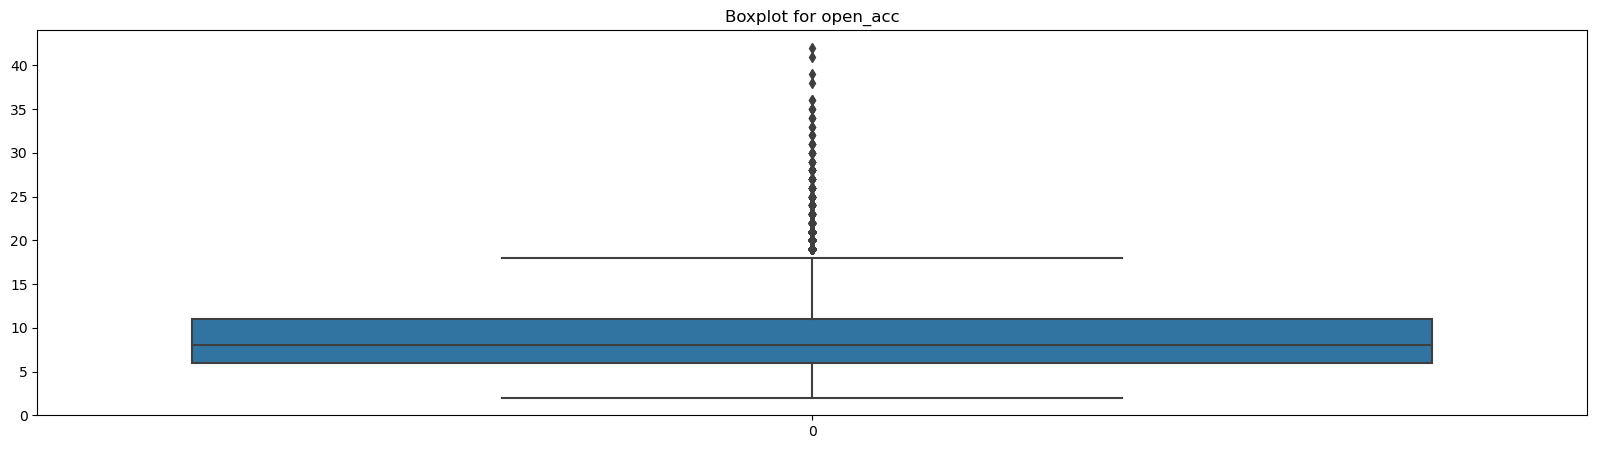

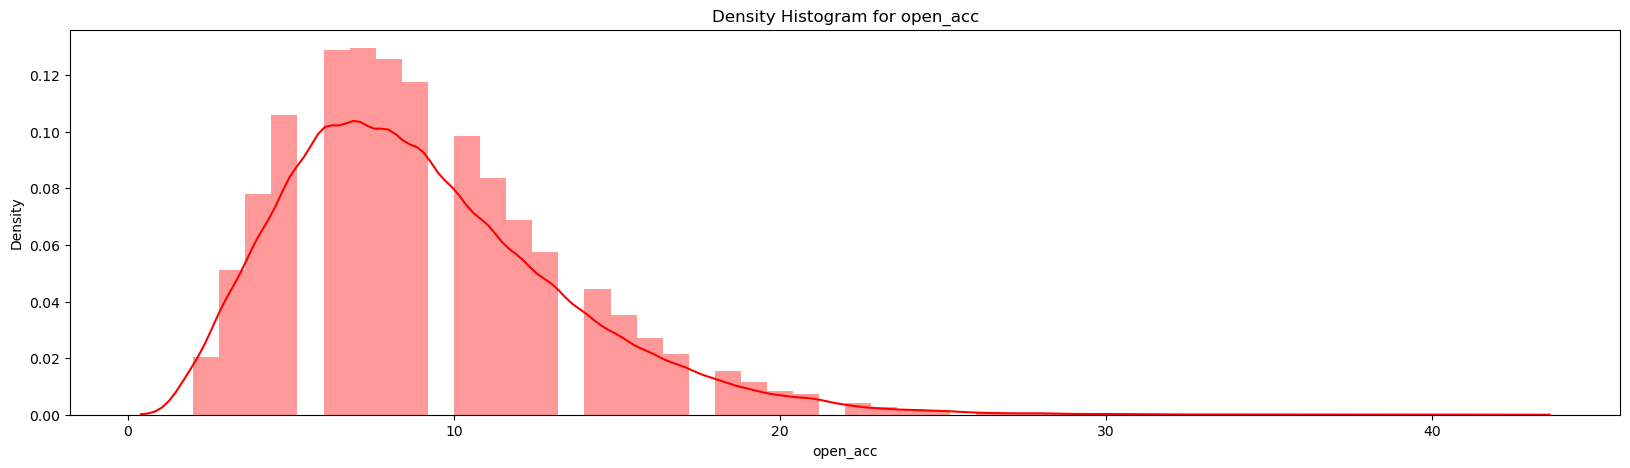

count    34466.000000
mean         9.093425
std          4.329143
min          2.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         42.000000
Name: open_acc, dtype: float64


In [4454]:
create_boxplot_and_distplot('open_acc') 
create_countplot('open_acc') 

In [4455]:
#Now drop outliers from the col series and check the plots
#df = drop_outliers_from_series('open_acc')

#create_boxplot_and_distplot('open_acc', "h")

In [4456]:
print(df['pub_rec'].describe())
#create_boxplot_and_distplot('pub_rec', 'h')
#create_countplot('pub_rec')

count    34466.000000
mean         0.058405
std          0.243734
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64


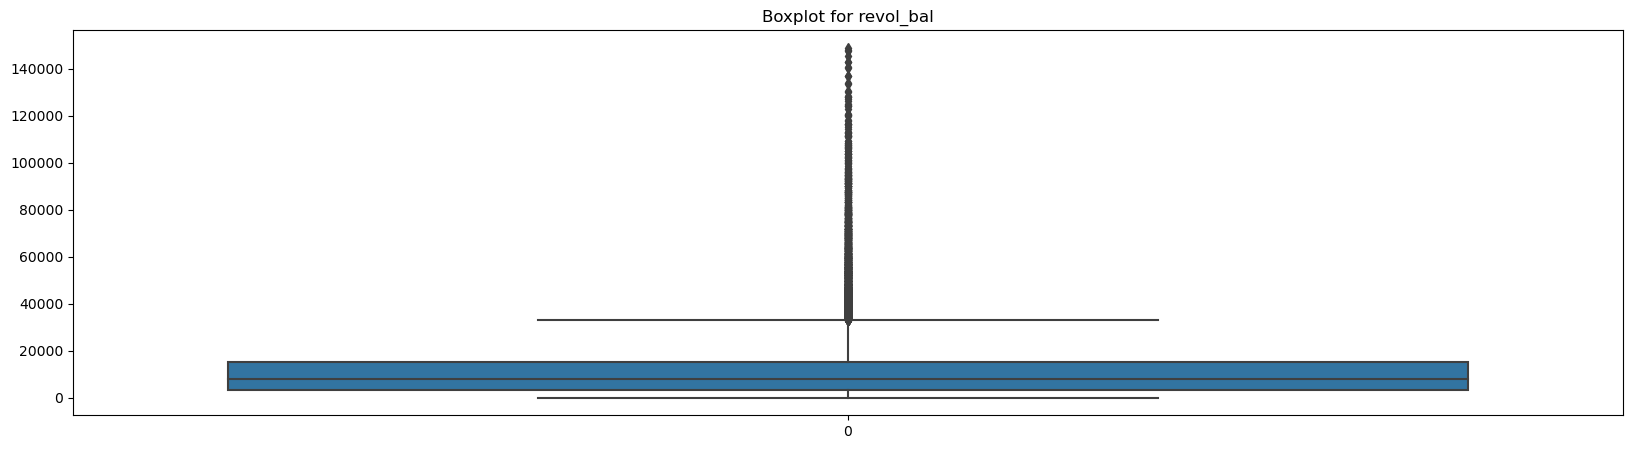

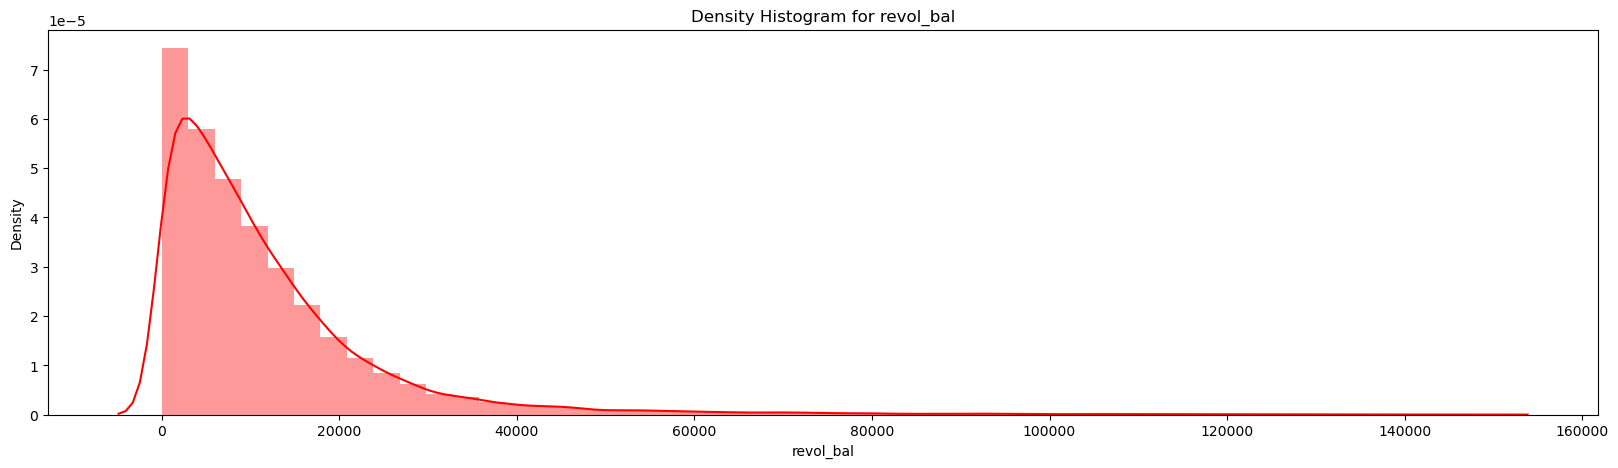

count     34466.000000
mean      11669.637411
std       13085.391155
min           0.000000
25%        3418.250000
50%        8128.000000
75%       15285.000000
max      149000.000000
Name: revol_bal, dtype: float64


In [4457]:
create_boxplot_and_distplot('revol_bal')

revol_bal name IQR 11866.75


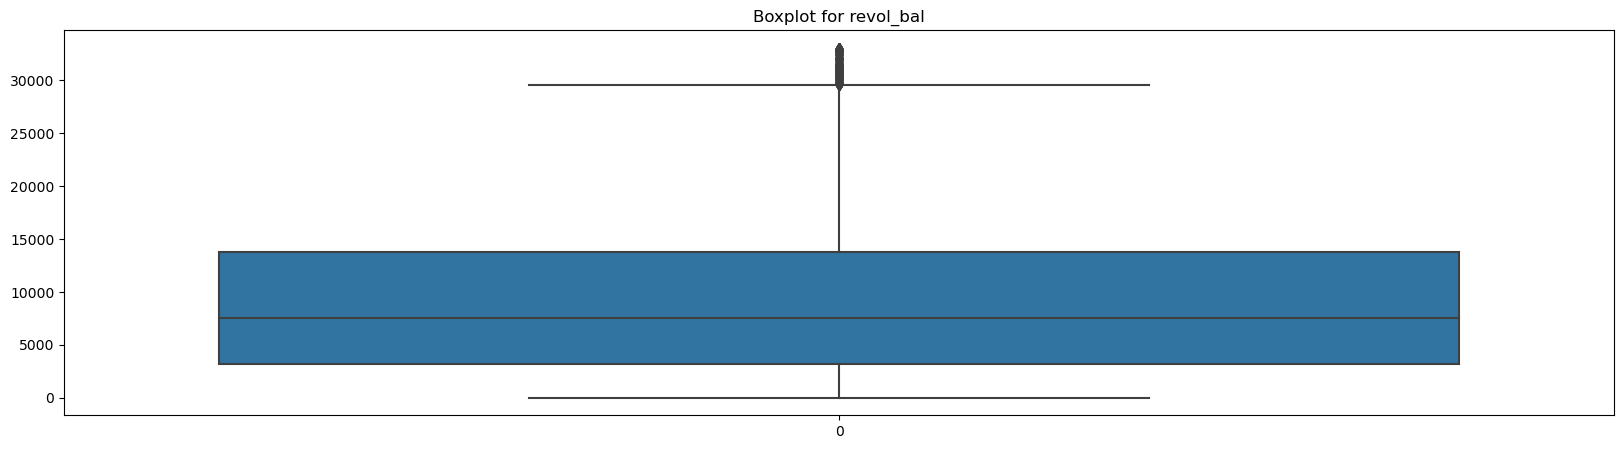

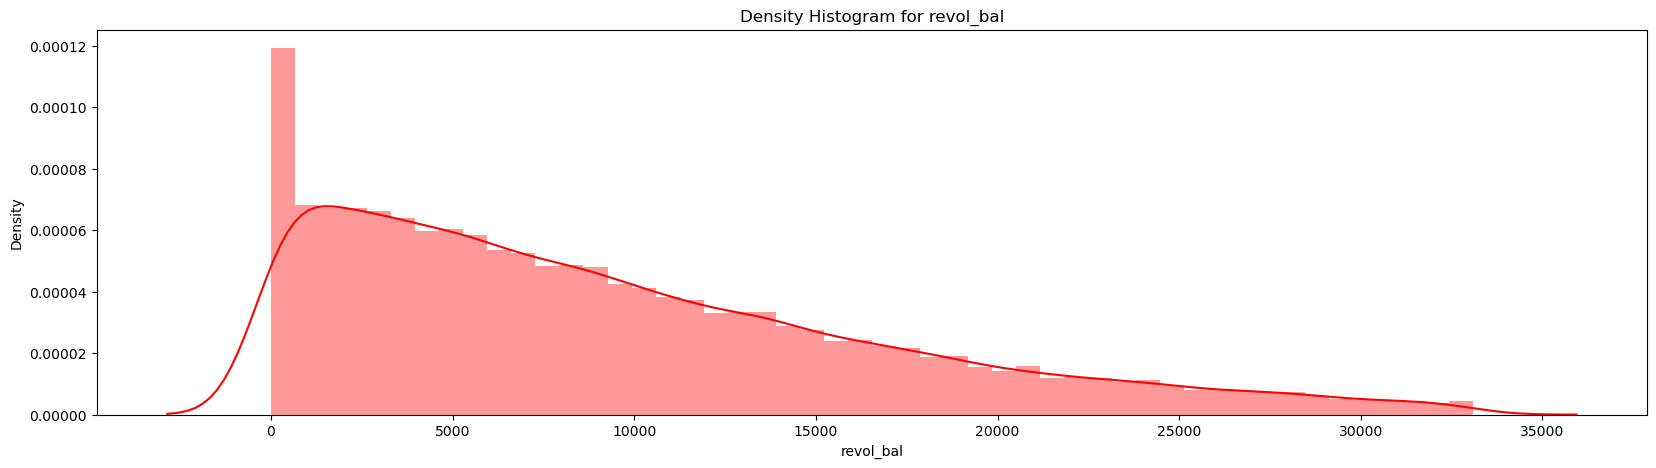

count    32565.000000
mean      9324.717212
std       7600.389411
min          0.000000
25%       3209.000000
50%       7537.000000
75%      13750.000000
max      33084.000000
Name: revol_bal, dtype: float64


In [4458]:
#Now drop outliers from the col series and check the plots
df = drop_outliers_from_series('revol_bal')

create_boxplot_and_distplot('revol_bal')

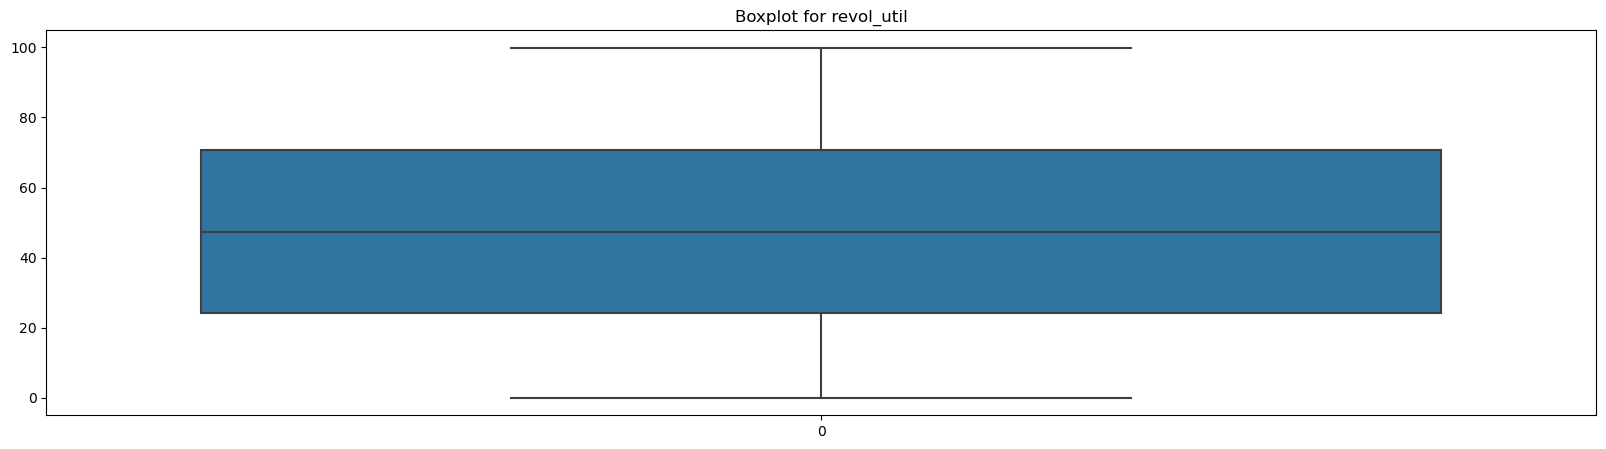

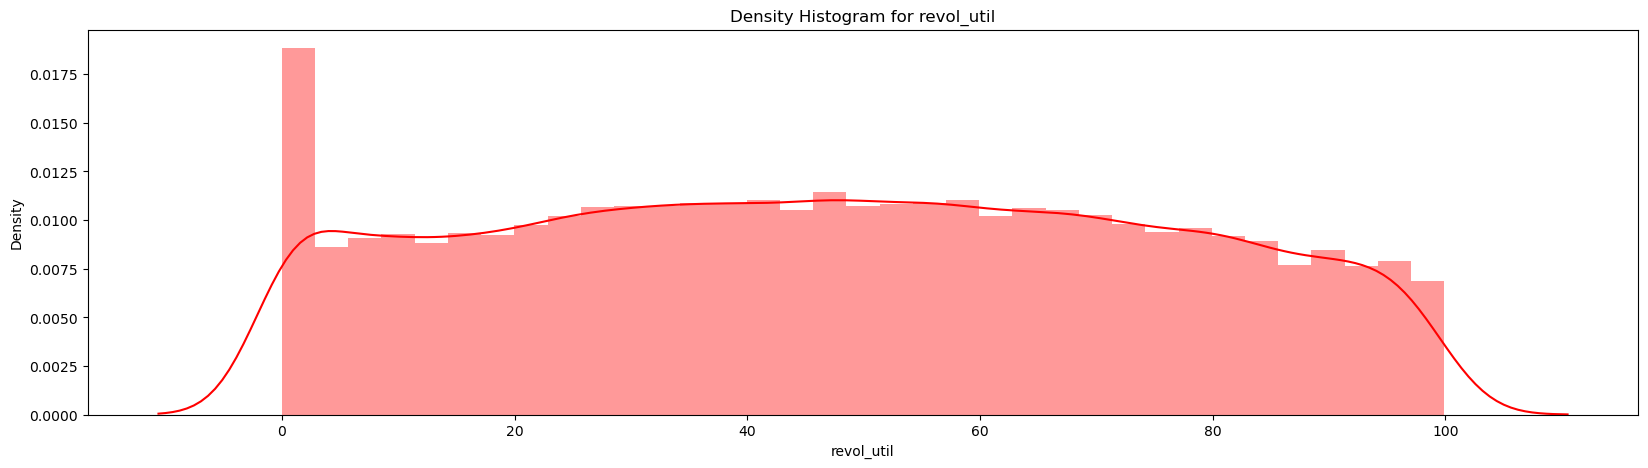

count    32565.000000
mean        47.506666
std         28.224282
min          0.000000
25%         24.100000
50%         47.400000
75%         70.700000
max         99.900000
Name: revol_util, dtype: float64


In [4459]:
# The amount of credit the borrower is using relative to all available revolving credit
create_boxplot_and_distplot('revol_util')
# create_countplot('revol_util')

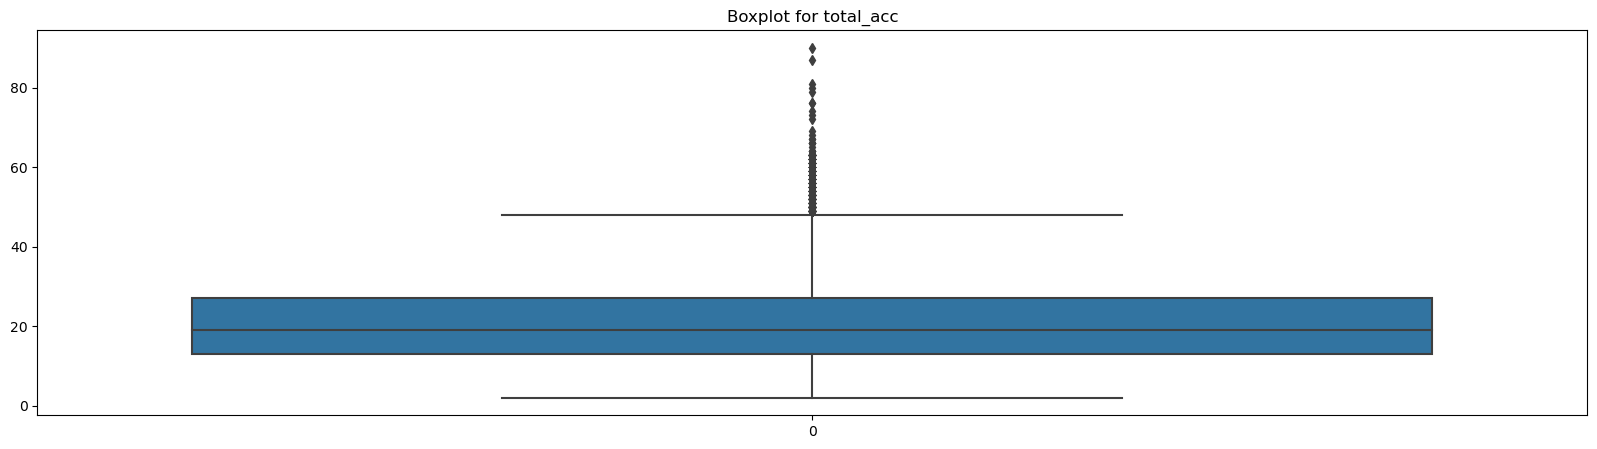

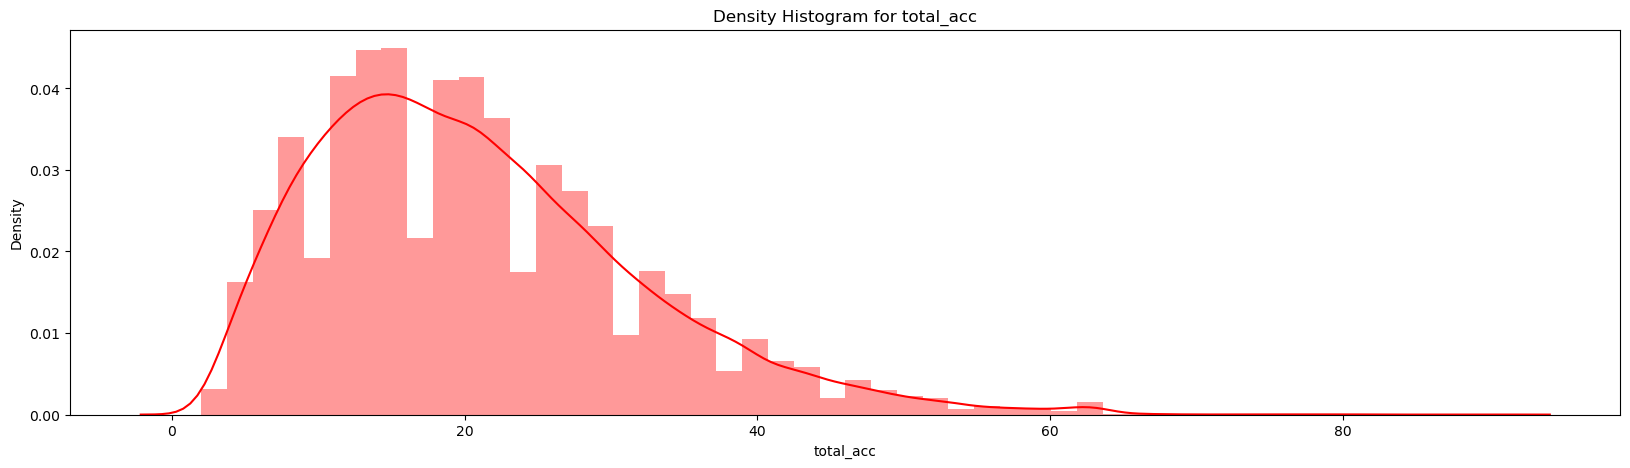

count    32565.000000
mean        20.828988
std         10.957297
min          2.000000
25%         13.000000
50%         19.000000
75%         27.000000
max         90.000000
Name: total_acc, dtype: float64


In [4460]:
create_boxplot_and_distplot('total_acc')
# create_countplot('total_acc')

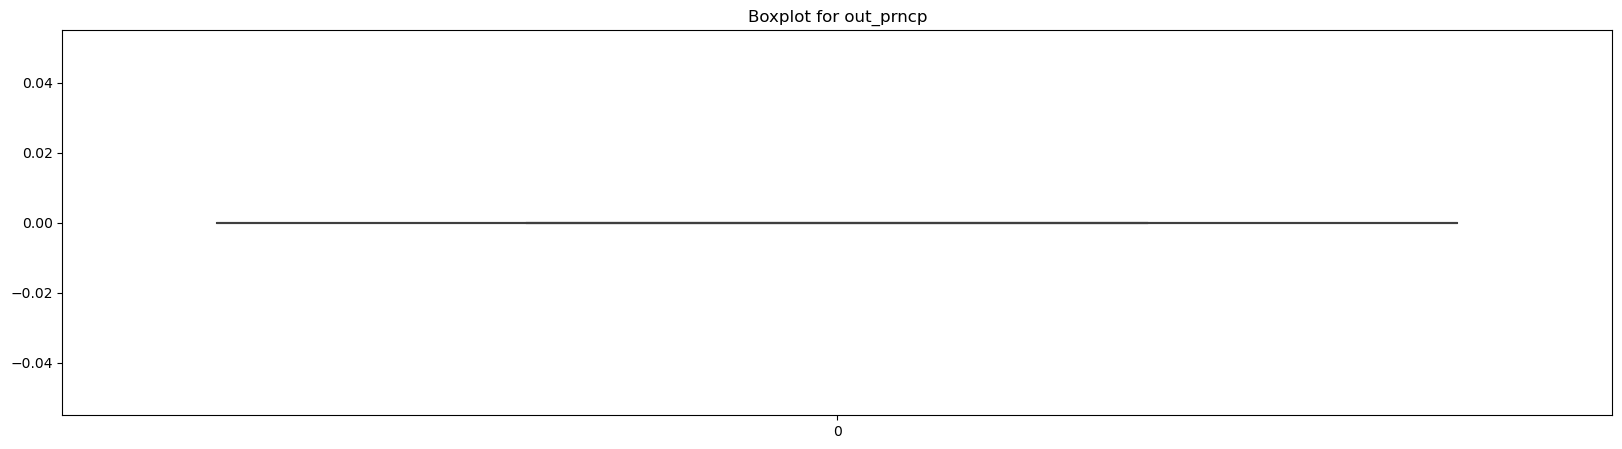

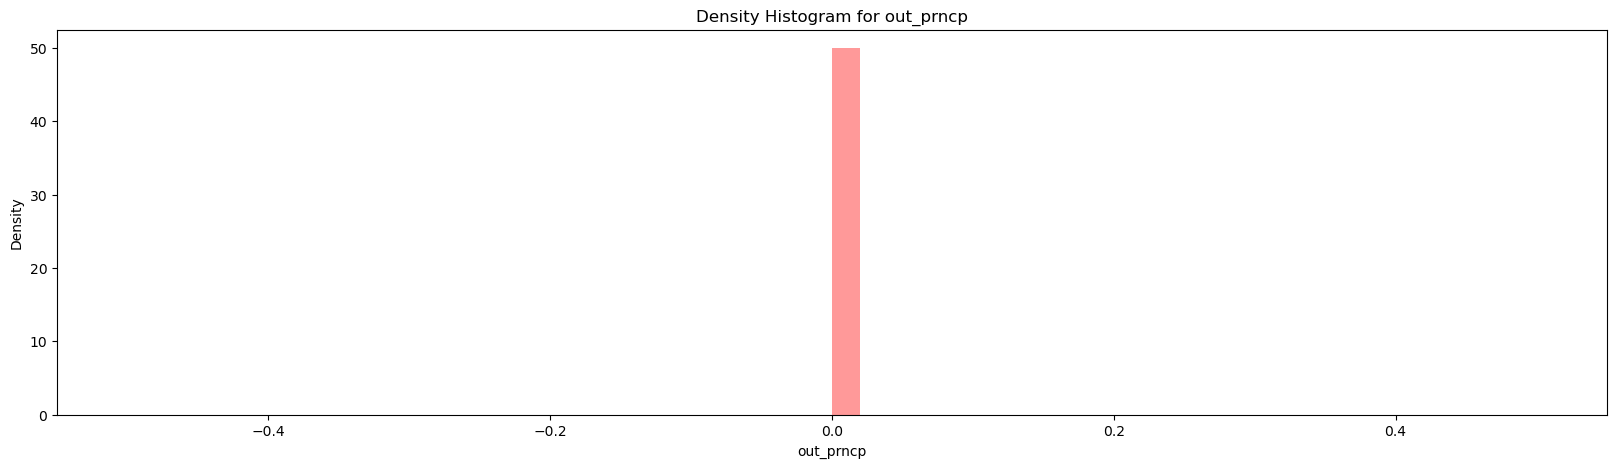

count    32565.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64


In [4461]:
create_boxplot_and_distplot('out_prncp')

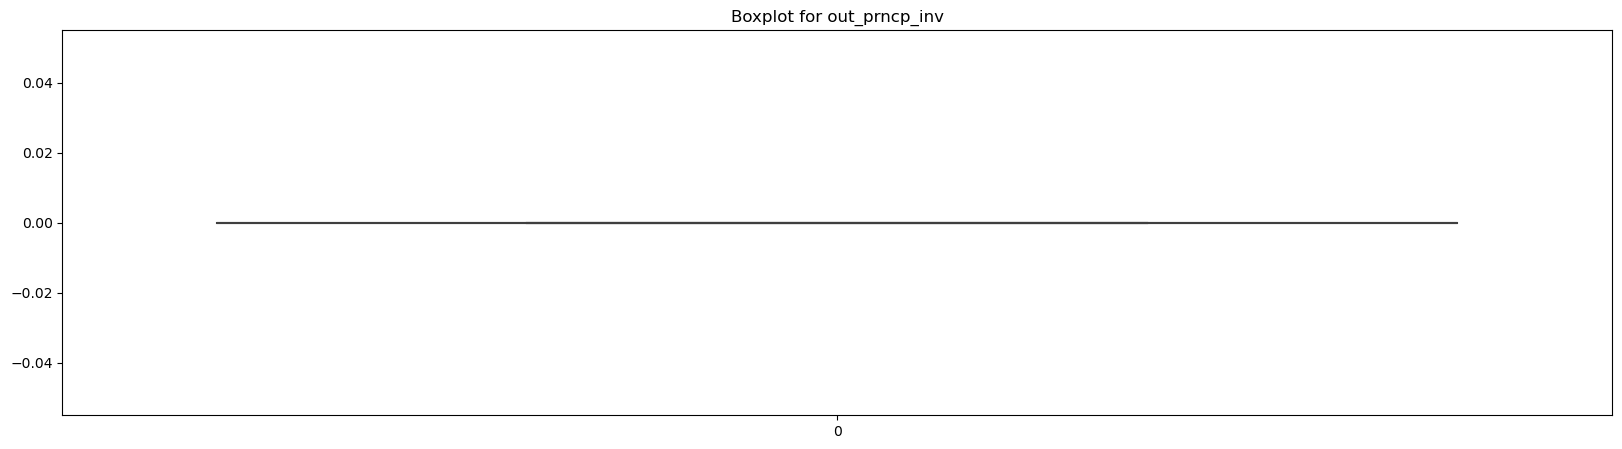

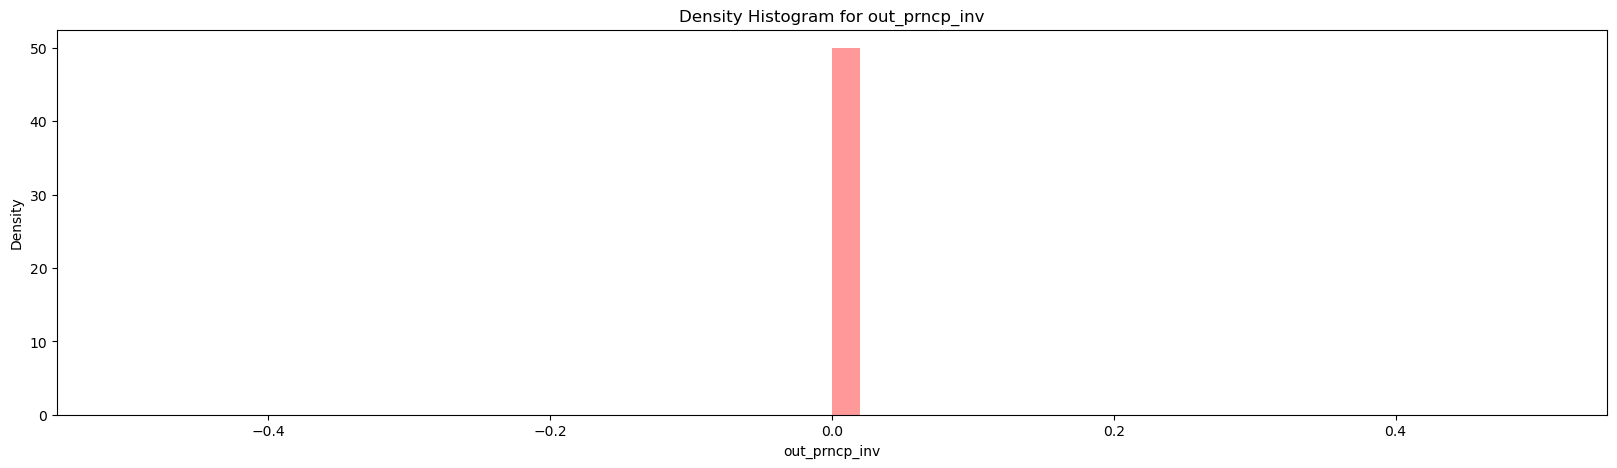

count    32565.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64


In [4462]:

create_boxplot_and_distplot('out_prncp_inv')

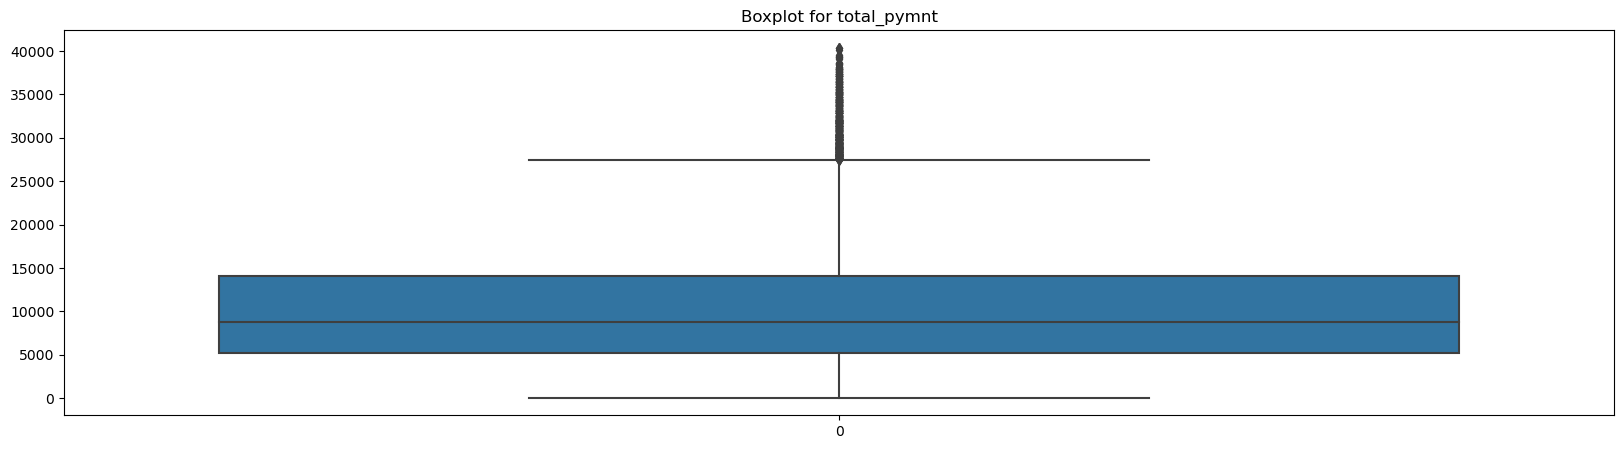

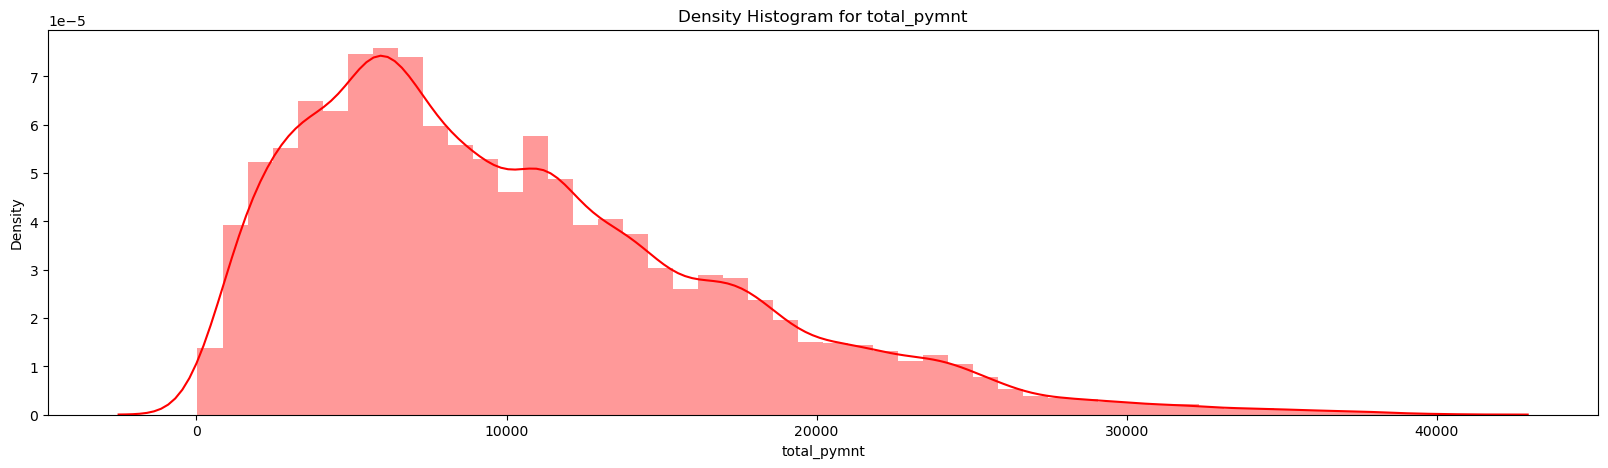

count    32565.000000
mean     10241.888884
std       6774.266491
min         33.730000
25%       5166.000393
50%       8781.460000
75%      14097.340000
max      40385.930000
Name: total_pymnt, dtype: float64


In [4463]:
create_boxplot_and_distplot('total_pymnt')

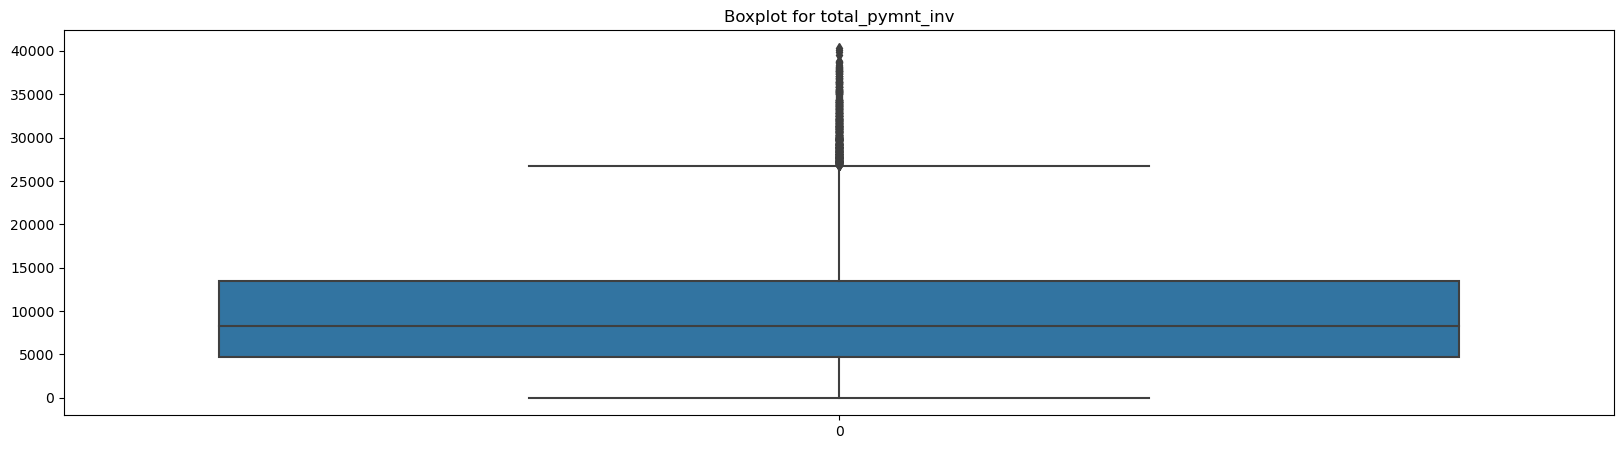

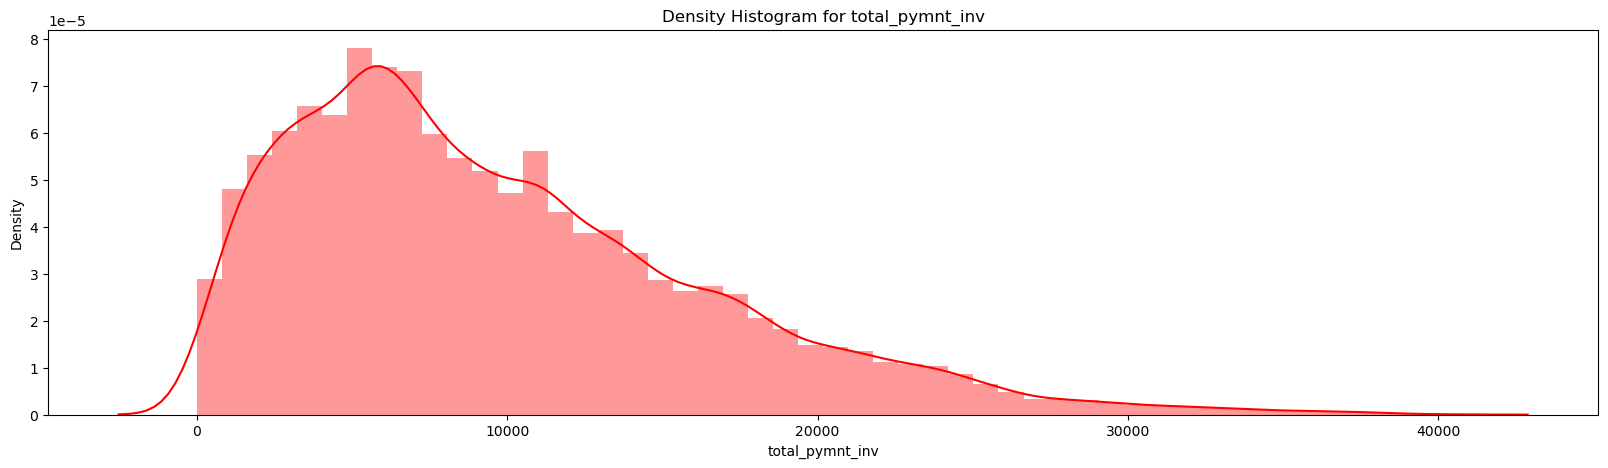

count    32565.000000
mean      9741.309865
std       6725.165463
min          0.000000
25%       4690.860000
50%       8252.870000
75%      13517.360000
max      40358.990000
Name: total_pymnt_inv, dtype: float64


In [4464]:
create_boxplot_and_distplot('total_pymnt_inv')

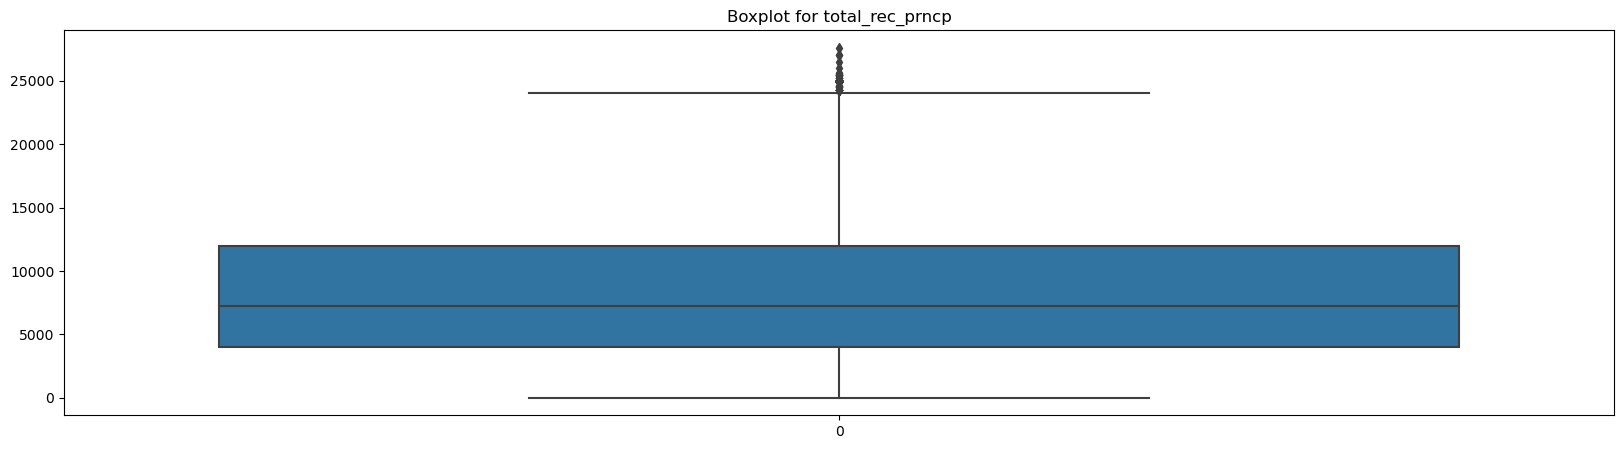

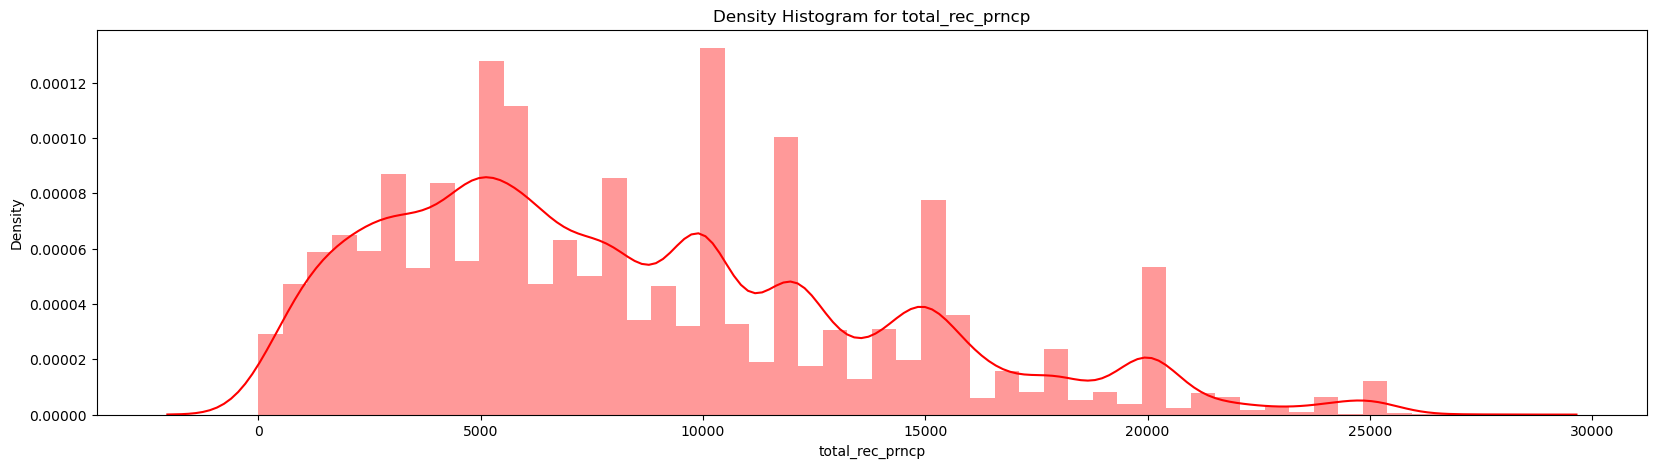

count    32565.000000
mean      8399.300516
std       5454.655862
min          0.000000
25%       4000.000000
50%       7239.290000
75%      12000.000000
max      27600.000000
Name: total_rec_prncp, dtype: float64


In [4465]:
create_boxplot_and_distplot('total_rec_prncp')

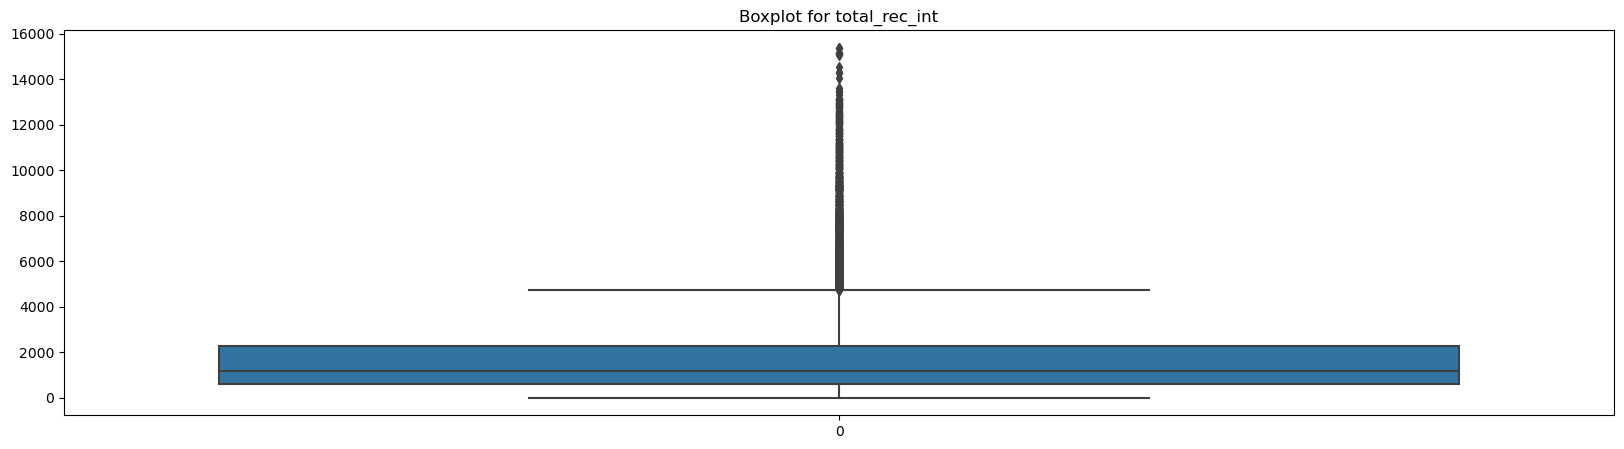

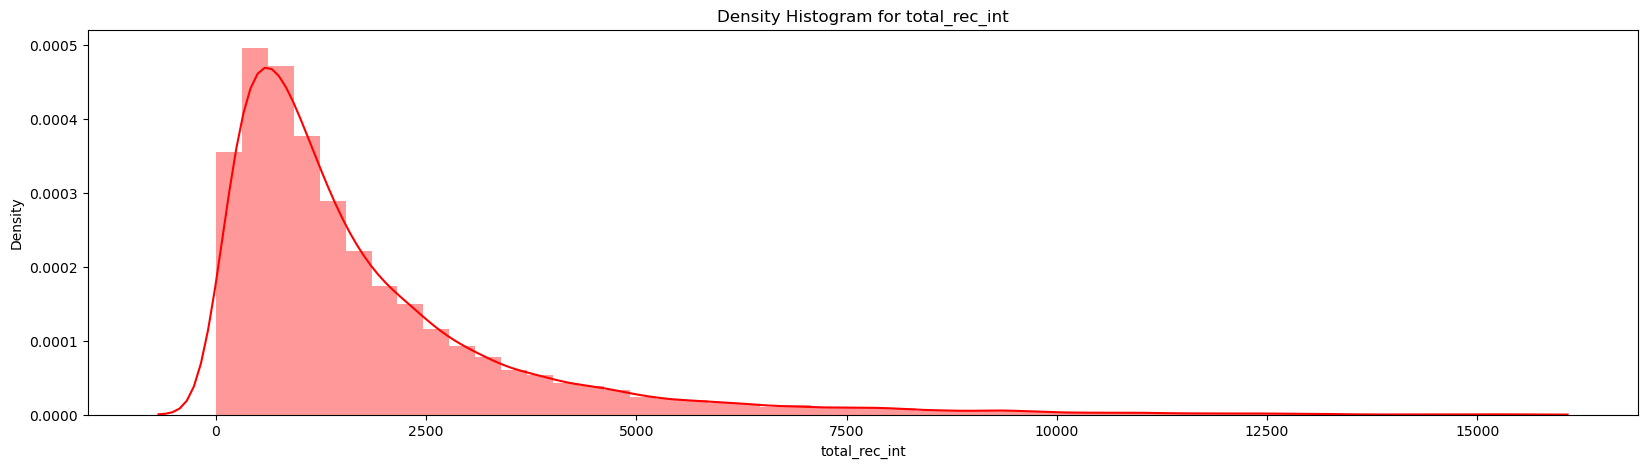

count    32565.000000
mean      1765.916823
std       1833.926343
min          6.220000
25%        596.190000
50%       1167.620000
75%       2261.750000
max      15385.930000
Name: total_rec_int, dtype: float64


In [4466]:
create_boxplot_and_distplot('total_rec_int')

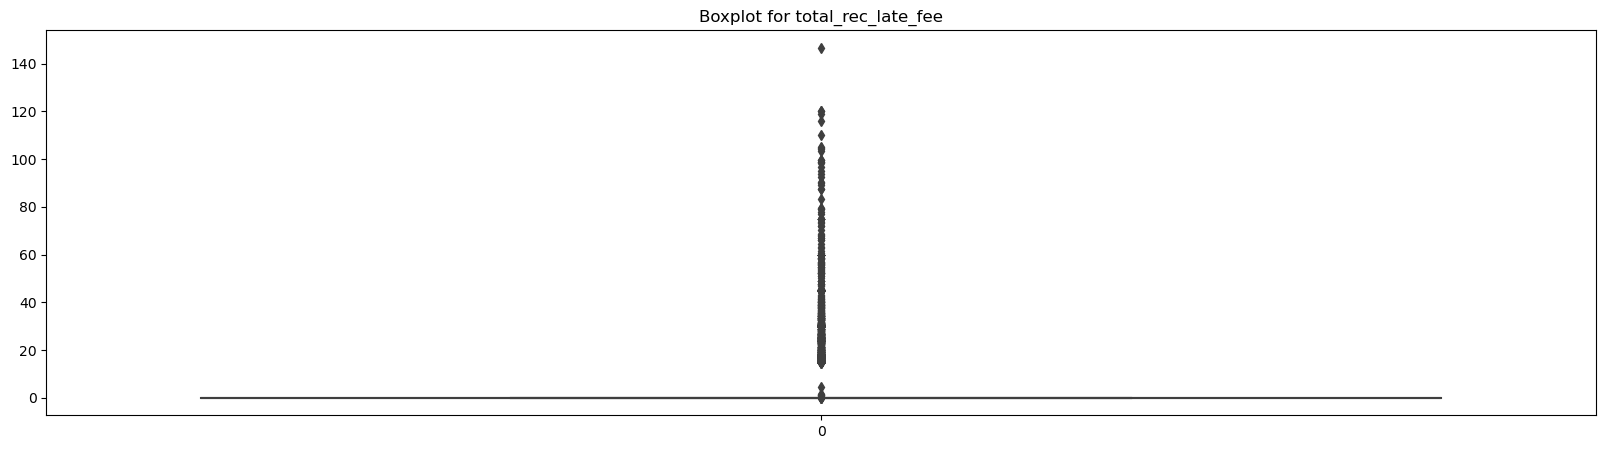

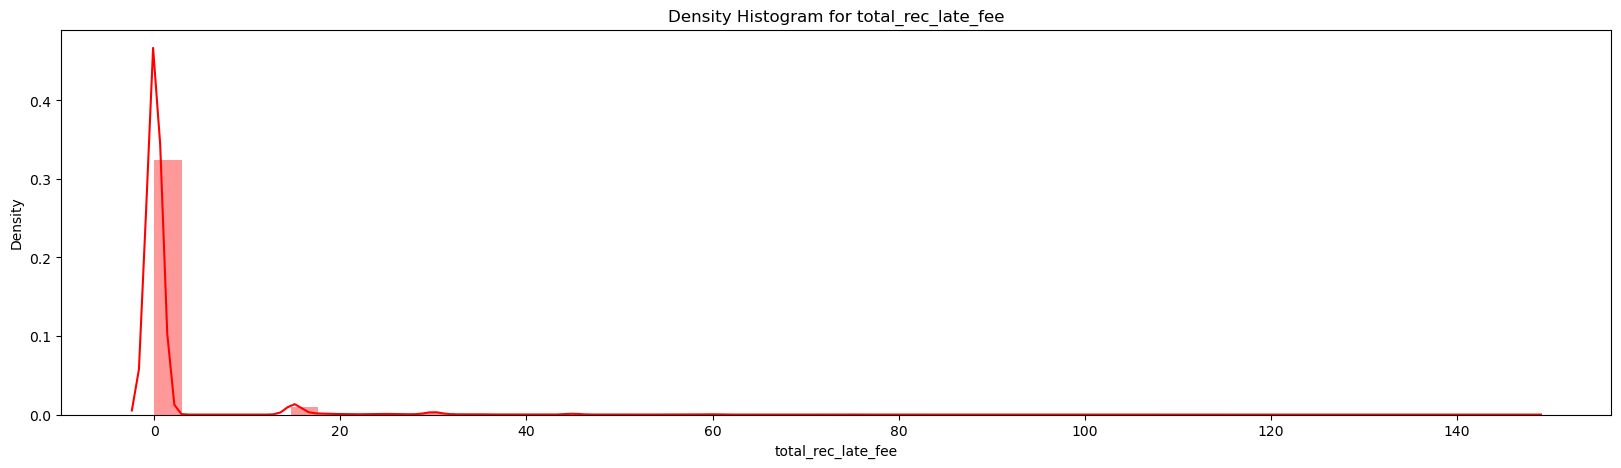

count    32565.000000
mean         1.235493
std          6.404709
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        146.600000
Name: total_rec_late_fee, dtype: float64


In [4467]:
create_boxplot_and_distplot('total_rec_late_fee')

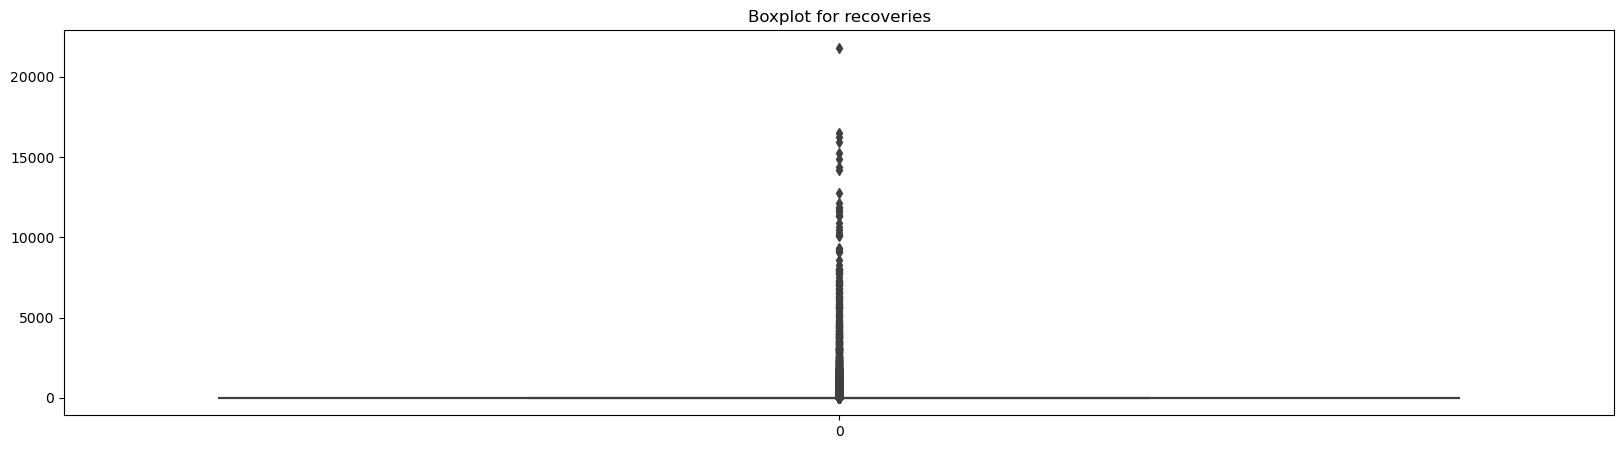

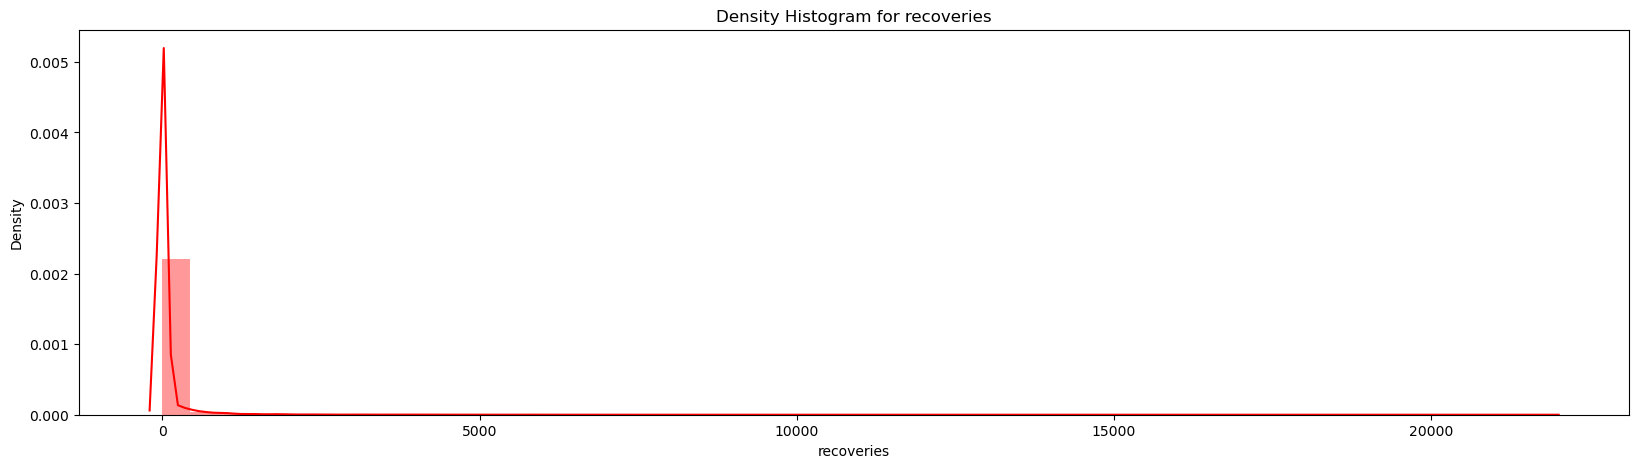

count    32565.000000
mean        75.436130
std        532.402988
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      21810.310000
Name: recoveries, dtype: float64


In [4468]:
create_boxplot_and_distplot('recoveries')

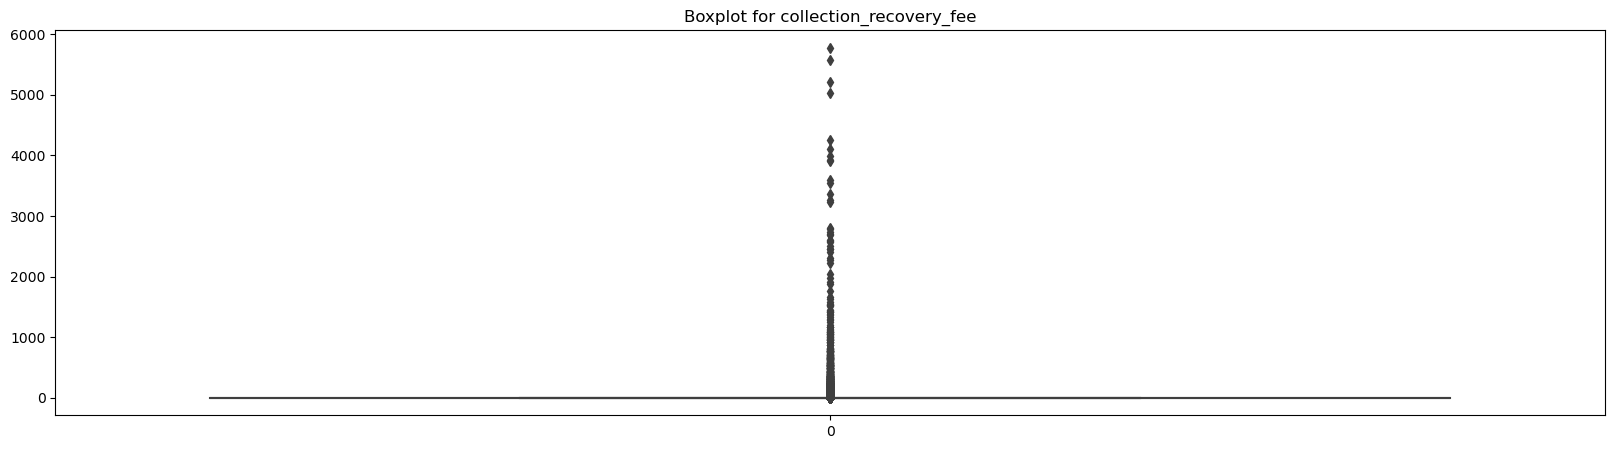

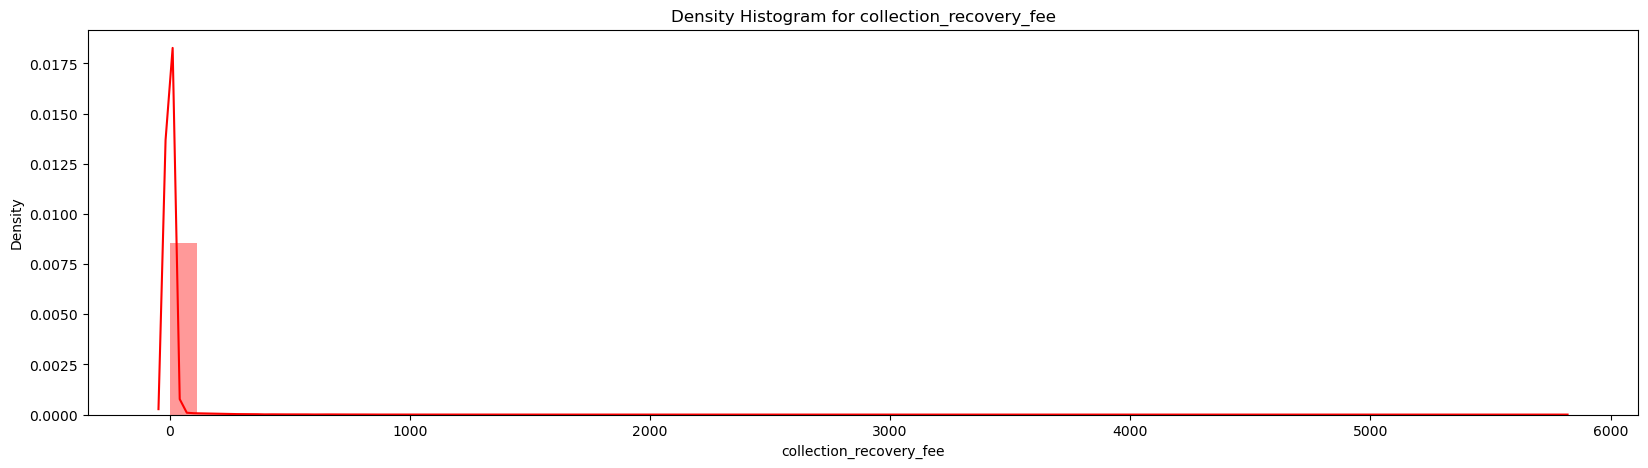

count    32565.000000
mean         9.897503
std        123.241355
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       5774.800000
Name: collection_recovery_fee, dtype: float64


In [4469]:
create_boxplot_and_distplot('collection_recovery_fee')

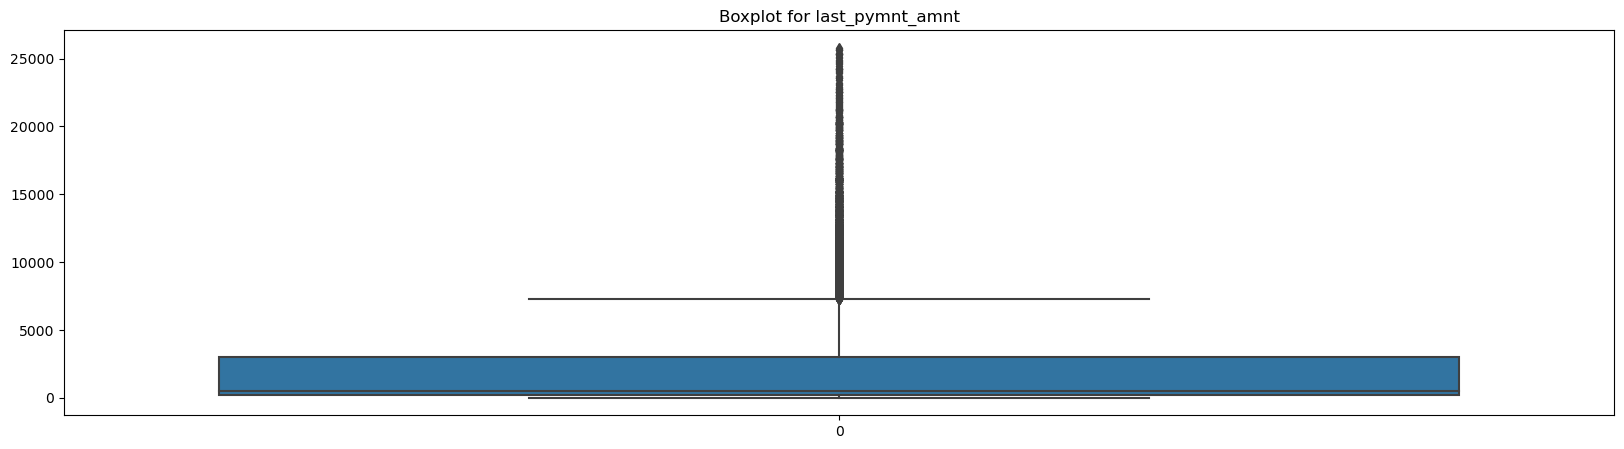

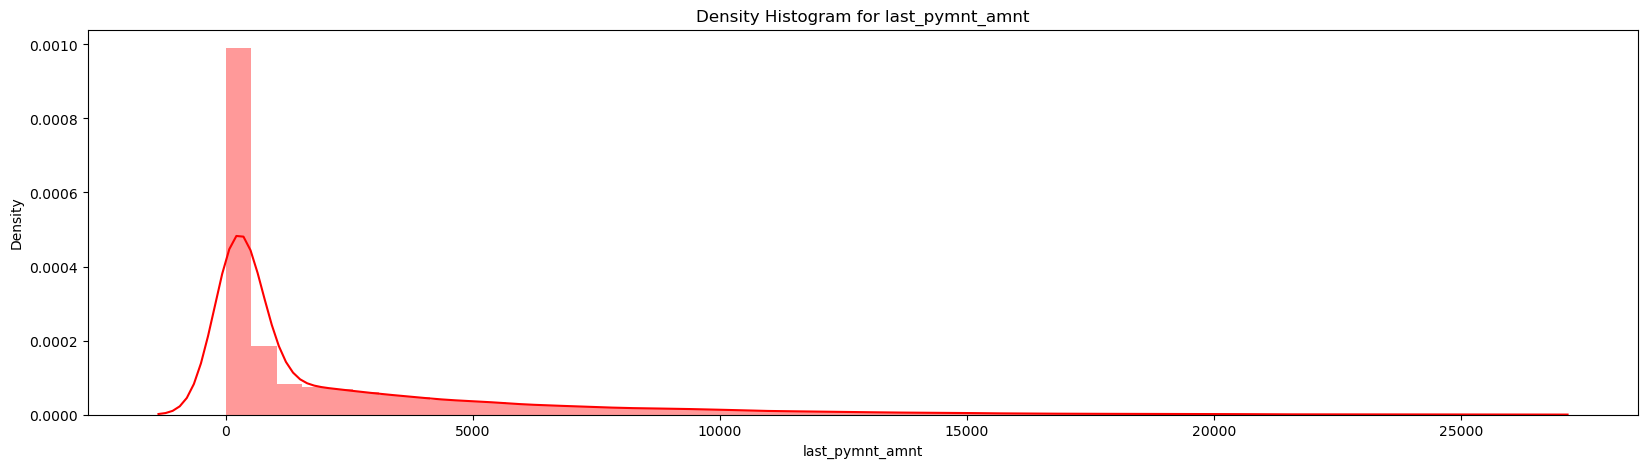

count    32565.000000
mean      2311.837046
std       3616.866681
min          0.000000
25%        203.370000
50%        492.430000
75%       3037.160000
max      25803.080000
Name: last_pymnt_amnt, dtype: float64


In [4470]:
create_boxplot_and_distplot('last_pymnt_amnt')

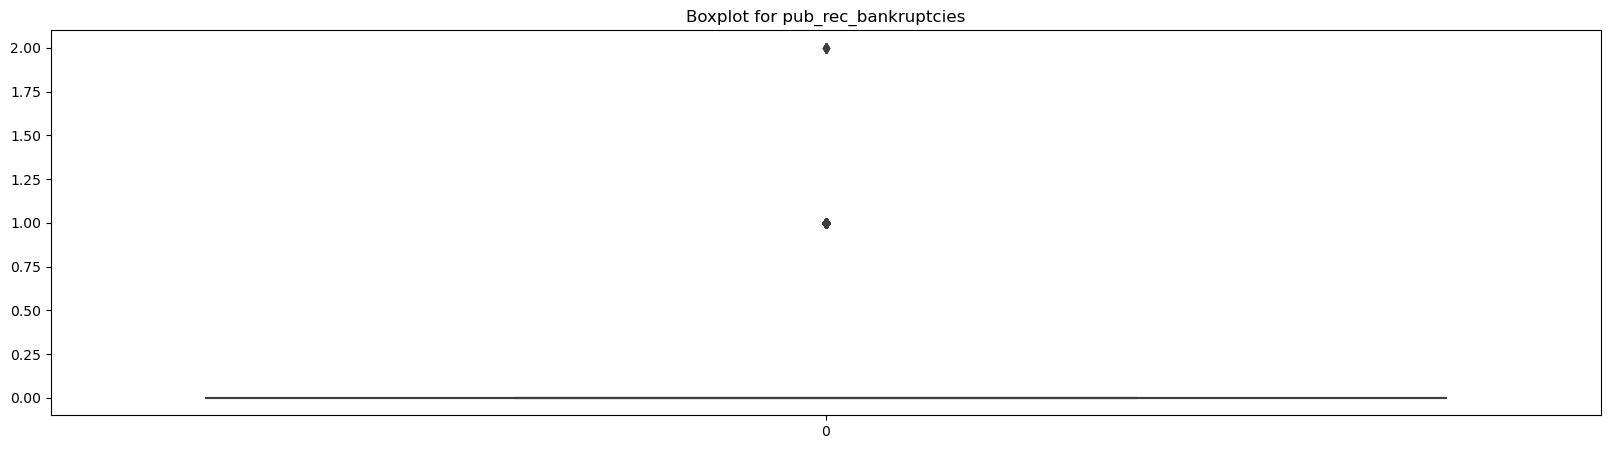

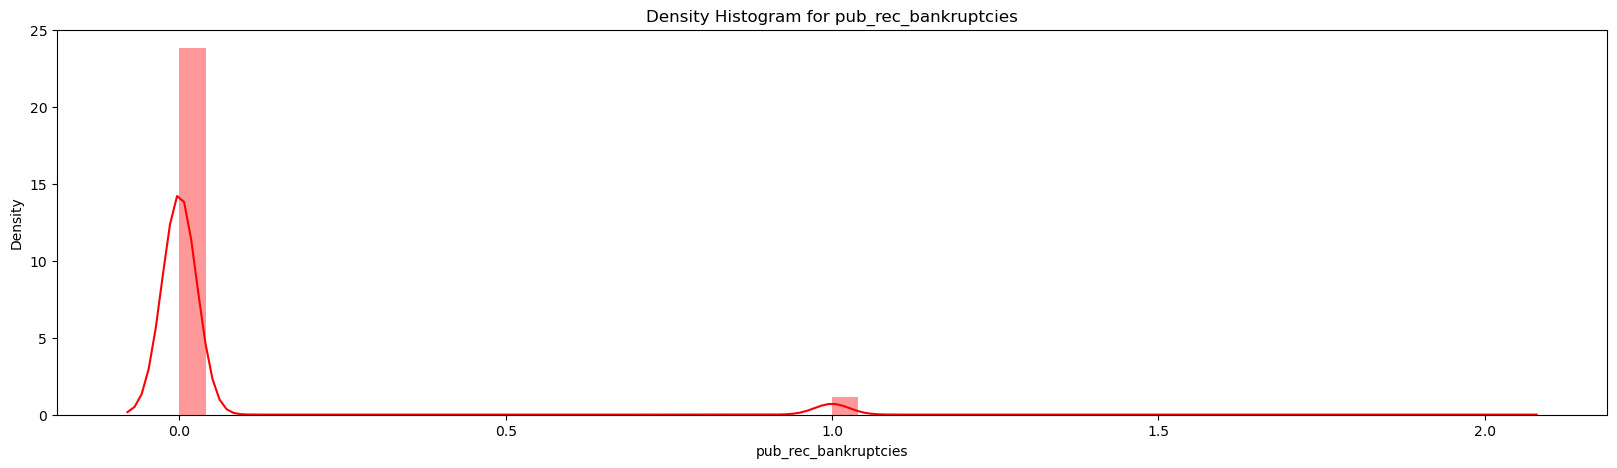

count    32565.000000
mean         0.046799
std          0.211936
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64


In [4471]:
create_boxplot_and_distplot('pub_rec_bankruptcies')


In [4472]:
df.emp_length.value_counts()

10+ years    7373
< 1 year     3996
2 years      3781
3 years      3519
4 years      2898
1 year       2785
5 years      2742
6 years      1844
7 years      1452
8 years      1167
9 years      1008
Name: emp_length, dtype: int64

#### emp_length : Employment length in years. cleaning up unwanted values from this column

In [4473]:
df.emp_length = df.emp_length.astype(str).apply(lambda x : x.replace("+","").replace(" years","").replace(" year","").replace("< 1","0"))

df['emp_length'] = df['emp_length'].astype(float)

In [4474]:
df.emp_length.value_counts()

10.0    7373
0.0     3996
2.0     3781
3.0     3519
4.0     2898
1.0     2785
5.0     2742
6.0     1844
7.0     1452
8.0     1167
9.0     1008
Name: emp_length, dtype: int64

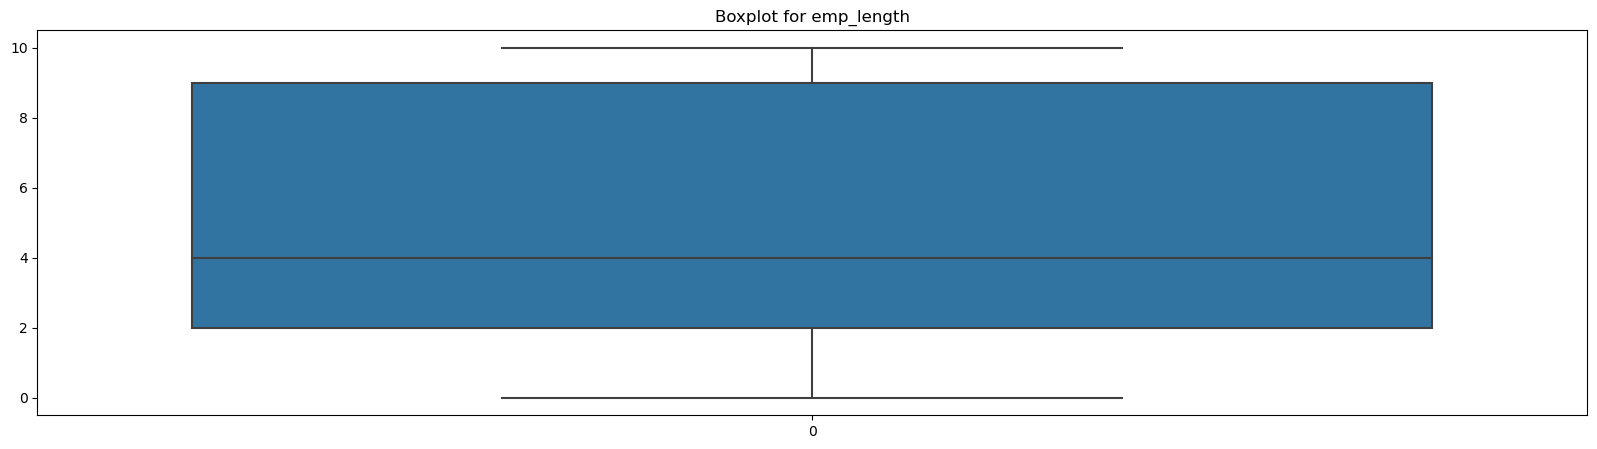

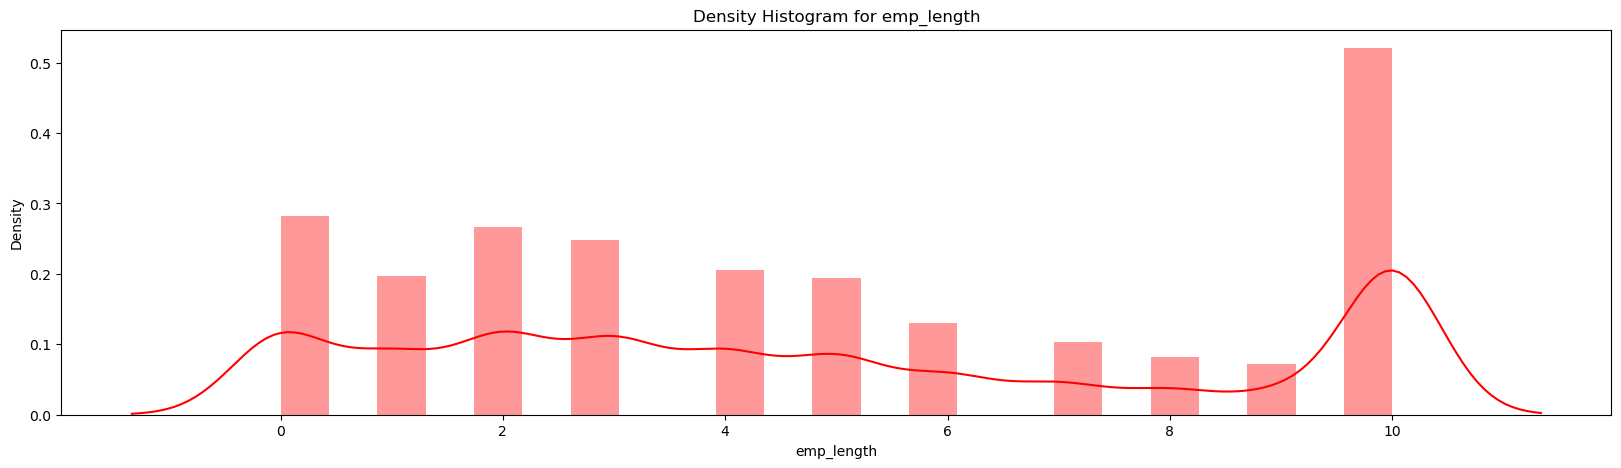

count    32565.000000
mean         4.900107
std          3.564495
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


In [4475]:
create_boxplot_and_distplot('emp_length')

### categorical variables

In [4476]:
cat_variables = ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies']

# Bivariant Analysis 

In [4477]:
# # Columns to be considered with term

# loan_amnt
# emp_length
# grade
# sub grade
# home_ownership
# verification_status
# purpose
# pub_rec_bankruptcies
# issue_d_month
# addr_state
# zip_code

# TODO Analysis
# pub_rec vs pub_rec_bankruptcies
# pub_rec_bankruptcies vs interest
# pub_rec_bankruptcies vs amount
# pub_rec_bankruptcies vs annual income



<Axes: xlabel='offender', ylabel='loan_amnt'>

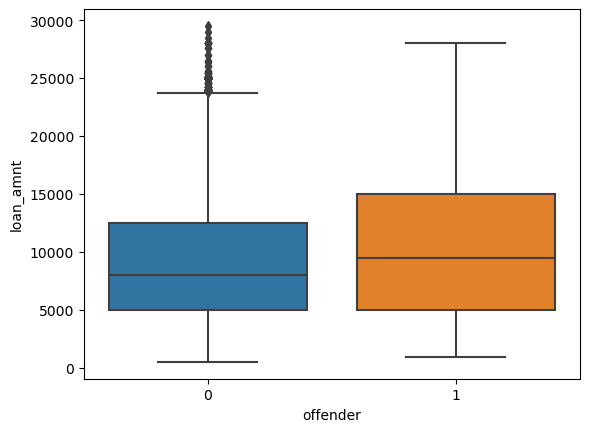

In [4478]:
#Plotting offender vs loan amount

#x=drop_outliers_from_series('offender')

sns.boxplot(x='offender', y='loan_amnt', data=df)


<Axes: xlabel='offender', ylabel='term'>

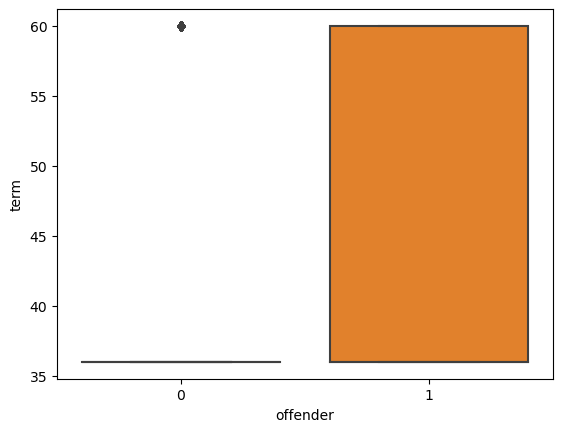

In [4479]:
sns.boxplot(x='offender', y='term', data=df)

<Axes: xlabel='term', ylabel='emp_length'>

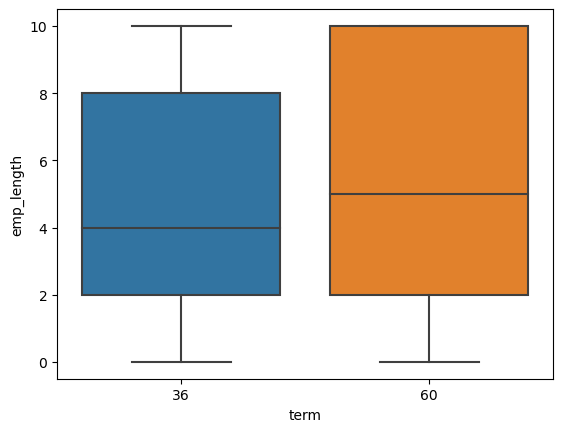

In [4480]:
sns.boxplot(x='term', y='emp_length', data=df)

<Axes: xlabel='term'>

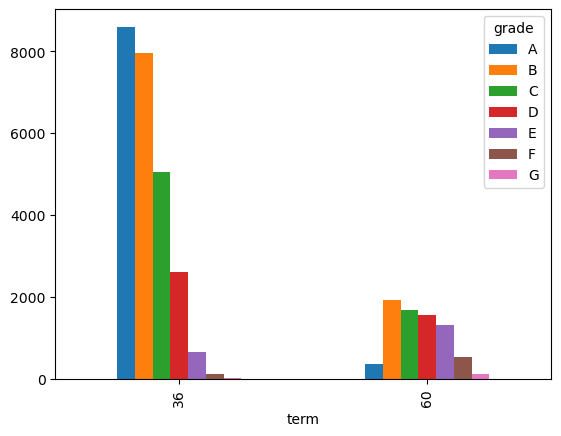

In [4481]:
# sns.boxplot(x='term', y='grade',  data=df)

df.groupby(['term', 'grade']).size().unstack().plot(kind='bar', stacked=False)


<Axes: ylabel='Frequency'>

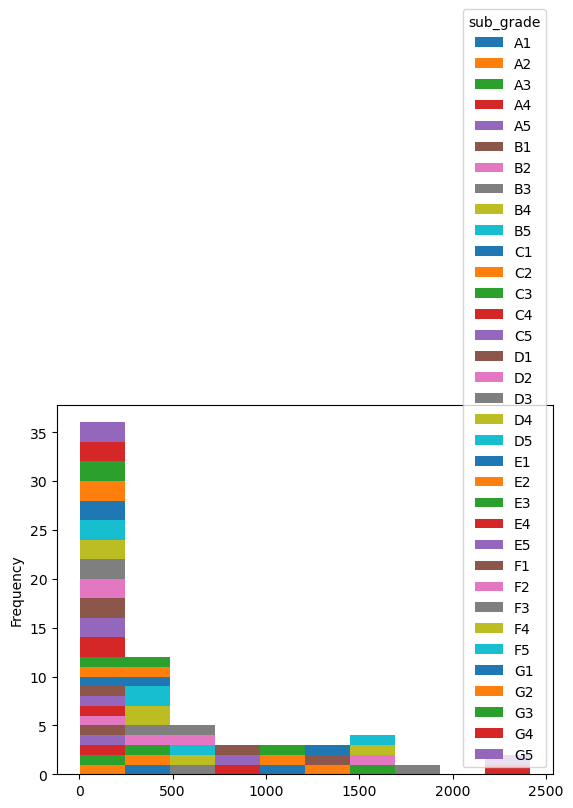

In [4482]:


df.groupby(['term', 'sub_grade']).size().unstack().plot(kind='hist', stacked=True)


<Axes: xlabel='term'>

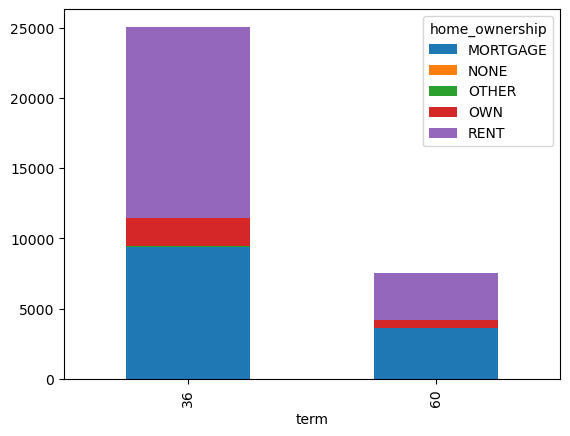

In [4483]:
# sns.boxplot(x='term', y='home_ownership', data=df)

df.groupby(['term', 'home_ownership']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='term'>

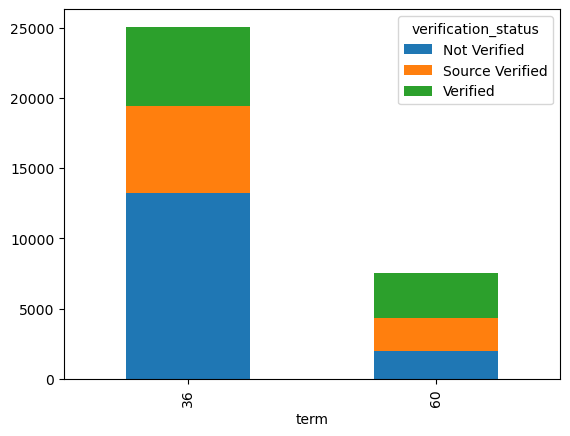

In [4484]:

df.groupby(['term', 'verification_status']).size().unstack().plot(kind='bar', stacked=True)


<Axes: ylabel='Frequency'>

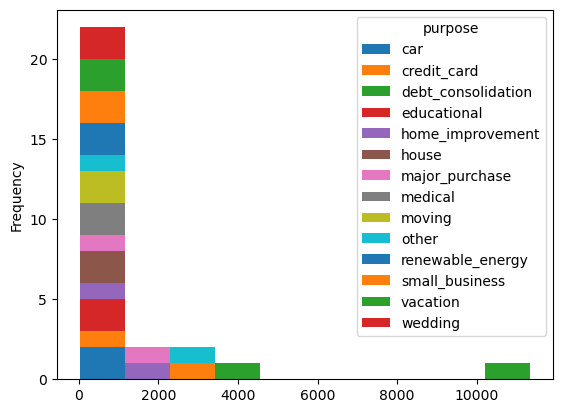

In [4485]:
# Zero bankruptcies are max impact

df.groupby(['term', 'purpose']).size().unstack().plot(kind='hist', stacked=True)



<Axes: xlabel='term'>

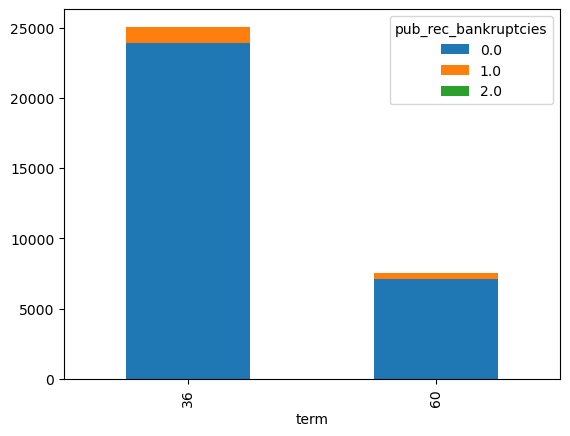

In [4486]:
# Zero bankruptcies are max impact

df.groupby(['term', 'pub_rec_bankruptcies']).size().unstack().plot(kind='bar', stacked=True)


<Axes: xlabel='term'>

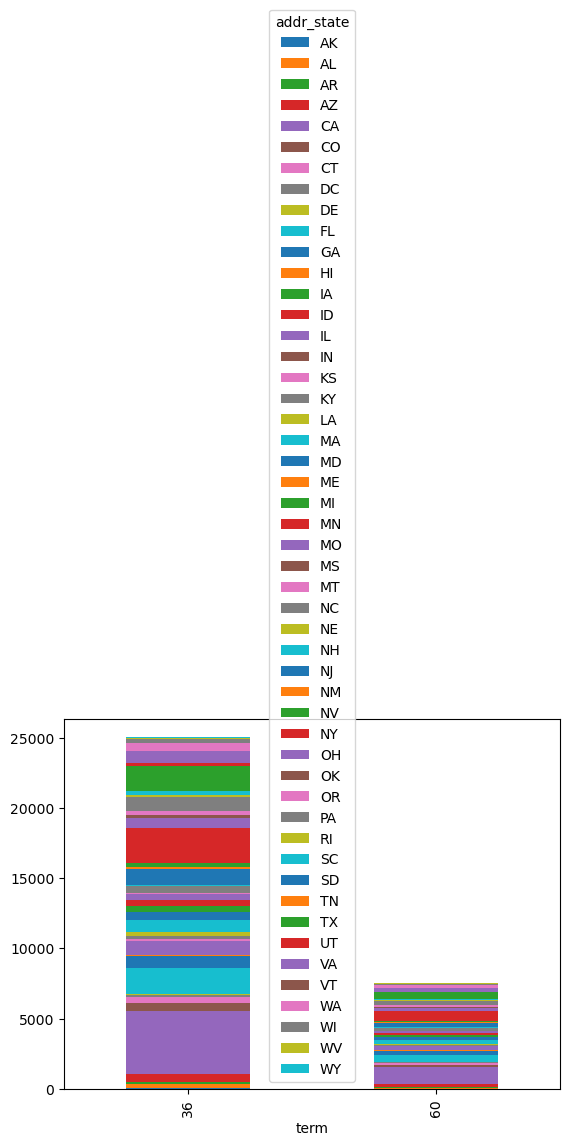

In [4487]:
# Zip code has no impcat

df.groupby(['term', 'addr_state']).size().unstack().plot(kind='bar', stacked=True)




<Axes: >

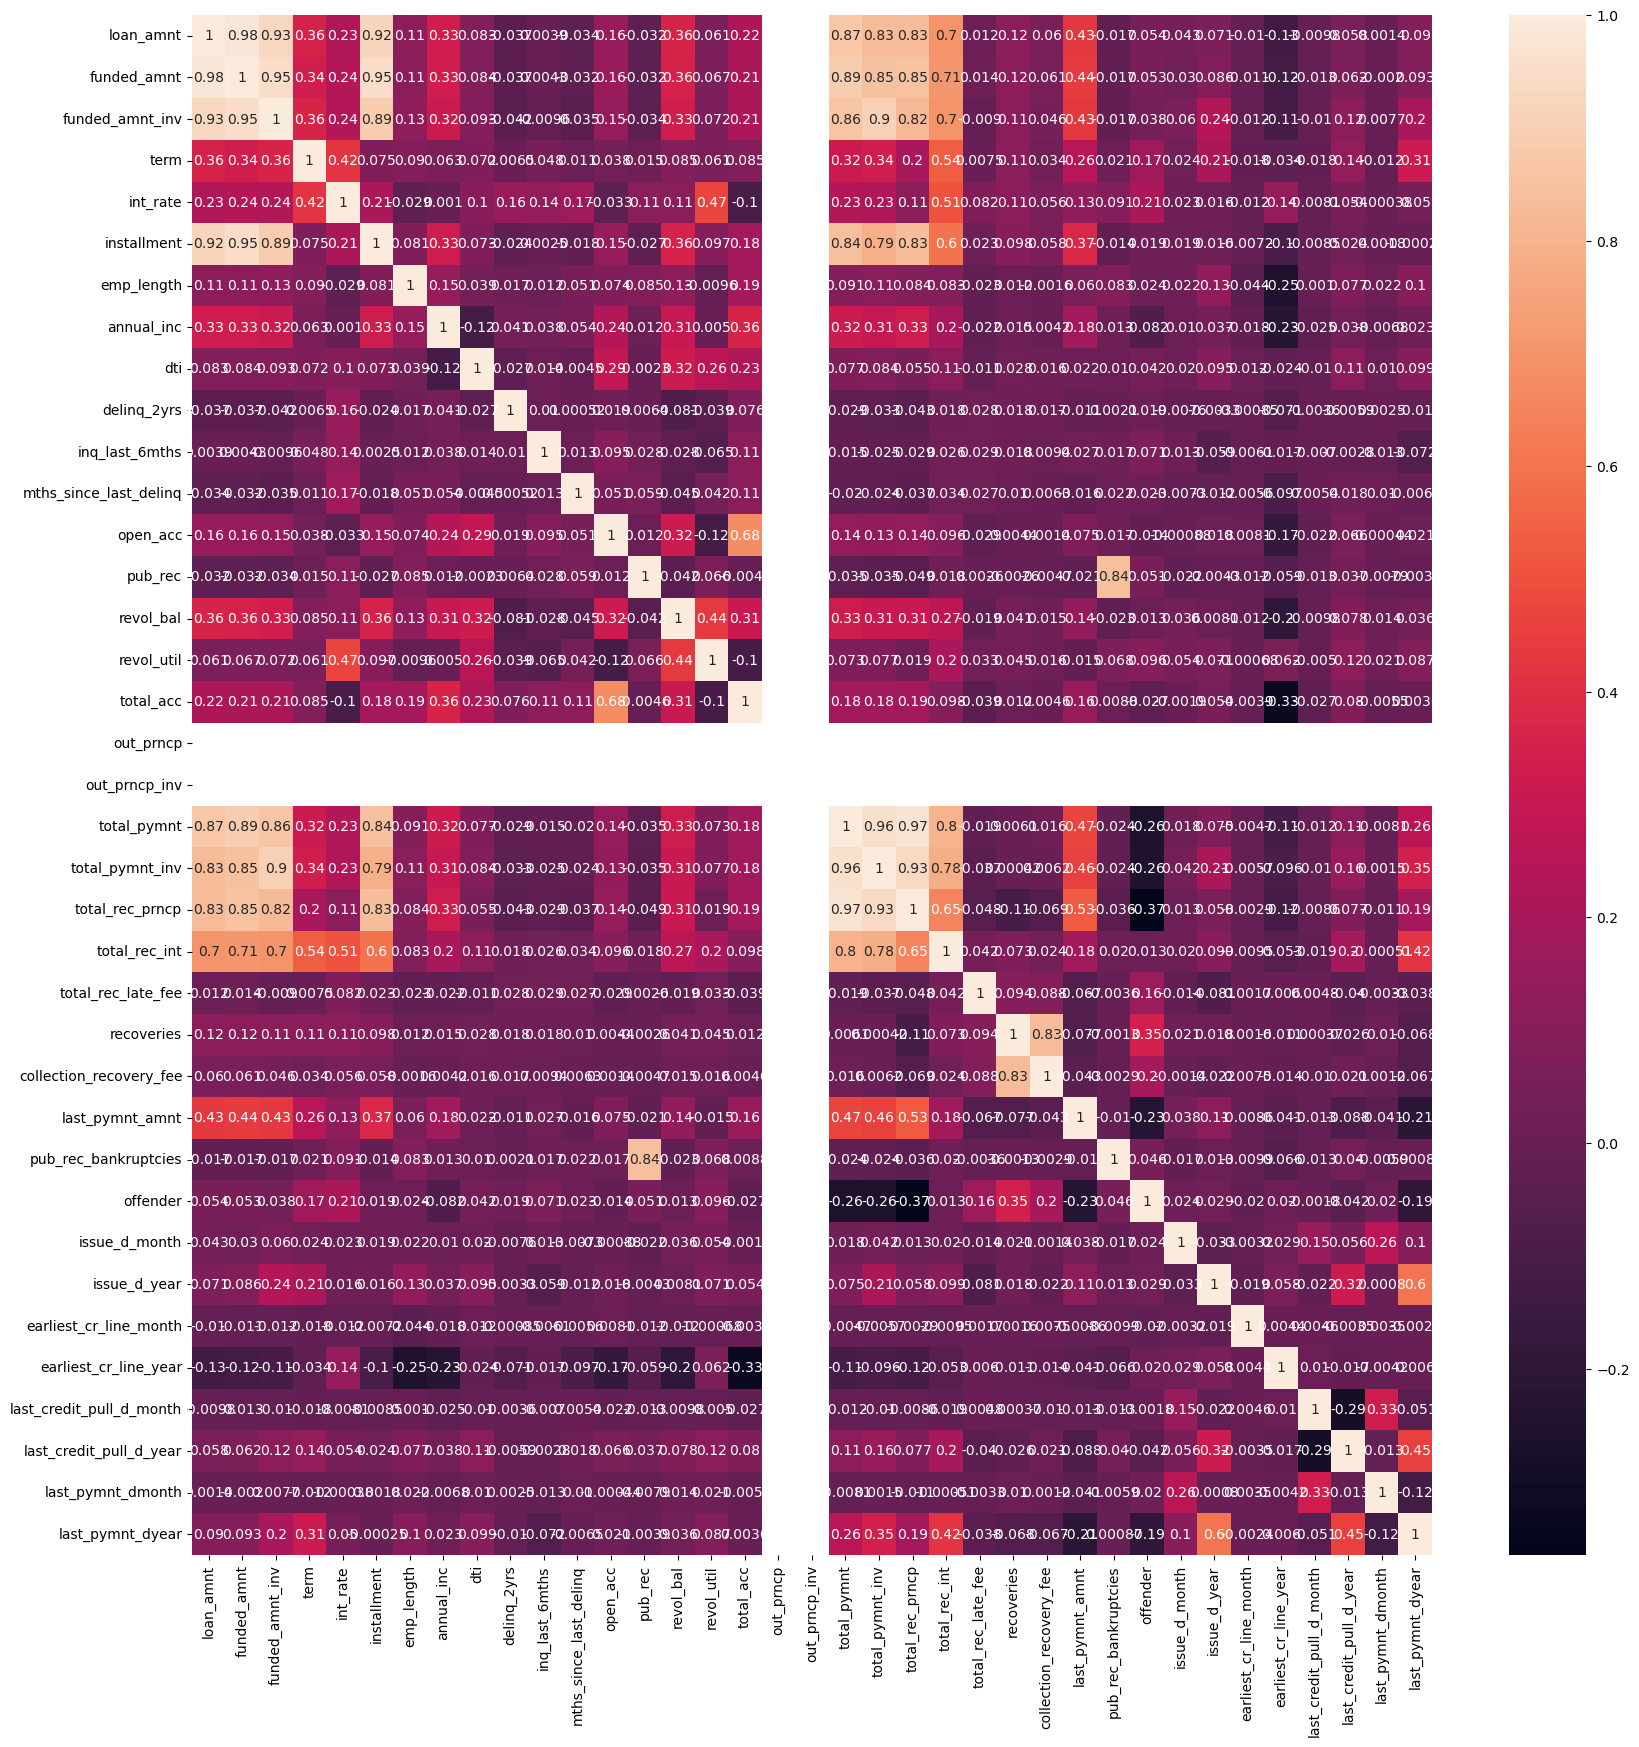

In [4488]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(),annot=True)

In [4489]:
df.corr()

loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt                  1.000000     0.979224         0.926940  0.355998   
funded_amnt                0.979224     1.000000         0.948518  0.338428   
funded_amnt_inv            0.926940     0.948518         1.000000  0.361630   
term                       0.355998     0.338428         0.361630  1.000000   
int_rate                   0.230244     0.239952         0.235095  0.422257   
installment                0.921102     0.949901         0.885479  0.074894   
emp_length                 0.109778     0.110834         0.125876  0.090177   
annual_inc                 0.332413     0.329206         0.315584  0.062788   
dti                        0.083221     0.083835         0.092582  0.072064   
delinq_2yrs               -0.036950    -0.037196        -0.041794  0.006491   
inq_last_6mths             0.003893     0.004318        -0.009644  0.047726   
mths_since_last_delinq    -0.033866    -0.031928        -0.035408  0.010683   
open_acc                   0.156918     0.155553         0.145086  0.038494   
pub_rec                   -0.031845    -0.031593        -0.033779  0.014742   
revol_bal                  0.361427     0.357959         0.333501  0.085422   
revol_util                 0.060631     0.066999         0.071906  0.061172   
total_acc                  0.216222     0.210857         0.207390  0.084983   
out_prncp                       NaN          NaN              NaN       NaN   
out_prncp_inv                   NaN          NaN              NaN       NaN   
total_pymnt                0.870058     0.889208         0.856930  0.316252   
total_pymnt_inv            0.828851     0.848645         0.899328  0.336746   
total_rec_prncp            0.833997     0.853790         0.818803  0.201059   
total_rec_int              0.698580     0.710415         0.698839  0.539310   
total_rec_late_fee         0.012101     0.014482        -0.008967  0.007523   
recoveries                 0.119488     0.119579         0.107482  0.106245   
collection_recovery_fee    0.059725     0.060684         0.045770  0.034443   
last_pymnt_amnt            0.434057     0.440783         0.430861  0.257071   
pub_rec_bankruptcies      -0.016648    -0.016550        -0.017437  0.020655   
offender                   0.054350     0.052701         0.037633  0.172320   
issue_d_month              0.042962     0.030422         0.059540  0.024495   
issue_d_year               0.070927     0.086251         0.238514  0.211755   
earliest_cr_line_month    -0.010438    -0.010728        -0.011550 -0.018044   
earliest_cr_line_year     -0.129964    -0.122964        -0.105509 -0.034478   
last_credit_pull_d_month  -0.009832    -0.012970        -0.010101 -0.018375   
last_credit_pull_d_year    0.057570     0.061704         0.118569  0.139344   
last_pymnt_dmonth          0.001441    -0.001973         0.007681 -0.012440   
last_pymnt_dyear           0.090369     0.093127         0.202993  0.312651   

                          int_rate  installment  emp_length  annual_inc  \
loan_amnt                 0.230244     0.921102    0.109778    0.332413   
funded_amnt               0.239952     0.949901    0.110834    0.329206   
funded_amnt_inv           0.235095     0.885479    0.125876    0.315584   
term                      0.422257     0.074894    0.090177    0.062788   
int_rate                  1.000000     0.210969   -0.029323    0.001003   
installment               0.210969     1.000000    0.081201    0.326572   
emp_length               -0.029323     0.081201    1.000000    0.146986   
annual_inc                0.001003     0.326572    0.146986    1.000000   
dti                       0.100567     0.072505    0.039417   -0.118121   
delinq_2yrs               0.156700    -0.024256    0.016552    0.041168   
inq_last_6mths            0.137877     0.002485    0.011654    0.038441   
mths_since_last_delinq    0.170246    -0.017884    0.050737    0.054100   
open_acc                 -0.033348     0.150247 

In [4490]:
corr_mat_table = ['loan_amnt',  'funded_amnt', 'funded_amnt_inv',   'term', 'int_rate',   'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',    'open_acc',   'pub_rec',    'revol_bal',  'revol_util',            'total_acc',  'out_prncp',  'out_prncp_inv',     'total_pymnt', 'total_pymnt_inv',   'total_rec_prncp',   'total_rec_int',     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',   'pub_rec_bankruptcies']

In [4491]:
df[corr_mat_table].corr()

loan_amnt  funded_amnt  funded_amnt_inv      term  \
loan_amnt                 1.000000     0.979224         0.926940  0.355998   
funded_amnt               0.979224     1.000000         0.948518  0.338428   
funded_amnt_inv           0.926940     0.948518         1.000000  0.361630   
term                      0.355998     0.338428         0.361630  1.000000   
int_rate                  0.230244     0.239952         0.235095  0.422257   
installment               0.921102     0.949901         0.885479  0.074894   
annual_inc                0.332413     0.329206         0.315584  0.062788   
dti                       0.083221     0.083835         0.092582  0.072064   
delinq_2yrs              -0.036950    -0.037196        -0.041794  0.006491   
inq_last_6mths            0.003893     0.004318        -0.009644  0.047726   
open_acc                  0.156918     0.155553         0.145086  0.038494   
pub_rec                  -0.031845    -0.031593        -0.033779  0.014742   
revol_bal                 0.361427     0.357959         0.333501  0.085422   
revol_util                0.060631     0.066999         0.071906  0.061172   
total_acc                 0.216222     0.210857         0.207390  0.084983   
out_prncp                      NaN          NaN              NaN       NaN   
out_prncp_inv                  NaN          NaN              NaN       NaN   
total_pymnt               0.870058     0.889208         0.856930  0.316252   
total_pymnt_inv           0.828851     0.848645         0.899328  0.336746   
total_rec_prncp           0.833997     0.853790         0.818803  0.201059   
total_rec_int             0.698580     0.710415         0.698839  0.539310   
total_rec_late_fee        0.012101     0.014482        -0.008967  0.007523   
recoveries                0.119488     0.119579         0.107482  0.106245   
collection_recovery_fee   0.059725     0.060684         0.045770  0.034443   
last_pymnt_amnt           0.434057     0.440783         0.430861  0.257071   
pub_rec_bankruptcies     -0.016648    -0.016550        -0.017437  0.020655   

                         int_rate  installment  annual_inc       dti  \
loan_amnt                0.230244     0.921102    0.332413  0.083221   
funded_amnt              0.239952     0.949901    0.329206  0.083835   
funded_amnt_inv          0.235095     0.885479    0.315584  0.092582   
term                     0.422257     0.074894    0.062788  0.072064   
int_rate                 1.000000     0.210969    0.001003  0.100567   
installment              0.210969     1.000000    0.326572  0.072505   
annual_inc               0.001003     0.326572    1.000000 -0.118121   
dti                      0.100567     0.072505   -0.118121  1.000000   
delinq_2yrs              0.156700    -0.024256    0.041168 -0.027066   
inq_last_6mths           0.137877     0.002485    0.038441  0.013821   
open_acc                -0.033348     0.150247    0.239022  0.288423   
pub_rec                  0.108158    -0.026862    0.011517 -0.002321   
revol_bal                0.108198     0.359116    0.305081  0.321115   
revol_util               0.470479     0.096891    0.005034  0.260420   
total_acc               -0.100048     0.184053    0.361749  0.230070   
out_prncp                     NaN          NaN         NaN       NaN   
out_prncp_inv                 NaN          NaN         NaN       NaN   
total_pymnt              0.234004     0.841645    0.318480  0.077390   
total_pymnt_inv          0.230509     0.790075    0.306508  0.084476   
total_rec_prncp          0.109454     0.834706    0.325788  0.054842   
total_rec_int            0.505366     0.597830    0.203246  0.114601   
total_rec_late_fee       0.081864     0.022539   -0.021744 -0.010830   
recoveries               0.114279     0.097619    0.014673  0.028203   
collection_recovery_fee  0.056358     0.057925    0.004201  0.015937   
last_pymnt_amnt          0.130435     0.374240    0.182042  0.021685   
pub_rec_bankruptcies     0.091106    -0.013565

<Axes: >

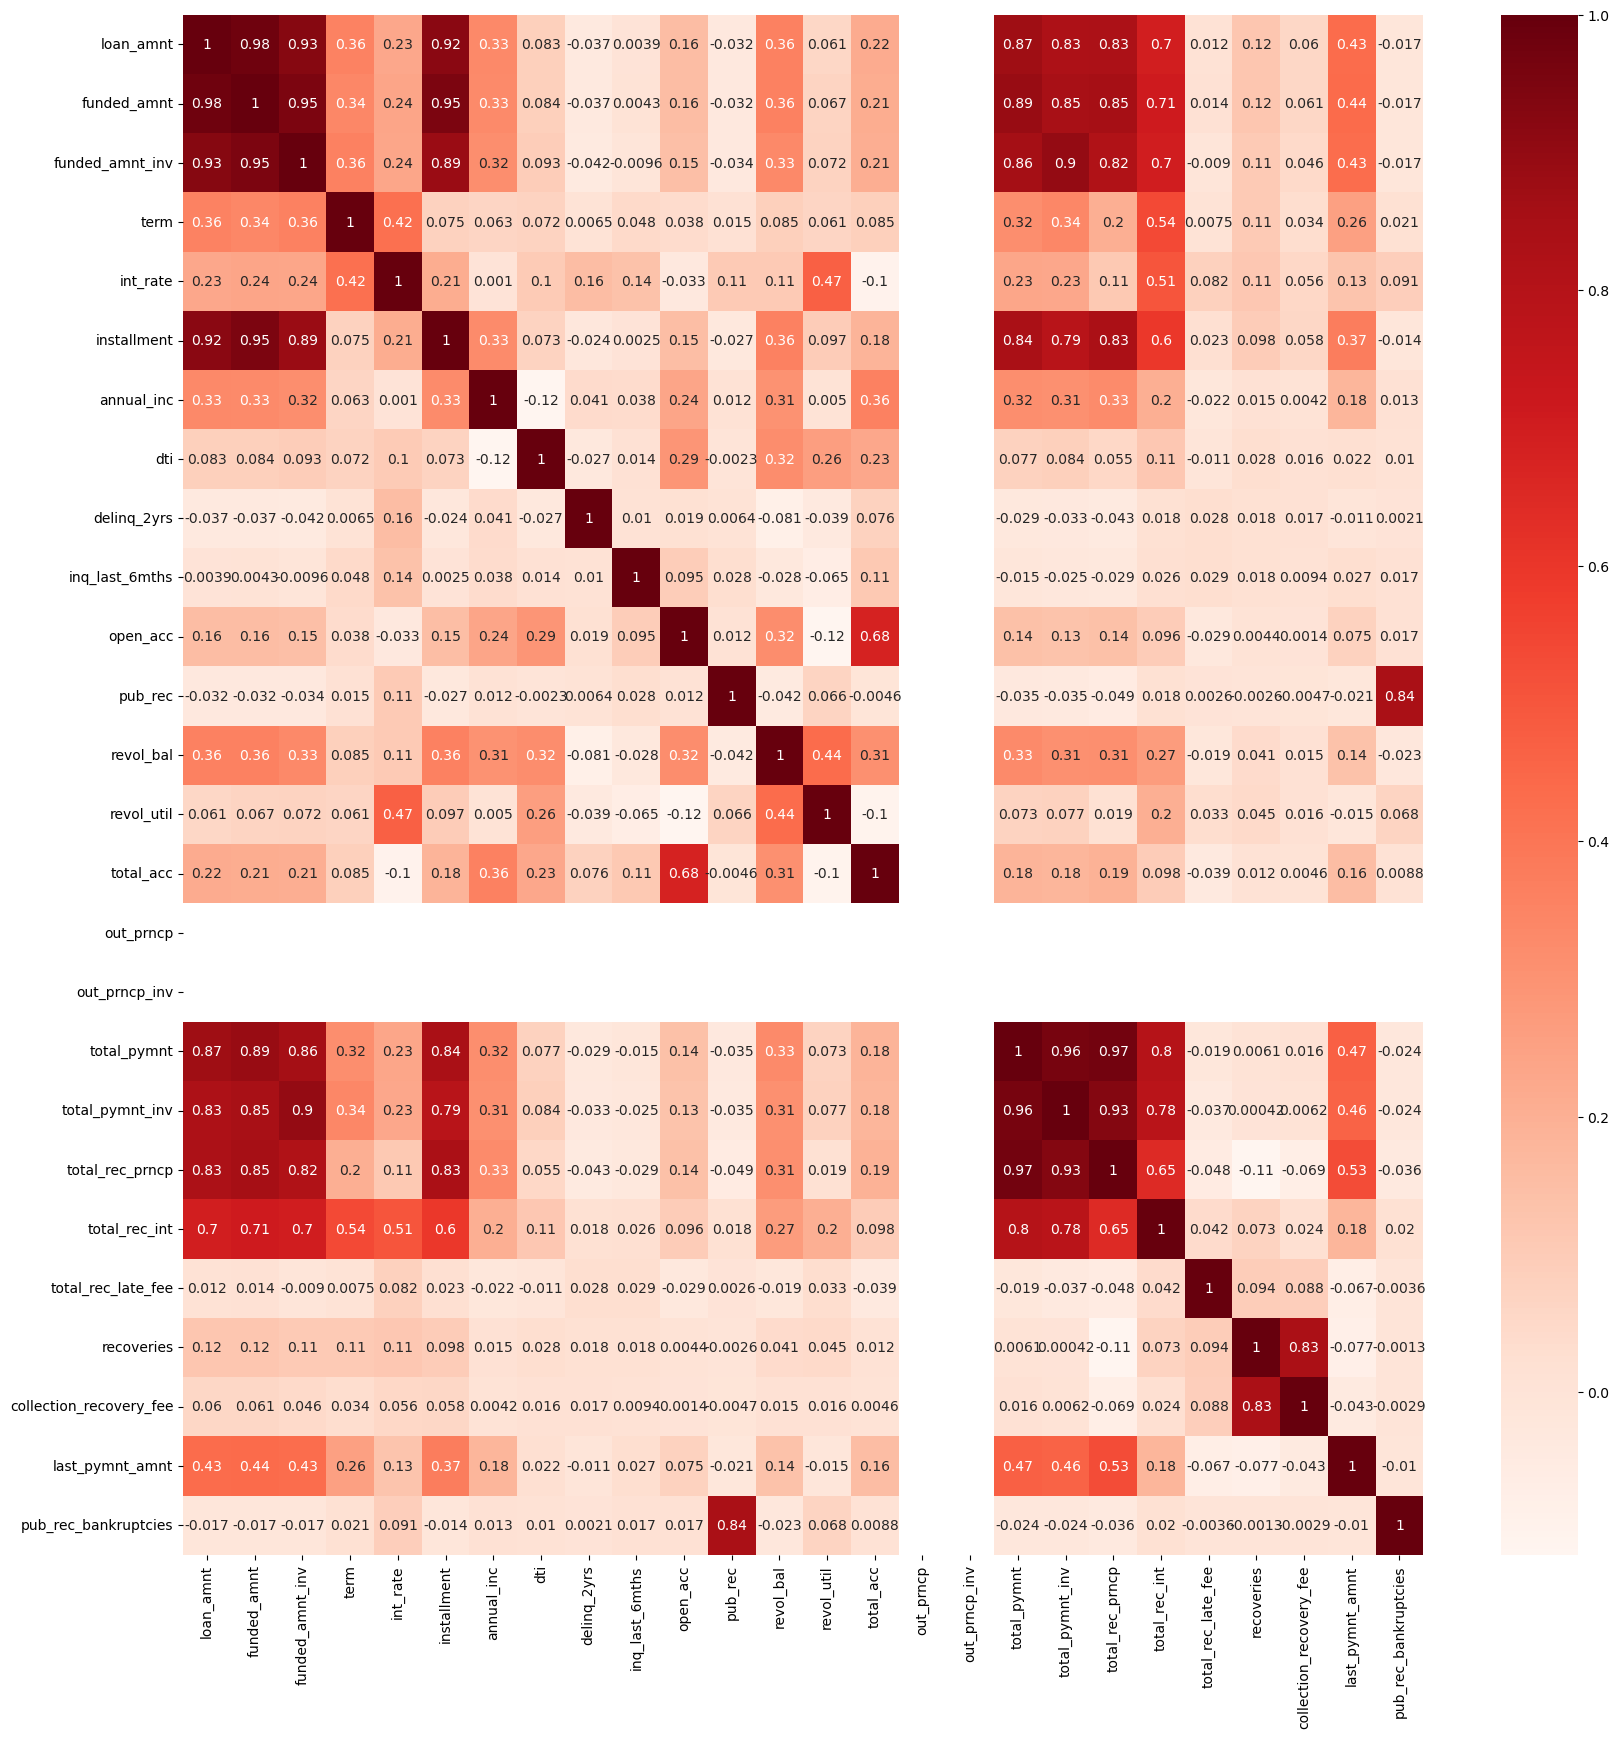

In [4492]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df[corr_mat_table].corr(), annot=True, cmap='Reds')

### To Drop Cols : after analysis
delinq_2yrs, 
total_acc ,
inq_last_6mths

## TODO check how to build defaulted : check
FICO
Risk_score